In [1]:
print("jai shree ram")

jai shree ram


In [40]:
# let's import the required liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
      'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df=pd.read_csv("breast-cancer-wisconsin.data.txt",header=None,names=cols)

In [4]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.shape

(699, 11)

In [7]:
df.drop("Id",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
# let's convert the object type column into numberic form

In [10]:
df["Bare_Nuclei"]=pd.to_numeric(df["Bare_Nuclei"],errors="coerce")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [12]:
# check null values
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

Clump_thickness                0.000000
Uniformity_Cell_Size           0.000000
Uniformity_Cell_Shape          0.000000
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.000000
Bare_Nuclei                    2.288984
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
Class                          0.000000
dtype: float64

C:\Users\sikan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


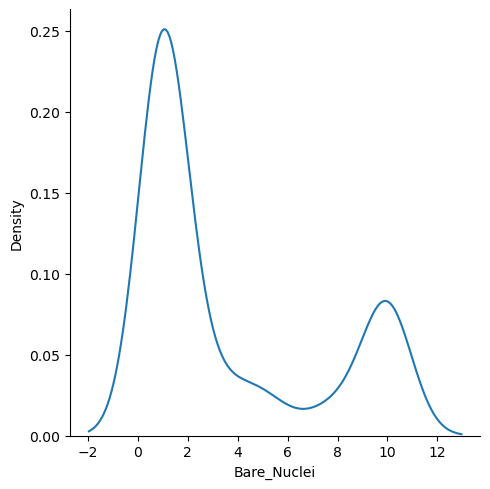

In [14]:
sns.displot(df["Bare_Nuclei"],kind="kde");

In [15]:
df.fillna(df["Bare_Nuclei"].median(),inplace=True)

In [16]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
co=df.corr()

<Axes: >

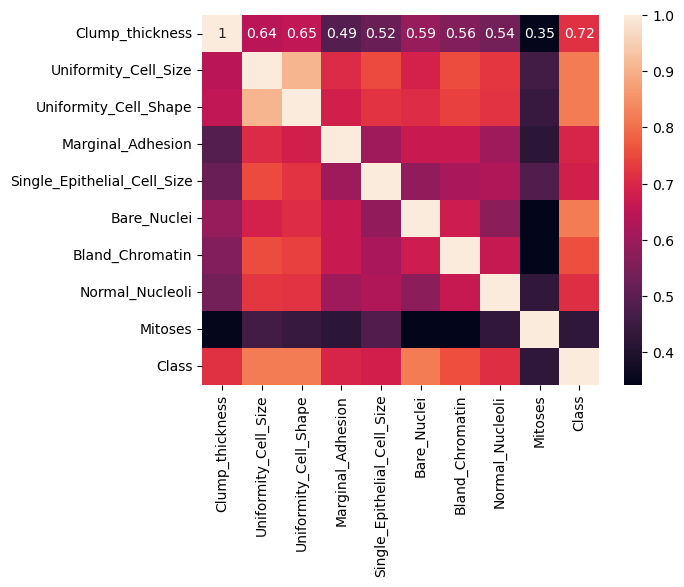

In [18]:
sns.heatmap(co, annot=True,fmt='.2g')

In [19]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)

In [22]:
x_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
396,3,1,1,1,2,1.0,3,1,1
628,2,1,1,1,2,1.0,1,1,1
358,8,10,5,3,8,4.0,4,10,3
624,5,1,1,2,1,1.0,2,1,1


In [23]:
y_train.head()

0      2
396    2
628    2
358    4
624    2
Name: Class, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
obj=KNeighborsClassifier(n_neighbors=6)

In [26]:
obj.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [27]:
obj.score(x_train,y_train)

0.9793322734499205

In [28]:
train_per=obj.predict(x_train)
test_per=obj.predict(x_test)

In [29]:
patient1=x_test.iloc[0:1,:]

In [30]:
patient1

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
535,1,1,3,2,2,1.0,3,1,1


In [31]:
result=obj.predict(patient1)

In [32]:
if result==2:
    print("patient is out of dangour")
else:
    print("patient is suffering with malignant tumar")

patient is out of dangour


In [33]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [34]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [35]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,recall_score,precision_score

In [36]:
accuracy_score(y_test,test_per)

0.9428571428571428

In [37]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "ef7c48f6",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "jai shree ram\n"
     ]
    }
   ],
   "source": [
    "print(\"jai shree ram\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 40,
   "id": "8c54cfd0",
   "metadata": {},
   "outputs": [],
   "source": [
    "# let's import the required liberary\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "a4aaf846",
   "metadata": {},
   "outputs": [],
   "source": [
    "cols=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',\n",
    "      'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']\n",
    "\n",
    "df=pd.read_csv(\"breast-cancer-wisconsin.data.txt\",header=None,names=cols)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "b23ac05e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Id</th>\n",
       "      <th>Clump_thickness</th>\n",
       "      <th>Uniformity_Cell_Size</th>\n",
       "      <th>Uniformity_Cell_Shape</th>\n",
       "      <th>Marginal_Adhesion</th>\n",
       "      <th>Single_Epithelial_Cell_Size</th>\n",
       "      <th>Bare_Nuclei</th>\n",
       "      <th>Bland_Chromatin</th>\n",
       "      <th>Normal_Nucleoli</th>\n",
       "      <th>Mitoses</th>\n",
       "      <th>Class</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1000025</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1002945</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1015425</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>1016277</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>1017023</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \\\n",
       "0  1000025                5                     1                      1   \n",
       "1  1002945                5                     4                      4   \n",
       "2  1015425                3                     1                      1   \n",
       "3  1016277                6                     8                      8   \n",
       "4  1017023                4                     1                      1   \n",
       "\n",
       "   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \\\n",
       "0                  1                            2           1   \n",
       "1                  5                            7          10   \n",
       "2                  1                            2           2   \n",
       "3                  1                            3           4   \n",
       "4                  3                            2           1   \n",
       "\n",
       "   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  \n",
       "0                3                1        1      2  \n",
       "1                3                2        1      2  \n",
       "2                3                1        1      2  \n",
       "3                3                7        1      2  \n",
       "4                3                1        1      2  "
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "1f9982d8",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 699 entries, 0 to 698\n",
      "Data columns (total 11 columns):\n",
      " #   Column                       Non-Null Count  Dtype \n",
      "---  ------                       --------------  ----- \n",
      " 0   Id                           699 non-null    int64 \n",
      " 1   Clump_thickness              699 non-null    int64 \n",
      " 2   Uniformity_Cell_Size         699 non-null    int64 \n",
      " 3   Uniformity_Cell_Shape        699 non-null    int64 \n",
      " 4   Marginal_Adhesion            699 non-null    int64 \n",
      " 5   Single_Epithelial_Cell_Size  699 non-null    int64 \n",
      " 6   Bare_Nuclei                  699 non-null    object\n",
      " 7   Bland_Chromatin              699 non-null    int64 \n",
      " 8   Normal_Nucleoli              699 non-null    int64 \n",
      " 9   Mitoses                      699 non-null    int64 \n",
      " 10  Class                        699 non-null    int64 \n",
      "dtypes: int64(10), object(1)\n",
      "memory usage: 60.2+ KB\n"
     ]
    }
   ],
   "source": [
    "# check information of dataset\n",
    "df.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "b1cd65f1",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(699, 11)"
      ]
     },
     "execution_count": 6,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "a535ef80",
   "metadata": {},
   "outputs": [],
   "source": [
    "df.drop(\"Id\",axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "deefbe03",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 699 entries, 0 to 698\n",
      "Data columns (total 10 columns):\n",
      " #   Column                       Non-Null Count  Dtype \n",
      "---  ------                       --------------  ----- \n",
      " 0   Clump_thickness              699 non-null    int64 \n",
      " 1   Uniformity_Cell_Size         699 non-null    int64 \n",
      " 2   Uniformity_Cell_Shape        699 non-null    int64 \n",
      " 3   Marginal_Adhesion            699 non-null    int64 \n",
      " 4   Single_Epithelial_Cell_Size  699 non-null    int64 \n",
      " 5   Bare_Nuclei                  699 non-null    object\n",
      " 6   Bland_Chromatin              699 non-null    int64 \n",
      " 7   Normal_Nucleoli              699 non-null    int64 \n",
      " 8   Mitoses                      699 non-null    int64 \n",
      " 9   Class                        699 non-null    int64 \n",
      "dtypes: int64(9), object(1)\n",
      "memory usage: 54.7+ KB\n"
     ]
    }
   ],
   "source": [
    "df.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "5f54fbf6",
   "metadata": {},
   "outputs": [],
   "source": [
    "# let's convert the object type column into numberic form"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "365fde4f",
   "metadata": {},
   "outputs": [],
   "source": [
    "df[\"Bare_Nuclei\"]=pd.to_numeric(df[\"Bare_Nuclei\"],errors=\"coerce\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "dd484e85",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 699 entries, 0 to 698\n",
      "Data columns (total 10 columns):\n",
      " #   Column                       Non-Null Count  Dtype  \n",
      "---  ------                       --------------  -----  \n",
      " 0   Clump_thickness              699 non-null    int64  \n",
      " 1   Uniformity_Cell_Size         699 non-null    int64  \n",
      " 2   Uniformity_Cell_Shape        699 non-null    int64  \n",
      " 3   Marginal_Adhesion            699 non-null    int64  \n",
      " 4   Single_Epithelial_Cell_Size  699 non-null    int64  \n",
      " 5   Bare_Nuclei                  683 non-null    float64\n",
      " 6   Bland_Chromatin              699 non-null    int64  \n",
      " 7   Normal_Nucleoli              699 non-null    int64  \n",
      " 8   Mitoses                      699 non-null    int64  \n",
      " 9   Class                        699 non-null    int64  \n",
      "dtypes: float64(1), int64(9)\n",
      "memory usage: 54.7 KB\n"
     ]
    }
   ],
   "source": [
    "df.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "f0fb9aa9",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Clump_thickness                 0\n",
       "Uniformity_Cell_Size            0\n",
       "Uniformity_Cell_Shape           0\n",
       "Marginal_Adhesion               0\n",
       "Single_Epithelial_Cell_Size     0\n",
       "Bare_Nuclei                    16\n",
       "Bland_Chromatin                 0\n",
       "Normal_Nucleoli                 0\n",
       "Mitoses                         0\n",
       "Class                           0\n",
       "dtype: int64"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# check null values\n",
    "df.isnull().sum()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "08460f64",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Clump_thickness                0.000000\n",
       "Uniformity_Cell_Size           0.000000\n",
       "Uniformity_Cell_Shape          0.000000\n",
       "Marginal_Adhesion              0.000000\n",
       "Single_Epithelial_Cell_Size    0.000000\n",
       "Bare_Nuclei                    2.288984\n",
       "Bland_Chromatin                0.000000\n",
       "Normal_Nucleoli                0.000000\n",
       "Mitoses                        0.000000\n",
       "Class                          0.000000\n",
       "dtype: float64"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.isnull().sum()/df.shape[0]*100"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "5050da98",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "C:\\Users\\sikan\\anaconda3\\Lib\\site-packages\\seaborn\\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.\n",
      "  with pd.option_context('mode.use_inf_as_na', True):\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAeoAAAHpCAYAAABN+X+UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABeLElEQVR4nO3dd3zTdf4H8Nc3SZN0pntBFxuKrLLKFIECLtBTUE8QxcE5jqG/Qw4X3imHJxyOA8UBxynrRJTzUKnKFGSUFpAtdNFJW7rbtE2+vz/SpBRKadM032+S1/PxyOMh6bffvIM0r362IIqiCCIiIpIlhdQFEBER0Y0xqImIiGSMQU1ERCRjDGoiIiIZY1ATERHJGIOaiIhIxhjUREREMsagboIoiigtLQWXmBMRkdQY1E0oKyuDTqdDWVmZ1KUQEZGLY1ATERHJGIOaiIhIxhjUREREMsagJiIikjEGNRERkYwxqImIiGSMQU1ERCRjDGoiIiIZY1ATERHJGIOaiIhIxhjUREREMsagJiIikjEGNRERkYwxqImIiGSMQU1ERCRjDGoiIiIZY1ATERHJmORBvXLlSsTExECr1SIuLg579+694bVffvklxo8fj6CgIPj4+CA+Ph7ff/99o2vWrl0LQRCue1RXV7f3WyEiIrI5SYN606ZNmDt3LhYtWoTk5GSMHDkSkyZNQkZGRpPX79mzB+PHj8f27duRlJSEMWPG4K677kJycnKj63x8fJCTk9PoodVq7fGWyEp5pdX444ZkzPj0EF7+6ldcuFwudUlERLIgiKIoSvXiQ4YMwYABA7Bq1SrLcz179sSUKVOwZMmSFt0jNjYW06ZNwyuvvALA1KKeO3cuiouLra6rtLQUOp0OJSUl8PHxsfo+1DL5ZdV44MNfcLGgwvJcsLcG3zw3AsE+/AWLiFybZC3qmpoaJCUlISEhodHzCQkJ2L9/f4vuYTQaUVZWBn9//0bPl5eXIyoqCh07dsSdd955XYv7Wnq9HqWlpY0eZB/VtQY8/PFBXCyoQAdfd7xxT290DfZCfpkef/j8KGrqjFKXSEQkKcmCuqCgAAaDASEhIY2eDwkJQW5ubovusWzZMlRUVGDq1KmW53r06IG1a9di27Zt2LBhA7RaLYYPH47z58/f8D5LliyBTqezPCIiIqx7U9Rq/0m6hHN55Qj00mD9E0Pw+yFR+GjGQPhoVUhKv4JVuy5IXSIRkaQkn0wmCEKjP4uieN1zTdmwYQNee+01bNq0CcHBwZbnhw4diocffhh9+/bFyJEjsXnzZnTr1g3vvffeDe+1cOFClJSUWB6ZmZnWvyFqMYNRxEd7LgIAnh3TGVEBngCA6EBPvD65NwDg37+kQV9nkKxGIiKpSRbUgYGBUCqV17We8/Pzr2tlX2vTpk2YNWsWNm/ejHHjxjV7rUKhwKBBg5ptUWs0Gvj4+DR6UPv77tdcZBRVws/DDVMHNe7FuKNPGEJ9tCgor8H2EzkSVUhEJD3JglqtViMuLg6JiYmNnk9MTMSwYcNu+H0bNmzAzJkzsX79etxxxx03fR1RFJGSkoKwsLA210y29eEeU7f2jPhoeKhVjb7mplTg4aGRAIC1+9PtXhsRkVxI2vU9f/58fPzxx/j0009x+vRpzJs3DxkZGZg9ezYAU5f0jBkzLNdv2LABM2bMwLJlyzB06FDk5uYiNzcXJSUllmsWL16M77//HhcvXkRKSgpmzZqFlJQUyz1JHi5cLsfxSyVwUwqYER/V5DUPDI6EWqnAscxipGQW27dAIiKZkDSop02bhhUrVuD1119Hv379sGfPHmzfvh1RUaYP7pycnEZrqj/88EPU1dXhmWeeQVhYmOUxZ84cyzXFxcV48skn0bNnTyQkJCArKwt79uzB4MGD7f7+6MYST+UBAIZ2CkCAl6bJawK9NJh0SygA4L/Hsu1WGxGRnEi6jlquuI66/d23aj+OpF/BXybHYnp89A2v234iB09/fhSdAj3x0wu32q0+IiK5kHzWN7mewnI9kjKuAADG9mx+4uDIroFQKQRcLKhA6lUbohARuQoGNdndT2fyIYpAbLgPwn3dm73WW+uGwTH+lu8jInI1DGqyux9Om8anx92kNW12Ww/TOvmdDGoickEMarIrg1HEz78VAgDG9gy+ydUm5qA+mFqIcn1du9VGRCRHDGqyq7O5ZSjX18FLo0JsuK5F39MpyAvRAR6oNYg4cKGwnSskIpIXBjXZVVJ6EQCgf6QvlIqbbxVrFt85AABwpP77iYhcBYOa7OpIumm2d1yUX6u+b0Ck6fqj9d9PROQqGNRkV0fSTEE7MMr/Jlc2NjDadP2xSyU8pIOIXAqDmuwmt6QaWcVVUAhAv0jfVn1vdIAHAjzVqKkz4mQ2zwsnItfBoCa7Sarvtu4R6gMvjeomVzcmCAIG1HeXJ6Wx+5uIXAeDmuzGPBFsYHTrxqfNzOPaSRynJiIXwqAmu0nOKAbQ+olkZubvO5J+BdyinohcBYOa7MJgFHEm1zS23LtDy9ZPX+uWDjqolQoUlOuRWVRly/KIiGSLQU12kVpQgepaI9zdlIgO8LTqHlo3JbqHegMAfs0uucnVRETOgUFNdnE6x9Sa7hHm3aqNTq4VG246dvQUZ34TkYtgUJNdnKoP6l5hbTvfu1d9UJ9ki5qIXASDmuzC3AI2B621LC3qHLaoicg1MKjJLmzVou4R6gNBAPJK9Sgo19uiNCIiWWNQU7vLL6vG5TI9FIIpaNvCU6NCTP1kNI5TE5ErYFBTuzudUwYAiA70hLta2eb7NYxTM6iJyPkxqKndnbZRt7cZJ5QRkSthUFO7Mwd1TxsFdWy4acMUTigjIlfAoKZ291t+OQCgW4i3Te5nbpmnFlSgsqbOJvckIpIrBjW1K6NRxIXLpqDuEuxlk3sGeWsQ4KmGKAIXL1fY5J5ERHLFoKZ2lV1ShepaI9RKBSL83G12X3Pon88vs9k9iYjkiEFN7crc7R0d6AGV0nb/3LqGmIL6XF65ze5JRCRHDGpqV+agtlW3t1nXYNN493kGNRE5OQY1tasL9WPInYNsHdSm+/3Grm8icnIMampXF9qrRV0/gzyjqBLVtQab3puISE4Y1NSufquf8W3rFnWglxq+Hm4wcuY3ETk5BjW1m6KKGhRV1AAAOgV52vTegiBYur8585uInBmDmtqNef10B193eKhVNr9/l/oJZeYJa0REzohBTe2mvWZ8m5lb1Ofy2KImIufFoKZ2c7G+RW3rbm8z81pqLtEiImfGoKZ2k1ZYCQCICWyfoDa31DOKKlFrMLbLaxARSY1BTe0moz6oowLaJ6hDvLVwd1Oiziji0pWqdnkNIiKpMaipXRiNItKLTMumogM82uU1FAoBUfX3Ti1g9zcROScGNbWL/DI9qmuNUCkEdPC13WEc1zKPf3MtNRE5KwY1tYu0QlNwdvRzt+lhHNcyj3+bX4+IyNkwqKldpNcHZ3uNT5vFBJomlKUWMKiJyDkxqKldmGd8t9f4tJm5RZ3Krm8iclIMamoX5hZ1ZDu3qDvVB3V2STWqang4BxE5HwY1tYu0Avu0qP081dC5u5lek+PUROSEGNRkc6Io2m2MGriq+5vj1ETkhBjUZHMF5TWoqDFAEIAI//ZbmmXWiUFNRE6MQU02Z25Nh+vcoVEp2/312KImImfGoCabS7NsHdq+49NmMUEMaiJyXgxqsrnMIlNQR/rbJ6ij/E1BnV7/CwIRkTNhUJPNmQ/IiLBTUEfWt9wLyvWo0NfZ5TWJiOyFQU02l3nF1LLt6Nf+E8kAQOfuBl8P0xKtjCK2qonIuTCoyeay6lvUHf3s06IGGrrZGdRE5GwY1GRTtQYjckrqu77t1KIGrgpqjlMTkZNhUJNNZRdXwSgCGpUCQd4au72ueYa5+QxsIiJnwaAmmzJPJOvg5w5BEOz2upz5TUTOikFNNmVemhVhx/FpoGGGeSbHqInIyTCoyaYalmbZb3waaOj6vnSlCnUGo11fm4ioPTGoyaYalmbZt0Ud6qOFWqVAnVFETkm1XV+biKg9MajJpiwtajsHtUIhWGaZc5yaiJwJg5psyjxGbK/NTq7GtdRE5IwY1GQz1bUG5JfpAdhv+9Crmc++5hItInImDGqymaxiU7e3p1oJv/otPe2Jm54QkTNiUJPNSLWG2szc3W7+hYGIyBkwqMlmcuoDMtzX/uPTQMNMc/MvDEREzoBBTTaTXb8sKkwnTVB3qG9RF1XU8LhLInIaDGqymez6FnUHX60kr69zd4OPVgWA3d9E5DwY1GQz5lOzpGpRA1d3f3NCGRE5BwY12UxOcX3Xt0QtaqBhQhnHqYnIWTCoySZEUbR0N3eQaDIZwAllROR8GNRkE1cqa6GvMx2GEaqTQ4uaXd9E5BwY1GQT5olkgV5qaFRKyepg1zcRORvJg3rlypWIiYmBVqtFXFwc9u7de8Nrv/zyS4wfPx5BQUHw8fFBfHw8vv/+++uu27JlC3r16gWNRoNevXph69at7fkWCLCcWCXlRDKAXd9E5HwkDepNmzZh7ty5WLRoEZKTkzFy5EhMmjQJGRkZTV6/Z88ejB8/Htu3b0dSUhLGjBmDu+66C8nJyZZrDhw4gGnTpmH69Ok4duwYpk+fjqlTp+LgwYP2elsuKduy2Yl03d4A11ITkfMRRFEUpXrxIUOGYMCAAVi1apXluZ49e2LKlClYsmRJi+4RGxuLadOm4ZVXXgEATJs2DaWlpfj2228t10ycOBF+fn7YsGFDi+5ZWloKnU6HkpIS+Pj4tOIdua4l357Gh7svYuawaLx2d6yktfR57XuUVtdhx7xR6BbiLWktRERtJVmLuqamBklJSUhISGj0fEJCAvbv39+iexiNRpSVlcHf39/y3IEDB66754QJE5q9p16vR2lpaaMHtY55aZbULWqAa6mJyLlIFtQFBQUwGAwICQlp9HxISAhyc3NbdI9ly5ahoqICU6dOtTyXm5vb6nsuWbIEOp3O8oiIiGjFOyGgYbMTqfb5vhonlBGRM5F8Mtm1pyyJotiik5c2bNiA1157DZs2bUJwcHCb7rlw4UKUlJRYHpmZma14BwQA2cXymEwGcEIZETkXlVQvHBgYCKVSeV1LNz8//7oW8bU2bdqEWbNm4T//+Q/GjRvX6GuhoaGtvqdGo4FGo2nlOyAzg1FEbqmcur65lpqInIdkLWq1Wo24uDgkJiY2ej4xMRHDhg274fdt2LABM2fOxPr163HHHXdc9/X4+Pjr7rljx45m70ltc7lMD4NRhFIhINhbTkHNFjUROT7JWtQAMH/+fEyfPh0DBw5EfHw8Vq9ejYyMDMyePRuAqUs6KysL69atA2AK6RkzZuCdd97B0KFDLS1nd3d36HQ6AMCcOXMwatQoLF26FJMnT8bXX3+NH374Afv27ZPmTbqA7Prx6VAfLZSKmw9btDd2fRORM5F0jHratGlYsWIFXn/9dfTr1w979uzB9u3bERUVBQDIyclptKb6ww8/RF1dHZ555hmEhYVZHnPmzLFcM2zYMGzcuBFr1qxBnz59sHbtWmzatAlDhgyx+/tzFeY11GESbh16Na6lJiJnIuk6arniOurW+WjPRbyx/TTu6huO9x7sL3U5ALiWmoich+SzvsnxZZfIY1eyq5m7v7PY/U1EDo5BTW1m2T5UBkuzzDjzm4icBYOa2qzhQA75tKg7cOY3ETkJBjW1WbZl+1A5tag585uInAODmtpEX2dAQbkegNyCml3fROQcGNTUJrn13d4alQJ+Hm4SV9OAm54QkbNgUFObXN3t3ZI92u3F3PVdWFGDyhqupSYix8WgpjbJkeHSLADQubvBW2vaeI9LtIjIkTGoqU0aZnzLZ3zajBPKiMgZMKipTbIsa6jl1aIGGsapMzmhjIgcGIOa2iTHHNQymvFt1qG+JvMvE0REjohBTW1i6fqWcVCbJ7wRETkiBjW1iZy7vsMtQc0WNRE5LgY1Wa1CX4eyatPSp1AZBrV5G1HO+iYiR8agJqvllZq6lD3VSnhr5bPZiZl5yVheWTVqDUaJqyEisg6DmqyWWx/UITJsTQNAoKcGapUCotiwgxoRkaNhUJPV8ktNe3yH+sgzqBUKwTJ2zpnfROSoGNRkNUuLWqZBDXBCGRE5PgY1Wc3cnSznoLaspeaEMiJyUAxqslp+mSmoQ300EldyY5YWdQmDmogcE4OarOYQLWoed0lEDo5BTVbLq59MJtdZ38DVu5MxqInIMTGoySpGo3hV17d8gzr8qm1ERVGUuBoiotZjUJNViiprUGsQIQhAkLd8x6jD6lv7VbUGXKmslbgaIqLWY1CTVczj0wGeGrgp5fvPSOumRKCX6RcJdn8TkSOS7ycsyZql21sn39a0GSeUEZEjY1CTVXJL6ieSect3fNqsQ/2e32xRE5EjYlCTVeS+z/fVwnWc+U1EjotBTVbJL5X/jG8zy3GXDGoickAMarJKwz7f8h+j5n7fROTIGNRkFUfYlczMst83g5qIHBCDmqySX1Z/xKUDjFGbg7qgvAbVtQaJqyEiah0GNbWavs6AoooaAI4x69vXww3ubkoAQE59TwARkaNgUFOr5dfv8a1WKeDr4SZxNTcnCELDhDKupSYiB8OgplbLu2rGtyAIElfTMpxQRkSOikFNreZIM77NzOPUlxjURORgGNTUao4049uMu5MRkaNiUFOrWWZ8O1BQs+ubiBwVg5pazTFb1FxLTUSOiUFNreZI+3ybmVvUOcXVMBpFiashImo5BjW1miPt820WqtNCIQA1BiMKyvVSl0NE1GIMamoVURQdcta3m1Jh6apn9zcRORIGNbVKaVUdqmuNABxrjBq4ekIZdycjIsfBoKZWySszhZyvhxu09dtyOoqGCWWVEldCRNRyDGpqFcuMbwfY4/tabFETkSNiUFOrOOKMbzPzpieXuN83ETkQBjW1SsOMb8eZSGZmPpiDm54QkSNhUFOr5Drg0iwzS9d3CYOaiBwHg5paJbfEtAY52AGD2jyZrLiyFhX6OomrISJqGQY1tUp+meO2qL21bvDWqgCw+5uIHAeDmlrFPOs71AEnkwE87pKIHA+Dmlqs7qrtN4MdcDIZ0BDUbFETkaNgUFOLFZTXwCgCKoWAQE/HDGoed0lEjoZBTS1mnvEd7K2BQiFIXI11zEu0sriWmogcBIOaWsw8Pu2IM77NuDsZETkaBjW1mCPP+DYz707GE7SIyFEwqKnFHH3GNwB08PUAYOrGrzMYJa6GiOjmGNTUYpYxaged8Q0AQd4aqBQCDEYR+WV6qcshIropBjW1WH6pKdgcuetbqRAQxu5vInIgDGpqMUfe5/tq4Tou0SIix8GgphbLc4JZ38BVu5NxiRYROQAGNbVIhb4OZfUHWTjyZDKAx10SkWNhUFOL5NV3e3tpVPDSqCSupm24OxkRORIGNbWIM8z4NjN3fXMyGRE5AgY1tYgzzPg2M7eos65UQRRFiashImoeg5paxFlmfANAeP3yrIoaA0qr6iSuhoioeQxqahFn2OfbzEOtgr+nGgC7v4lI/hjU1CLmfb5DnGCMGmhoVXNCGRHJHYOaWiTPicaoAU4oIyLHwaCmFjF3fYc4+BpqMy7RIiJHIXlQr1y5EjExMdBqtYiLi8PevXtveG1OTg4eeughdO/eHQqFAnPnzr3umrVr10IQhOse1dU8f9haoihe1fXtHEFt2Z2MQU1EMidpUG/atAlz587FokWLkJycjJEjR2LSpEnIyMho8nq9Xo+goCAsWrQIffv2veF9fXx8kJOT0+ih1TpHwEihqKIGtQbTMqZgb+cYo+7AFjUROQhJg3r58uWYNWsWHn/8cfTs2RMrVqxAREQEVq1a1eT10dHReOeddzBjxgzodLob3lcQBISGhjZ6kPXM49OBXmq4KSXvhLEJdn0TkaOQ7FO3pqYGSUlJSEhIaPR8QkIC9u/f36Z7l5eXIyoqCh07dsSdd96J5OTkZq/X6/UoLS1t9KAGefXd3sHeztMrYd7vO79Mj5o6o8TVEBHdmGRBXVBQAIPBgJCQkEbPh4SEIDc31+r79ujRA2vXrsW2bduwYcMGaLVaDB8+HOfPn7/h9yxZsgQ6nc7yiIiIsPr1nZH51CxHP4zjagGeaqhVCohiw0Q5IiI5krwfUxCERn8WRfG651pj6NChePjhh9G3b1+MHDkSmzdvRrdu3fDee+/d8HsWLlyIkpISyyMzM9Pq13dG5q5vZ1lDDZj+3TVMKKuUuBoiohuT7BikwMBAKJXK61rP+fn517Wy20KhUGDQoEHNtqg1Gg00GucJIVtzxq5vwDShLLWgAtnFbFETkXxJ1qJWq9WIi4tDYmJio+cTExMxbNgwm72OKIpISUlBWFiYze7papyx6xvg7mRE5BgkPVh4/vz5mD59OgYOHIj4+HisXr0aGRkZmD17NgBTl3RWVhbWrVtn+Z6UlBQApgljly9fRkpKCtRqNXr16gUAWLx4MYYOHYquXbuitLQU7777LlJSUvDPf/7T7u/PWeQ52fahZh18PQCYTtEiIpIrSYN62rRpKCwsxOuvv46cnBz07t0b27dvR1RUFADTBifXrqnu37+/5b+TkpKwfv16REVFIS0tDQBQXFyMJ598Erm5udDpdOjfvz/27NmDwYMH2+19OZvcEvMYtZO2qEsY1EQkX4LIA3mvU1paCp1Oh5KSEvj4+EhdjqRqDUZ0e+lbiCJw5KVxCPRynlb1/t8K8NDHB9Ep0BM/vXCr1OUQETXJqjHq1NRUW9dBMlVQrocoAm5KAf4eaqnLsSnzWuqs4irw91UikiurgrpLly4YM2YMPvvsM+6h7eQs51B7a6FQWL9sTo7Mk+P0dUYUVdRIXA0RUdOsCupjx46hf//+eP755xEaGoqnnnoKhw4dsnVtJAPmNdTBTjaRDAA0KqVl73Ied0lEcmVVUPfu3RvLly9HVlYW1qxZg9zcXIwYMQKxsbFYvnw5Ll++bOs6SSKWU7OcbA21Gff8JiK5a9M6apVKhXvuuQebN2/G0qVLceHCBbzwwgvo2LEjZsyYgZycHFvVSRLJddI11GaW3cm4RIuIZKpNQX3kyBE8/fTTCAsLw/Lly/HCCy/gwoUL+Omnn5CVlYXJkyfbqk6SiDN3fQMNE8q4OxkRyZVV66iXL1+ONWvW4OzZs7j99tuxbt063H777VAoTLkfExODDz/8ED169LBpsWR/eaVO3vWt4+5kRCRvVgX1qlWr8Nhjj+HRRx+94VnPkZGR+OSTT9pUHEnPHNRO2/XtV787GYOaiGTKqqBOTExEZGSkpQVtJooiMjMzERkZCbVajUceecQmRZJ0LC1qJ+365n7fRCR3Vo1Rd+7cGQUFBdc9X1RUhJiYmDYXRfJQVWNAaXUdAOfbPtTMPJmssKIGVTUGiashIrqeVUF9o12cysvLodU65we6KzK3pj3USnhpJN0Wvt3o3N3gqVYC4J7fRCRPrfr0nT9/PgBAEAS88sor8PDwsHzNYDDg4MGD6Nevn00LJOk0dHtrIQjOtSuZmSAICPd1x/n8cmQXV6FzkJfUJRERNdKqoE5OTgZgalGfOHECanXD3s9qtRp9+/bFCy+8YNsKSTK5Tj4+bdbBzxTUPO6SiOSoVUG9c+dOAMCjjz6Kd955x+VPlnJ2+aXOebzltbg7GRHJmVUDj2vWrLF1HSRDuVd1fTszy+5kDGoikqEWB/W9996LtWvXwsfHB/fee2+z13755ZdtLoykl+diQc0WNRHJUYuDWqfTWSYU6XS6diuI5KOh69u5x6gbur65jSgRyU+Lg/rq7m52fbsGc9d3qLO3qOv3+84pqYLRKDrdudtE5NisWkddVVWFyspKy5/T09OxYsUK7Nixw2aFkbREUXSZru8Qbw0UAlBrEHG5XC91OUREjVgV1JMnT8a6desAAMXFxRg8eDCWLVuGyZMnY9WqVTYtkKRRWlUHfZ0RABDk7dxd3yqlwtJrwOMuiUhurArqo0ePYuTIkQCAL774AqGhoUhPT8e6devw7rvv2rRAkoa529vPww1aN6XE1bS/huMuGdREJC9WBXVlZSW8vb0BADt27MC9994LhUKBoUOHIj093aYFkjRcpdvbjGupiUiurArqLl264KuvvkJmZia+//57JCQkAADy8/O5CYqTMLeog10kqM1LtHjcJRHJjVVB/corr+CFF15AdHQ0hgwZgvj4eACm1nX//v1tWiBJI98y49u5x6fNzF3fHKMmIrmxamey++67DyNGjEBOTg769u1reX7s2LG45557bFYcSSfPRbYPNYv0Nx0wk1FUeZMriYjsy+qzC0NDQxEaGtroucGDB7e5IJIHV9k+1CzCzxTUmUWVEEXRaU8LIyLHY1VQV1RU4G9/+xt+/PFH5Ofnw2g0Nvr6xYsXbVIcSSffxYI63NcdCgHQ1xlxuUzvMmPzRCR/VgX1448/jt27d2P69OkICwtj68MJ5bnI9qFmapUCYTp3ZBVXIfNKJYOaiGTDqqD+9ttv8b///Q/Dhw+3dT0kAwZjww5dzr596NUi/E1BnVFUibgof6nLISICYOWsbz8/P/j784PMWRWW62EwilAIQICXa7SogasmlBVy5jcRyYdVQf2Xv/wFr7zySqP9vsl5mLu9g7w1ULrQARWWCWVX+O+aiOTDqq7vZcuW4cKFCwgJCUF0dDTc3Nwaff3o0aM2KY6k4SqnZl0rMoBLtIhIfqwK6ilTpti4DJKTPBfblcysY32L+hKDmohkxKqgfvXVV21dB8lIwz7frjM+DTSMUeeUVkNfZ4BG5fyHkRCR/Fk1Rg2Yjrf8+OOPsXDhQhQVFQEwdXlnZWXZrDiSRp6Ldn0Heqnh7qaEKALZxdVSl0NEBMDKFvXx48cxbtw46HQ6pKWl4YknnoC/vz+2bt1qOe6SHJd5MpmrdX0LgoAIf3ecyytHRlElYgI9pS6JiMi6FvX8+fMxc+ZMnD9/Hlptw4f5pEmTsGfPHpsVR9Jw1RY1wD2/iUh+rArqw4cP46mnnrru+Q4dOiA3N7fNRZG0XO0s6qtxQhkRyY1VQa3ValFaWnrd82fPnkVQUFCbiyLp6OsMuFJZC8D1JpMBbFETkfxYFdSTJ0/G66+/jtpa0we6IAjIyMjAiy++iN/97nc2LZDsK79+fFqjUkDn7naTq51PhD83PSEiebEqqN9++21cvnwZwcHBqKqqwujRo9GlSxd4e3vjjTfesHWNZEdXH2/pioetNGwjyqAmInmwata3j48P9u3bh507dyIpKQlGoxEDBgzAuHHjbF0f2VluSf1EMp3rjU8DpoM5AKC0ug4llbXQebherwIRyUurg9poNGLt2rX48ssvkZaWBkEQEBMTg9DQUIii6JKtMGeSU2I6kCLMRYPaQ61CoJcaBeU1yLxSCZ2HTuqSiMjFtarrWxRF3H333Xj88ceRlZWFW265BbGxsUhPT8fMmTNxzz33tFedZCc5Lt6iBhrGqTmhjIjkoFUt6rVr12LPnj348ccfMWbMmEZf++mnnzBlyhSsW7cOM2bMsGmRZD/mru8wF1yaZRbh54HkjGJkMqiJSAZa1aLesGED/vznP18X0gBw22234cUXX8Tnn39us+LI/hpa1O4SVyIdLtEiIjlpVVAfP34cEydOvOHXJ02ahGPHjrW5KJKOuUUd7uvCLer6CWWZV6okroSIqJVBXVRUhJCQkBt+PSQkBFeuXGlzUSSNOoMR+WUco7aspWaLmohkoFVBbTAYoFLdeFhbqVSirq6uzUWRNC6X62EUAZVCQKCn6+1KZmbu+s66UgWDUZS4GiJyda2aTCaKImbOnAmNpukPcb1eb5OiSBrm8ekQHy0UCtddZhemc4dKIaDGYEReaTXCfV13vJ6IpNeqoH7kkUdueg1nfDsuy4xvF+72BgClQkAHP3ekF1Yio6iSQU1EkmpVUK9Zs6a96iAZ4BrqBhF+HpagHtopQOpyiMiFWbXXNzmnXBfflexqUQGmcer0wgqJKyEiV8egJguuoW4QE+gJAEjj4RxEJDEGNVlwjLpBVIApqNmiJiKpMajJgmPUDaLNXd8FlRBFLtEiIukwqAkAYDCKyCtli9oswt8DggCU6etQWFEjdTlE5MIY1AQAKCzXo84oQiEAQV6uu9mJmdZNifD6sXp2fxORlBjUBKCh2zvYWwuVkv8sgIaZ32kFnFBGRNLhJzIB4Ph0U6ItM7/ZoiYi6TCoCQDXUDfFPKGMS7SISEoMagIA5JSyRX0tLtEiIjlgUBMArqFuinnTk9SCCi7RIiLJMKgJAHcla4r5uMuy6jpcqayVuBoiclUMagLQ0KIOZ4vawrREy/T3kVrA7m8ikgaDmiCKoiWoOUbdWPRV3d9ERFJgUBOKKmpQYzBCEEzrqKlBpyBzUJdLXAkRuSoGNVnGpwO9NFCr+E/iajGBXgCAi5fZoiYiafBTmTjjuxnmFjWDmoikwqCmhjXUPgzqa3Wub1GnFlbAYOQSLSKyP8mDeuXKlYiJiYFWq0VcXBz27t17w2tzcnLw0EMPoXv37lAoFJg7d26T123ZsgW9evWCRqNBr169sHXr1naq3jnkFHNXshvp4OcOtVKBmjojsuv/noiI7EnSoN60aRPmzp2LRYsWITk5GSNHjsSkSZOQkZHR5PV6vR5BQUFYtGgR+vbt2+Q1Bw4cwLRp0zB9+nQcO3YM06dPx9SpU3Hw4MH2fCsOLZdrqG9IqRAsh3Nc5MxvIpKApEG9fPlyzJo1C48//jh69uyJFStWICIiAqtWrWry+ujoaLzzzjuYMWMGdDpdk9esWLEC48ePx8KFC9GjRw8sXLgQY8eOxYoVK9rxnTi2HI5RN6thnJozv4nI/iQL6pqaGiQlJSEhIaHR8wkJCdi/f7/V9z1w4MB195wwYUKz99Tr9SgtLW30cCW53Oe7WZz5TURSkiyoCwoKYDAYEBIS0uj5kJAQ5ObmWn3f3NzcVt9zyZIl0Ol0lkdERITVr+9oRFFETv3JWZxM1rSGtdQMaiKyP8knkwmC0OjPoihe91x733PhwoUoKSmxPDIzM9v0+o6kqKIG1bVGAECYL4O6KZ3Z9U1EElJJ9cKBgYFQKpXXtXTz8/OvaxG3RmhoaKvvqdFooNForH5NR5ZVP5M52FsDjUopcTXy1Km+6zu7pBqVNXXwUEv2Y0NELkiyFrVarUZcXBwSExMbPZ+YmIhhw4ZZfd/4+Pjr7rljx4423dOZmZcchftyxveN+Hmq4efhBoDj1ERkf5I2DebPn4/p06dj4MCBiI+Px+rVq5GRkYHZs2cDMHVJZ2VlYd26dZbvSUlJAQCUl5fj8uXLSElJgVqtRq9evQAAc+bMwahRo7B06VJMnjwZX3/9NX744Qfs27fP7u/PEVy6YgrqDn4M6uZ0DfbGobQiXLhcjt4dml5xQETUHiQN6mnTpqGwsBCvv/46cnJy0Lt3b2zfvh1RUVEATBucXLumun///pb/TkpKwvr16xEVFYW0tDQAwLBhw7Bx40a89NJLePnll9G5c2ds2rQJQ4YMsdv7ciTmru+ObFE3q3OwFw6lFeF8Hsepici+JB9se/rpp/H00083+bW1a9de95wo3nwbx/vuuw/33XdfW0tzCVlsUbdI12DTOPX5/DKJKyEiVyP5rG+SVnb90qxw7krWrC71Qf1bPlvURGRfDGoXxxZ1y3QNMQV1WmElauqMEldDRK6EQe3CKmvqcKWyFgCD+mZCfbTw0qhgMIpIL+TMbyKyHwa1CzO3pr01Kvho3SSuRt4EQUBnyzg1u7+JyH4Y1C7MPOObremWsUwo48xvIrIjBrULswQ1l2a1iGVCGbcSJSI7YlC7ME4ka52GFjWXaBGR/TCoXVgWtw9tla7B3gCAiwUVqDNw5jcR2QeD2oVls+u7VTr6ucPdTYmaOiPSCiulLoeIXASD2oWx67t1FAoB3erXU5/NZfc3EdkHg9pF1RqMyC2tBsAWdWt0DzV1f5/lODUR2QmD2kXlllTDKAJqpQJBXq55Frc1uof6AADO5pZKXAkRuQoGtYsyj0+H+WqhUAgSV+M4ephb1Oz6JiI7YVC7KK6hto656zu9qBKVNXUSV0NEroBB7aLME8m4NKt1Ar00CPRSQxS5QxkR2QeD2kWxRW297uz+JiI7YlC7KO7zbb3uIaYJZWcY1ERkBwxqF8UWtfUsE8ryOPObiNofg9oFiaLIXcnaoEeYKajP5JRBFEWJqyGyXkllLSr0dfx3LHMqqQsg+yusqEF1rWmv6jBfrcTVOJ5uId5QKgQUVtQgr1SPUB3/DslxFFfW4MM9F/Hj6Tycq58Q6aFWYmLvUDw2PAa9O+gkrpCuxaB2QebWdLC3BhqVUuJqHI/WTYkuQV44m1eGk9klDGpyGNuOZWPxtpMorKhp9HxljQFfHs3Cl0ez8OSoTvjThO5QKdnhKhcMahfEpVltFxvug7N5Zfg1qxRje4ZIXQ5Rs0RRxHs//YbliecAmI5s/ePYrhjZNRBuSgXO5JZizc9p+OZ4DlbvuYhT2aX4YHocvDSMCDngr0wuiDO+265XuGnm98nsEokrIbq5t74/awnpp2/tjP/9cSTu6hsOXw81PDUqxEX54/2HBuCfDw2Ah1qJfb8V4JnPj/I4V5lgULugS/Ut6o5sUVstNtw0jncymzO/Sd42HsrAql0XAAAv39kLf5rYA2pV0x/9d/QJw/onhkLrpsDuc5fx8tcnOdFMBhjULsg8Rs2ub+uZW9RZxVUorqy5ydVE0kjOuIJXvj4JAHh+fDfMGhFz0+/pF+GLdx/oD0EANhzKwLZj2e1dJt0Eg9oFZda3qCP8GdTW0rm7Wf7+TrFVTTJUrq/Ds+uTUWMwYkJsCJ4Z06XF35sQG4o5Y7sCAF7ddhL5ZdXtVSa1AIPaxYiiiMyiSgBApL+HxNU4ttgwdn+TfC399gyyiqsQ4e+OZVP7tfqUvGfGdEFsuA+KK2uxaOuv7VQltQSD2sVcqaxFud506lNHPwZ1W8RyQhnJ1MGLhfj3L+kAgKX39rFq9rabUoFlU/vCTSkg8VQedp+7bOsyqYUY1C7G3JoO9tZA68Y11G1h3hjiRBaDmuSjzmDEoq9MLeAHB0dgWJdAq+/VI9QHM+KjAQBLtp+GwciJZVJgULuYDHZ720yfjqagvnC5AqXVtRJXQ2Sy4XAmfssvh7+nGi9O6tnm+z13Wxf4aFU4k1uGLUcv2aBCai0GtYvJvMKgtpUAL41lQtmJS2xVk/RKqmrxj/r10vPGdYXO3a3N9/T1UOPZ20wT0f6ReA76OkOb70mtw6B2Meau744Mapvo09EXAJCSWSxpHUQAsGrXBRRV1KBLsBceHBxps/vOiI9GiI8GOSXV+Co5y2b3pZZhULsYdn3bVr/6oD5+qVjSOogKyvX41/40AMCLE3vYdK9urZsSj4/oBAD4YPdFjlXbGYPaxWQWmdZQM6hto2+ELwDgWCa7vklaq/dcRFWtAX066jC2Z7DN7//gkEjo3N2QWlCB737Ntfn96cYY1C6kzmC07PPNzU5so3cHHygEILe0Grkl3BSCpFFQrse6A2kAgLnjukIQWrdmuiW8NCrMHBYNAPhwzwVuLWpHDGoXklNSDYNRhFqpQIg3j2a0BQ+1Ct1CvAEAx9j9TRL5eG8qqmuN6NtRhzHdbd+aNntkWDTUKgWOXyrhvAw7YlC7kIaJZO6t3qWIbqxv/Tj1MX5wkQQq9HVYf9C0ucnTY7q0S2vazN9TjTv7hAEA/n0gvd1ehxpjULsQTiRrH/0ifQEARzOuSFsIuaQvki6htLoO0QEeGGeHs9Efqd8A5ZvjOSgo17f76xGD2qWY11BHcOtQmxoY5QfAtESrluf3kh0ZjCI+2ZcKAHhsRAyUdugp6xvhi74RvqgxGLHpcGa7vx4xqF1KeiFb1O2hc5AXfD3cUF1r5AEdZFeJp/KQUVQJnbsb7ovraLfXnT40CgCw6XAmjFyq1e4Y1C7EHNTRgZ4SV+JcFAoBcZGmVvWRtCKJqyFX8sm+iwCA3w+JhIe69QdvWOuOW8LgpVEho6gSB1P5b769MahdhCiKSCuoAABEB7BFbWsDo/0BAEfSOE5N9pGSWYzDaVfgphTwSP2yKXtxVytxV99wAMDmI+z+bm8MahdRVFGDMn0dBAGIYNe3zQ2Mrm9Rp1/h+lKyi4/3mlrTd/UNR4iP/ZdbTh1o6mrffiKHh9K0Mwa1i0ir7/YO89HyeMt2cEsHHdRKBQrK9ZbZ9UTtJau4Ct/W7w42a0SMJDX0i/BFtxAv6OuM+O+xbElqcBUMaheRXmjq9o4K4Ph0e9C6KXFL/bGXh9n9Te1s46EMGIwihnbyR2y4TpIaBEGwTGD7OoVB3Z4Y1C4izTKRjN3e7WVQ/Tj1wYuFEldCzqzWYMTG+mVR04dGS1rLnX1M49SH04qQU1IlaS3OjEHtIswt6mi2qNtNfOcAAMD+C4Ucp6Z28+PpPFwu0yPQS43xvdp/g5PmhPu6Y1C0H0QR+N/xHElrcWYMahdhblGz67v9DIr2g0ohIKu4ynJKGZGtfX4wAwAwdWAE1CrpP8Lvrp/9zXHq9iP9/2WyC8vSLHZ9txsPtQr967cT3X+hQNpiyCmlF1Zg7/kCCALw4OBIqcsBAEy6JQxKhYBjl0osnzNkWwxqF1BcWYOSKtPyCe5K1r7iOwcCMHV/E9na+kOm1vSorkGyWWYZ6KXBsPphn2+Os1XdHhjULsDc7R3io7Hr7kWuaBjHqamd6OsM+OLIJQDAQ0Pk0Zo2M29+so3d3+2CQe0CuDTLfvpH+kKjMq2nvnC5XOpyyIl8fzIPhRU1CPHRYGyP9jtz2hoTYkOhVipwLq8cZ3PLpC7H6TCoXcDFy9w61F40KqVll7Ld5zhOTbZjPnN62qBIqJTy+ujWubthdPcgAMC2Y1kSV+N85PV/m9rFxfoJHp2CvCSuxDXc2s3U2tl1Nl/iSshZ/JZfjl8uFkEhAA8MipC6nCY1zP7O4bCPjTGoXcDF+i7YTjw1yy7G9DC1LA6mFqGypk7iasgZbKifRHZbj2CE+7pLXE3TxvYMhrubEhlFlTh+qUTqcpwKg9rJiaKIVLao7apzkBc6+rmjps6IA5z9TW1UXWvAF0mmSWS/HxIlcTU35qFW4baept6k707mSlyNc2FQO7nc0mpU1higUgiI4hi1XQiCgDHdTR9YO9n9TW20/UQOSqpq0cHXHaO6BUldTrMmxoYCAL77NZfd3zbEoHZy5olkkf4ecJPZBBRndmv9xJqdZy7zA4vaxLwT2YODI6BUCBJX07wxPYKhViqQWlCB8/lc9WAr/OR2cuYlQp2COD5tT/GdA6BWKZBVXMUPLLLa2dwyJKVfgVIhYOpAeU4iu5qXRoURXU2b/nz/K7u/bYVB7eTMLWqOT9uXh1qF4fWbn/ADi6xlnkQ2rmcwgn20ElfTMpbub45T2wyD2sld4IxvyUzqHQYA+JZBTVaoqjFgy1HzTmTynUR2rXG9QqAQgJPZpcgsqpS6HKfAoHZybFFLZ3yvECgVAk7llCKjkB9Y1DrfHM9GWXUdOvq5Y2SXQKnLaTF/TzUGx5jOZv+erWqbYFA7sepaA7LrD3PnGLX9+XmqMbST6QPr2195Vi+1jrnb+8HBkVDIfBLZtczd3wxq22BQO7HUggqIIuCjVSHAUy11OS5pIru/yQpncktxNKMYKoWA+wd2lLqcVkuoD+oj6VeQX1YtcTWOj0HtxBpmfHtBEBzrN3JnMaFXCAQBSMksxqUr7P6mltlQvyRrfK8QBHs7xiSyq4X7uqNvRx1EEUg8lSd1OQ6PQe3EzueZgrpbCMenpRLso0V8J9Ps76+SeVgB3VxVjQFf1v9beXCwvI6zbI0Jvc3d3wzqtmJQO7Hz+abj5roGe0tciWu7d4Cp6/LLo1nc/IRu6r/1k8gi/T0wwoEmkV1rQn339/7fClBSVStxNY6NQe3EzC3qrmxRS2pi71Bo3RS4WFCBlMxiqcshmTNPIntgcITDTSK7WucgL3QJ9kKdUeRJcm3EoHZSNXVGy2Ec3ULYopaSl0ZlmQX75VF2f9ONnc4pRXL9JLL74hxvEtm1EnqFAAB2sPu7TRjUTiqtsAJ1RhFeGhXCdI43GcXZmLu/tx3LRnWtQeJqSK7W108iS4h1zElk1zLP/t51Np//7ttA8qBeuXIlYmJioNVqERcXh7179zZ7/e7duxEXFwetVotOnTrhgw8+aPT1tWvXQhCE6x7V1a61RMDc7d0lmDO+5WB4l0B08HVHSVUtvjnONdV0vcqaOsuEw4cGO85OZM3p00GHEB8NKmoMPPK1DSQN6k2bNmHu3LlYtGgRkpOTMXLkSEyaNAkZGRlNXp+amorbb78dI0eORHJyMv785z/jj3/8I7Zs2dLoOh8fH+Tk5DR6aLWO/9tpa5zLM00k44xveVAqBDw0xDSD998H0qQthmTpm2M5KNObJpENq98n3tEpFALGm7u/T3EvAWtJGtTLly/HrFmz8Pjjj6Nnz55YsWIFIiIisGrVqiav/+CDDxAZGYkVK1agZ8+eePzxx/HYY4/h7bffbnSdIAgIDQ1t9HA1v9Wf2MQZ3/LxwKAIqJUKHLtUgmOcVEZXEUURa/enAQAeGuJ4O5E1xzz7O/FUHgxGrnqwhmRBXVNTg6SkJCQkJDR6PiEhAfv372/yew4cOHDd9RMmTMCRI0dQW9sw/b+8vBxRUVHo2LEj7rzzTiQnJzdbi16vR2lpaaOHozO3qDnjWz4CvDS4o49pp7J1B9Ilrobk5HDaFZzKKYXWTYEHBsn/OMvWGBITAG+tCgXlNUjJvCJ1OQ5JsqAuKCiAwWBASEhIo+dDQkKQm9t0F0lubm6T19fV1aGgoAAA0KNHD6xduxbbtm3Dhg0boNVqMXz4cJw/f/6GtSxZsgQ6nc7yiIhw7B8UzviWr+nxprHHbceykFviWvMm6Mb+Vd+antKvA3w9nGu7X7VKgdt6BAPg7G9rST6Z7NqJTqIoNjv5qanrr35+6NChePjhh9G3b1+MHDkSmzdvRrdu3fDee+/d8J4LFy5ESUmJ5ZGZmWnt25EF84xvT7WSM75lZkCkHwbH+KPWIOKjvRelLodkILu4ynJ28yPDoqUtpp0k9Go4pIOb/rSeZEEdGBgIpVJ5Xes5Pz//ulazWWhoaJPXq1QqBAQ0PflCoVBg0KBBzbaoNRoNfHx8Gj0c2ekcU9d991BvzviWoWfGdAFgWopTVFEjcTUktc8PpsNgFDG0kz96hjn2Z8+NjO4eBLVSgbTCSsv8GWo5yYJarVYjLi4OiYmJjZ5PTEzEsGHDmvye+Pj4667fsWMHBg4cCDc3tya/RxRFpKSkICwszDaFO4DTOabxaWf9oXd0o7oGoncHH1TVGrDm51SpyyEJVdcaLGunZzppaxowbfozvIupMbWDh3S0mqRd3/Pnz8fHH3+MTz/9FKdPn8a8efOQkZGB2bNnAzB1Sc+YMcNy/ezZs5Geno758+fj9OnT+PTTT/HJJ5/ghRdesFyzePFifP/997h48SJSUlIwa9YspKSkWO7pCswtaga1PAmCgGfrW9Wf7EvF5TK9xBWRVLYdy8aVylp08HXHuJ5N9yQ6C/PmJzt4RnWrqaR88WnTpqGwsBCvv/46cnJy0Lt3b2zfvh1RUaYJNzk5OY3WVMfExGD79u2YN28e/vnPfyI8PBzvvvsufve731muKS4uxpNPPonc3FzodDr0798fe/bsweDBg+3+/qTCoJa/CbGh6Bvhi2OZxXjnx3P465RbpC6J7EwURcsksunxUVApJZ8y1K7G9gyGIADHLpUgp6QKYTp3qUtyGILIkf3rlJaWQqfToaSkxOHGqwvL9Yj76w8AgF8XT4CXRtLfxagZBy8WYtrqX6BUCNgxbxQ6B3EpnSv55WIhHlj9CzQqBX5ZOBZ+ns4127spv1u1H0npV/CXybGYHh8tdTkOw7l/hXNBZ3JN49NRAR4MaZkb0ikA43qGwGAU8dq2k5wN62I+2H0BAPC7uI4uEdLAVYd0cJy6VRjUTsbS7R3qWD0BrmrRHT2hVimw93wBth3LlrocspNT2aXYdfYyFALw1KhOUpdjN+Zx6gMXCnlGdSswqJ3MKY5PO5SYQE88Vz+x7PX/nkJxJZdruQJza/qOPuGICvCUuBr7iQn0RFeeUd1qDGon07A0izuSOYqnRndG12AvFFbUYNHWX9kF7uQyCivxzXFT78ns0a7TmjZLiOUZ1a3FoHYiNXVG/JbPNdSORq1S4O37+0KlEPC/EznYfMSxd8aj5n209yKMIjC6WxBiw3VSl2N3E3hGdasxqJ3Iubwy1BpEeGtV6OjHpQ+OpG+EL16Y0B0A8Oq2kziT6/gHw9D1LpfpLb+I/eHWzhJXI41bOugQ6qPlGdWtwKB2IieySgAAfTrquHWoA3pyZCeM7BqI6lojZq09goJyboTibNbuT4W+zoj+kb4YEuMvdTmSEAShofubZ1S3CIPaiRy/ZArqWzr4SlsIWUWhEPDeg/0RHeCBrOIqPLnuCKpq2DXoLIorayzHm/5hdGeX/mXafEgHz6huGQa1EzmRVQzA1KImx+TrocYnMwfBR6vC0YxiPPnvIxzHcxIf7L6Isuo69Aj1dvrtQm9mSCd/nlHdCgxqJ6GvM+Bs/WYnt3RgUDuyzkFe+HTmIHioldh7vgCzP0tiy9rB5ZVWWw5g+b8J3aFQuG5rGgDclAqMrT+j+tsT7P6+GQa1kziba5pI5ufhxolkTmBgtD8+eWQQtG4K7Dp7GQ99/AuPxHRg7/54Hvo6I+Ki/HBbfUC5uom9TScafvsrz6i+GQa1kzCPT/fuwIlkziK+cwD+PWsIdO5uSM4oxpR//oyT2SVSl0WtlF5YgU2HTTO9/zShO38+693aPQieaiWyiquQklksdTmyxqB2EicuNcz4JucxKNofW/4Qj45+7sgoqsS9K/dj46EMtkAcyPLEc6gzihjdLQhDOgVIXY5saN2UGFs/Vr/9RI7E1cgbg9pJHM/ijG9n1SXYG/99dgRu7R4EfZ0RL355Ao+tPYzckmqpS6ObOJ1TatnD/f/q18lTg9tvMXV/bz/B7u/mMKidQGVNHc7lmSaSsUXtnPw81fj0kUFYOKkH1EoFdp69jDFv78K7P57nrHAZW/rdGYgicEefMPTmJM/rsPu7ZRjUTuBYZgkMRhFhOi3CfTmRzFkpFAKeGt0Z3/xxBOKi/FBVa8DyxHO47e1d+DolC0auR5WVn87kYdfZy3BTCnghga3pprD7u2UY1E7gaIZpHeKAKD+JKyF76BbijS9mx+O9B/ujg687skuqMWdjCia9sxdfp2RxAwkZ0NcZ8Pp/TwEAHhsRg5hA1zkhq7XY/X1zDGonkJRuCuq4SAa1qxAEAXf1DcePz4/G8+O7wVujwtm8MszZmIKxy3Zh0+EM6OvYJS6Vj/emIq2wEkHeGjx3W1epy5E1dn/fHIPawYmiaGlRx7FF7XK0bko8N7Yr9r14G54f3w1+Hm5IK6zEgi0nMHLpTnyw+wJKq2ulLtOlZBRW4t0fzwMAFk7qAS+NSuKK5I3d3zfHoHZwFwsqUFxZC41KwaMtXZjO3c0U2Atuw6LbeyLER4P8Mj3+9u0ZDFvyE97cfho5JVVSl+n0RFHEoq9OQF9nxLDOAbinfwepS3II7P5uHoPawZm7vft29IVaxf+drs5To8ITozph759uw9/v64OuwV4o19dh9Z6LGPXWTjy/+Zhlq1myva9SsrD3fAHUKgXeuOcWbm7SQld3fx/NKJa6HNnhJ7uDO5rOiWR0PbVKgfsHRuD7uaPw6cyBGBzjj1qDiC1HL2HCij14bO1h/HKxkK0XG8otqcarX58EAMwZ25UTyFpB66bEhFjTiVpbky9JXI38MKgd3JF0jk/TjSkUAm7rEYLNT8Vj69PDMKl3KAQB+OlMPh5Y/QumrNyPb0/kcGlXG4miiAVbjqO0ug59O+rw1KhOUpfkcO4ZYBom+OZ4DidCXoNB7cDyy6rxW345BAEYHO2ah9BTy/WP9MOqh+Pw0/O34vdDIqFWKXAssxh/+Pwo7nxvH3adzWcL20rrDqRj97nL0KgUWDa1H1RKfrS21rDOgQjx0aC4shY7z1yWuhxZ4b8mB/bLxSIAQK8wH+g83CSuhhxFTKAn3rjnFux/8TY8d1sXeGtUOJVTiplrDuOB1b9YVhFQy5zMLsEb/zsNAHhxUg90CfaSuCLHpFQImFI/+e7Lo+z+vhqD2oEduFAIABjKjf7JCoFeGjyf0B17/jQGT4yMgVqlwMHUIty7cj/mbUpBXin3Er+ZsupaPLc+GTUGI8b1DMHMYdFSl+TQ7u3fEQCw82w+rvBYVwsGtQP75aIpqOMZ1NQGfp5qLLqjF3a9cCvuj+sIQQC2JmdhzNu7sGrXBY4X3oDRKOL5zcdwsaACYTot/n5fH87ybqPuod6IDfdBrUHEN8ezpS5HNhjUDiq3pBqpBRVQCMDgThyfprYL93XH3+/vi6+fGY7+kb6orDFg6XdncPs7e3EkrUjq8mTn/Z2/YcepPKiVCqz8/QD4eaqlLskpmNeebzmaJXEl8sGgdlAHLhYAAHp30MFHy/Fpsp0+HX2xZfYwLLu/LwK9NLhwuQL3f3gAr207iQp9ndTlycI3x7OxPPEcAOCvU3qjP7fvtZm7+4VDqRCQklmMi5fLpS5HFhjUDso8Ps1ub2oPCoWA38V1xI/zR+P+uI4QRWDt/jQk/GMPdp9z7Rm5R9KKMH/zMQDAo8OjMXVQhMQVOZdgby1GdQ0EYBqCIQa1QxJFEXvOmVrUw7sESlwNOTOdhxv+fn9f/HvWYHT0c0dWcRUe+fQQ5m9OQXGl6032OZ1Tiln/OoKaOiMSeoXgpTt6SV2SU7pngGlS2ZdHeXwrwKB2SGdyy5BbWg13NyUGx3B8mtrfyK5B+H7uKDw2PAaCYPoATfjHHvx0Jk/q0uzm4uVyTP/kEEqqatE/0hfvPNAfSgUnj7WHhF4h8NGqkFVchX2/FUhdjuQY1A5o59l8AEB85wBo3ZQSV0OuwlOjwit39cIXs4ehU5An8sv0eGztEfzpi2NOf0LXhcvlePCjX1BQrkevMB+snTkY7mr+7LUXrZsS99a3qtcfzJC4GukxqB3QrrOmMcIx3YMkroRcUVyUH7b/cSQeH2FqXW8+cgkT/7EH+847Z8vnbG4Zpn34C/JK9ega7IV1swZzgyE7eHBwJAAg8XQe8l18TT+D2sGUVtdaTsy6tXuwxNWQq9K6KfHSnb2w6cl4RPp7ILukGg9/chAvfXXCqWaG/3KxEPd9sN/Skt745FAEemmkLssldA/1RlyUHwxGEf9Jcu2dyhjUDmbf+QIYjCI6BXkiwt9D6nLIxQ2O8ce3c0Zi+tAoAMBnv2Rg0jt7cSjV8dddf3n0EmZ8cghl1XUYGOWH9U8MQQBD2q7Mrer1BzNgcOFJZQxqB/PDadPknVu7sTVN8uCpUeEvU3rjs1lDEK7TIqOoEtNWH8BfvjmF6lrH29VMX2fAS1+dwPzNx1BjMGJibCg+e3wIfD24oYm93dknDL4ebsgqrrJ89rkiBrUDqakz4odTpn+sE3uHSlwNUWMjugbiu3mjMHWgad31J/tScfu7e5HsQId8ZBdXYeqHv+CzXzIgCKZzpVf+fgAnbUpE66a0tKrX/pwmbTESYlA7kP0XClBaXYcgbw3PnyZZ8tG64a37+uLTmQMR7K3BxcsV+N2q/Xhz+2lZj12Looj/Hc/Bne/tw7HMYujc3fDpzEGYN74bFFyCJanpQ6OgVAg4cLEQZ3JLpS5HEgxqB/Ldr7kAgAmxIVy/SbJ2W48Q7Jg3ClP6hcMoAqv3XMTYZbvxv+M5sjvzOq+0Gk/+OwnPrD+KoooaxIb74JvnRmAMJ2vKQrivOybGmnoQ1+xLk7YYiTCoHUSdwYjvT5qC+vbeYRJXQ3Rzvh5qrHigPz6dORCR/h7ILa3GM+uPYsanh2TRMqozGPHZL+kYt3w3Ek/lwU0pYM7Yrvjy6WGcqCkzjw6PBmDaUtQVl2oxqB3EwdQiXKmshb+nmruRkUMxt67njO0KtUqBvecLMOmdvZizMRlpBRV2r8doFPHfY9kY/489eOmrX1FWXYe+Eb745rmRmDe+GzQqjkfLzcBof8RF+aHGYMSnLjhWzaB2EF/Vb04/ITYEKiX/t5Fj0bopMW98N+yYOwp39AmDKAJfp2Rj7PLdWPDFcZzNLWv3GmoNRmw/YRqHfm5DMlILKuDvqcZrd/XCl38Yhu6h3u1eA1lv9ujOAIDPf0l3+p3wriWIchswkoHS0lLodDqUlJTAx8dH6nJQoa/DoDd+QGWNAV/MjsfAaLaoybH9mlWCZTvOYufZhpO4hsT4Y0Z8NBJiQ+Bmw19Gs4qrsPFQBjYezsTlMj0AwFujwhOjOuGxETHw0qhs9lrUfoxGERNW7MH5/HIsmNgDf7i1s9Ql2Q2DuglyC+otSZfw/H+OITrAAztfuBWCwIlk5ByOpBXhk32p2HEqz7Khhb+nGhNiQzC2RwiGdPKHdyvPWzcaRZzKKcXOM/nYeTYfyZnFMH/KBXpp8MCgCMwaEQM/T66LdjTmz0I/DzfsXXCby/yS5Rrv0sF9Ub993u8GdGRIk1MZGO2PgdH+yCmpwvqDGdhwKBMF5XpsOJSJDYcyoVQI6B7ijVs66NApyBMd/Tzg5+EGL60KAgTo6wwoqapFXqke6UUVOJtbhhOXSlBY0fgIzmGdA/D7IVEY3ysEahWHjhzV5H7heH/nb0gtqMC/9qfhmTFdpC7JLtiiboKcWtSZRZUY+dZOCAKwb8Ft6ODrLmk9RO2pzmDEwdQifPtrDvaeL0B6YaVV9/FQKzGiSyDG9AjG6G5BCOfPjdP4KjkLczelQOfuhn0LxrS6x8URsUUtc58dTAcADO8cyJAmp6dSKjC8SyCGdwkEYBpfPnGpGCezS5FRVImsK1Uoqaq1bJ6iUiqgc3dDkLcGkf4e6Bzkid4ddOgV7sPZ207qrr7heO+n87hwuQIf7bmI+QndpS6p3TGoZayqxoCNhzIBADPioySuhsj+Ovi6o4OvOyZy7wCqp1QIeCGhO/7w+VGs3nsRDw2JQqhOK3VZ7YqDNTK2NTkLJVW1iPB3x9ieIVKXQ0QkCxN7h2JglB+qa414e8dZqctpdwxqmRJFEWv3pwIAHomP5pahRET1BEHAojt6AgC2HL2EX7NKJK6ofTGoZWrn2XycyyuHh1qJ+wdGSF0OEZGs9I/0w919wyGKwKKvfnXq86oZ1DIkiiJW/HAegOnkGJ27889qJCJqrUV39IS3RoVjmcXYcChD6nLaDYNahn46k4/jl0rg7qbEk6M6SV0OEZEshfho8cIE06zvpd+dcdoDOxjUMmM0NrSmZwyLQoCXRuKKiIjk6+GhUejTUYey6jr8actx2R2jagsMapnZmpyFE1kl8FQr8eRItqaJiJqjVAhYdn9fqFUK7Dp7GRvql7Q6Ewa1jJRV1+Jv350BADw3titb00RELdA1xBt/qu8C/8s3p3A+r/1PY7MnBrWMvPfTb7hcpkdMoKfloHQiIrq5x4bHYHiXAFTVGjD7sySU1+9e5wwY1DKRnHEFn+wzrZt+5c5e3P6QiKgVFAoB7zzQHyE+Gly4XIEFXxyH0UmWbDGoZaCypg7zNx+DwSji7r7hGNMjWOqSiIgcTqCXBit/PwAqhYD/ncjBskTn2LWMQS0Df/nmNFILKhDqo8VfJveWuhwiIocVF+WPN++9BQDwz50X8Nkv6RJX1HYMaol99ks6NhzKgCAAf7+/D3Qe3NyEiKgtpg6MwJyxXQEAL3/9KzYfceyZ4AxqCe2/UIDXtp0EALyQ0B0juwZJXBERkXOYO64rZsRHQRSBBVuOY9Nhx925jEEtkaT0IjzxryOoqx+XfvrWzlKXRETkNARBwOK7YzF9qDmsT+AfieccckMUBrUEjqQV4ZFPD6OixoDhXQLw1n19IAg8HYuIyJYEQcDrk2Px7JguAIB3fjyPZ9cno6y6VuLKWodBbWdfp2ThoY8OolxfhyEx/vh4xiBo3bgUi4ioPQiCgBcmdMeSe2+xzAa/+/2fkZJZLHVpLSaIjtgP0M5KS0uh0+lQUlICHx8fm9yzutaAJdtP418HTDMQE3qFYMUD/eChVtnk/kRE1LyjGVfw7OdHkV1SDYUAPD6yE/44tiu8NPL+HGZQN8HWQb3/twK8/PWvuHC5AgDw1OhOWDChBxQKdncTEdnTlYoaLP7vSXyVkg3AtPZ63viuuD8uAmqVPDuZGdRNsFVQX7pSib9+cxrfncwFAAR5a/D2/X0xuhtndxMRSenH03n4yzenkFZYCQAI02nx2PAY3BfXEX6eaomra4xB3QRbBfWJSyW4+5/7oBAEPDwkEvPGd4Ovh7z+ARARuaqaOiM+P5iOVbsuIL9MDwBQqxQY1zMY43uFYEz3YFl8Zkvezl+5ciViYmKg1WoRFxeHvXv3Nnv97t27ERcXB61Wi06dOuGDDz647potW7agV69e0Gg06NWrF7Zu3dpe5Tfrlo46vHJnL3w7ZyQWT+4ti//hRERkolYp8OjwGOxdMAZL7r0FseE+qKkzYvuJXMzbdAxxf/0BD6w+gBU/nMPOs/koqqiRpE5JW9SbNm3C9OnTsXLlSgwfPhwffvghPv74Y5w6dQqRkZHXXZ+amorevXvjiSeewFNPPYWff/4ZTz/9NDZs2IDf/e53AIADBw5g5MiR+Mtf/oJ77rkHW7duxSuvvIJ9+/ZhyJAhLaqrPSaTERGRvImiiJPZpfju11z8cDoPZ3KvPy4z0t8Dz47pgqmDIuxWl6RBPWTIEAwYMACrVq2yPNezZ09MmTIFS5Ysue76BQsWYNu2bTh9+rTludmzZ+PYsWM4cOAAAGDatGkoLS3Ft99+a7lm4sSJ8PPzw4YNG1pUF4OaiIgyCiux61w+UjKKkXKpGBfrJwS/fX9f3BfX0W51SDYnvaamBklJSXjxxRcbPZ+QkID9+/c3+T0HDhxAQkJCo+cmTJiATz75BLW1tXBzc8OBAwcwb968665ZsWLFDWvR6/XQ6/WWP5eUlAAwBTYREbkmXzdgSqw/psT6AwBKqmpxKrsUXYM1NssHb2/vm254JVlQFxQUwGAwICQkpNHzISEhyM3NbfJ7cnNzm7y+rq4OBQUFCAsLu+E1N7onACxZsgSLFy++7vmICPt1bRARketpSc+t5Ku8r/1NQhTFZn+7aOr6a59v7T0XLlyI+fPnW/5sNBpRVFSEgICANm3tWVpaioiICGRmZjp0Fzrfh7zwfciLM7wPZ3gPgGO+D29v75teI1lQBwYGQqlUXtfSzc/Pv65FbBYaGtrk9SqVCgEBAc1ec6N7AoBGo4FGo2n0nK+vb0vfyk35+Pg4zD+a5vB9yAvfh7w4w/twhvcAOM/7MJNseZZarUZcXBwSExMbPZ+YmIhhw4Y1+T3x8fHXXb9jxw4MHDgQbm5uzV5zo3sSERHJmaRd3/Pnz8f06dMxcOBAxMfHY/Xq1cjIyMDs2bMBmLqks7KysG7dOgCmGd7vv/8+5s+fjyeeeAIHDhzAJ5980mg295w5czBq1CgsXboUkydPxtdff40ffvgB+/btk+Q9EhERtYkosX/+859iVFSUqFarxQEDBoi7d++2fO2RRx4RR48e3ej6Xbt2if379xfVarUYHR0trlq16rp7/uc//xG7d+8uurm5iT169BC3bNnS3m+jSdXV1eKrr74qVldXS/L6tsL3IS98H/LiDO/DGd6DKDrP+7gWtxAlIiKSMcm3ECUiIqIbY1ATERHJGIOaiIhIxhjUREREMsagtoO0tDTMmjULMTExcHd3R+fOnfHqq6+ipkaaI9Nao7XHkMrNkiVLMGjQIHh7eyM4OBhTpkzB2bNnpS6rzZYsWQJBEDB37lypS2m1rKwsPPzwwwgICICHhwf69euHpKQkqctqlbq6Orz00kuWn+lOnTrh9ddfh9FolLq0Zu3Zswd33XUXwsPDIQgCvvrqq0ZfF0URr732GsLDw+Hu7o5bb70VJ0+elKbYZjT3Pmpra7FgwQLccsst8PT0RHh4OGbMmIHs7GzpCm4jBrUdnDlzBkajER9++CFOnjyJf/zjH/jggw/w5z//WerSmrVp0ybMnTsXixYtQnJyMkaOHIlJkyYhIyND6tJabPfu3XjmmWfwyy+/IDExEXV1dUhISEBFRYXUpVnt8OHDWL16Nfr06SN1Ka125coVDB8+HG5ubvj2229x6tQpLFu2zKY7AdrD0qVL8cEHH+D999/H6dOn8dZbb+Hvf/873nvvPalLa1ZFRQX69u2L999/v8mvv/XWW1i+fDnef/99HD58GKGhoRg/fjzKyq4/7lFKzb2PyspKHD16FC+//DKOHj2KL7/8EufOncPdd98tQaU2IvHyMJf11ltviTExMVKX0azBgweLs2fPbvRcjx49xBdffFGiitouPz9fBNBovb4jKSsrE7t27SomJiaKo0ePFufMmSN1Sa2yYMECccSIEVKX0WZ33HGH+NhjjzV67t577xUffvhhiSpqPQDi1q1bLX82Go1iaGio+Le//c3yXHV1tajT6cQPPvhAggpb5tr30ZRDhw6JAMT09HT7FGVjbFFLpKSkBP7+/lKXcUPmY0ivPVa0uWNIHYH5CFM5/90355lnnsEdd9yBcePGSV2KVbZt24aBAwfi/vvvR3BwMPr374+PPvpI6rJabcSIEfjxxx9x7tw5AMCxY8ewb98+3H777RJXZr3U1FTk5uY2+pnXaDQYPXq0Q//MA6afe0EQHK7nxkzy07Nc0YULF/Dee+9h2bJlUpdyQ9YcQyp3oihi/vz5GDFiBHr37i11Oa22ceNGHD16FIcPH5a6FKtdvHgRq1atwvz58/HnP/8Zhw4dwh//+EdoNBrMmDFD6vJabMGCBSgpKUGPHj2gVCphMBjwxhtv4MEHH5S6NKuZf66b+plPT0+XoiSbqK6uxosvvoiHHnrIYQ/qYIu6DV577TUIgtDs48iRI42+Jzs7GxMnTsT999+Pxx9/XKLKW661R4bK2bPPPovjx4832hveUWRmZmLOnDn47LPPoNVqpS7HakajEQMGDMCbb76J/v3746mnnsITTzyBVatWSV1aq2zatAmfffYZ1q9fj6NHj+Jf//oX3n77bfzrX/+SurQ2c6af+draWjzwwAMwGo1YuXKl1OVYjS3qNnj22WfxwAMPNHtNdHS05b+zs7MxZswYywEkcmbNMaRy9txzz2Hbtm3Ys2cPOnbsKHU5rZaUlIT8/HzExcVZnjMYDNizZw/ef/996PV6KJVKCStsmbCwMPTq1avRcz179sSWLVskqsg6//d//4cXX3zR8vN/yy23ID09HUuWLMEjjzwicXXWCQ0NBWBqWYeFhVmed9Sf+draWkydOhWpqan46aefHLY1DTCo2yQwMBCBgYEtujYrKwtjxoxBXFwc1qxZA4VC3p0ZVx9Des8991ieT0xMxOTJkyWsrHVEUcRzzz2HrVu3YteuXYiJiZG6JKuMHTsWJ06caPTco48+ih49emDBggUOEdIAMHz48OuWx507dw5RUVESVWSdysrK636GlUql7JdnNScmJgahoaFITExE//79AZjmquzevRtLly6VuLrWMYf0+fPnsXPnTgQEBEhdUpswqO0gOzsbt956KyIjI/H222/j8uXLlq+Zf4uVo5sdQ+oInnnmGaxfvx5ff/01vL29LT0EOp0O7u7uElfXct7e3teNq3t6eiIgIMChxtvnzZuHYcOG4c0338TUqVNx6NAhrF69WvY9TNe666678MYbbyAyMhKxsbFITk7G8uXL8dhjj0ldWrPKy8vx22+/Wf6cmpqKlJQU+Pv7IzIyEnPnzsWbb76Jrl27omvXrnjzzTfh4eGBhx56SMKqr9fc+wgPD8d9992Ho0eP4ptvvoHBYLD83Pv7+0OtVktVtvWknXTuGtasWSMCaPIhd80dQ+oIbvT3vmbNGqlLazNHXJ4liqL43//+V+zdu7eo0WjEHj16iKtXr5a6pFYrLS0V58yZI0ZGRoparVbs1KmTuGjRIlGv10tdWrN27tzZ5M/DI488IoqiaYnWq6++KoaGhooajUYcNWqUeOLECWmLbkJz7yM1NfWGP/c7d+6UunSr8JhLIiIiGZP3QCkREZGLY1ATERHJGIOaiIhIxhjUREREMsagJiIikjEGNRERkYwxqImIiGSMQU1ERCRjDGoichi33nor5s6d2+Lr165d67BnEBOZMaiJHMTMmTMbHaEaEBCAiRMn4vjx45LWtXbtWgiCgIkTJzZ6vri4GIIgYNeuXdIUBmDatGk4d+6cZK9PZAsMaiIHMnHiROTk5CAnJwc//vgjVCoV7rzzTqvvV1tba5O6VCoVfvzxR+zcudMm97MVd3d3BAcHS10GUZswqIkciEajQWhoKEJDQ9GvXz8sWLAAmZmZlhPZFixYgG7dusHDwwOdOnXCyy+/3CiMX3vtNfTr1w+ffvopOnXqBI1GA1EUUVJSgieffBLBwcHw8fHBbbfdhmPHjrW4Lk9PTzz66KN48cUXb3jNrl27IAgCiouLLc+lpKRAEASkpaVZnvv5558xevRoeHh4wM/PDxMmTMCVK1eavGdNTQ3+9Kc/oUOHDvD09MSQIUMateDZ9U3OgEFN5KDKy8vx+eefo0uXLpbzdr29vbF27VqcOnUK77zzDj766CP84x//aPR9v/32GzZv3owtW7YgJSUFAHDHHXcgNzcX27dvR1JSEgYMGICxY8eiqKioxfW89tprOHHiBL744gur31NKSgrGjh2L2NhYHDhwAPv27cNdd90Fg8HQ5PWPPvoofv75Z2zcuBHHjx/H/fffj4kTJ+L8+fNW10AkNzyPmsiBfPPNN/Dy8gIAVFRUICwsDN988w0UCtPv3C+99JLl2ujoaDz//PPYtGkT/vSnP1mer6mpwb///W8EBQUBAH766SecOHEC+fn50Gg0AIC3334bX331Fb744gs8+eSTLaotPDwcc+bMwaJFizBlyhSr3t9bb72FgQMHYuXKlZbnYmNjm7z2woUL2LBhAy5duoTw8HAAwAsvvIDvvvsOa9aswZtvvmlVDURywxY1kQMZM2YMUlJSkJKSgoMHDyIhIQGTJk1Ceno6AOCLL77AiBEjEBoaCi8vL7z88svIyMhodI+oqChLSANAUlISysvLERAQAC8vL8sjNTUVFy5caFV9CxYswOXLl/Hpp59a9f7MLeqWOHr0KERRRLdu3RrVvXv37lbXTSRnbFETORBPT0906dLF8ue4uDjodDp89NFHuPPOO/HAAw9g8eLFmDBhAnQ6HTZu3Ihly5Zdd4+rGY1GhIWFNTk7u7Xju76+vli4cCEWL1583SQ3c6tfFEXLc9dOZnN3d2/xaxmNRiiVSiQlJUGpVDb6mrnXgcgZMKiJHJggCFAoFKiqqsLPP/+MqKgoLFq0yPJ1c0u7OQMGDEBubi5UKhWio6PbXNNzzz2Hd999F++8806j582t+JycHPj5+QGAZYzcrE+fPvjxxx+xePHim75O//79YTAYkJ+fj5EjR7a5biK5Ytc3kQPR6/XIzc1Fbm4uTp8+jeeeew7l5eW466670KVLF2RkZGDjxo24cOEC3n33XWzduvWm9xw3bhzi4+MxZcoUfP/990hLS8P+/fvx0ksv4ciRI62uUavVYvHixXj33XcbPd+lSxdERETgtddew7lz5/C///3vutb+woULcfjwYTz99NM4fvw4zpw5g1WrVqGgoOC61+nWrRt+//vfY8aMGfjyyy+RmpqKw4cPY+nSpdi+fXur6yaSKwY1kQP57rvvEBYWhrCwMAwZMgSHDx/Gf/7zH9x6662YPHky5s2bh2effRb9+vXD/v378fLLL9/0noIgYPv27Rg1ahQee+wxdOvWDQ888ADS0tIQEhJiVZ2PPPIIOnXq1Og5Nzc3bNiwAWfOnEHfvn2xdOlS/PWvf210Tbdu3bBjxw4cO3YMgwcPRnx8PL7++muoVE13/q1ZswYzZszA888/j+7du+Puu+/GwYMHERERYVXdRHIkiFcPGBEREZGssEVNREQkYwxqImpWbGxso+VPVz8+//xzqcsjcnrs+iaiZqWnp99wT/CQkBB4e3vbuSIi18KgJiIikjF2fRMREckYg5qIiEjGGNREREQyxqAmIiKSMQY1ERGRjDGoiYiIZIxBTUREJGP/D0CkHRO2CSfjAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 500x500 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "sns.displot(df[\"Bare_Nuclei\"],kind=\"kde\");"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "e44c4eee",
   "metadata": {},
   "outputs": [],
   "source": [
    "df.fillna(df[\"Bare_Nuclei\"].median(),inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "61cdb32d",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Clump_thickness                0\n",
       "Uniformity_Cell_Size           0\n",
       "Uniformity_Cell_Shape          0\n",
       "Marginal_Adhesion              0\n",
       "Single_Epithelial_Cell_Size    0\n",
       "Bare_Nuclei                    0\n",
       "Bland_Chromatin                0\n",
       "Normal_Nucleoli                0\n",
       "Mitoses                        0\n",
       "Class                          0\n",
       "dtype: int64"
      ]
     },
     "execution_count": 16,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.isnull().sum()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "19c7702e",
   "metadata": {},
   "outputs": [],
   "source": [
    "co=df.corr()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "3e7e1d98",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Axes: >"
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAqwAAAJLCAYAAAAig8QKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAADVzklEQVR4nOzdd1xT1/sH8E9YYYQtAloEqaCCWxyIuBVn3WJdxVUtjgpaFXHgKm6ti7YOwPETZ61V6qhbcYGiVnChiANEUVBQmfn94ZfUSIgEo0nk8/6+7utrzj33nucGKA/nPvdEIBaLxSAiIiIiUlNaqg6AiIiIiEgeJqxEREREpNaYsBIRERGRWmPCSkRERERqjQkrEREREak1JqxEREREpNaYsBIRERGRWmPCSkRERERqjQkrEREREak1JqxEREREpNaYsBIRERFRiZw4cQJdunRBhQoVIBAIsHv37g8ec/z4cdSvXx/6+vpwdHTEr7/+qvC4TFiJiIiIqESysrJQu3ZtrFy5skT97969i44dO8LT0xOXLl3ClClTMHbsWOzcuVOhcQVisVhcmoCJiIiIqOwSCAT4448/0K1bt2L7TJo0CXv27EF8fLykbeTIkbh8+TLOnDlT4rE4w0pERERURmVnZ+PFixdSW3Z2ttLOf+bMGbRr106qzcvLC9HR0cjNzS3xeXSUFhHRFyz36R1VhyDXMdcAVYcgl1BQoOoQirVCmKPqEOSyEghVHYJctfL1VB1CsZ5oqfcNxAw1/rkAgOXJJ1UdQrFuuVZTdQhy2V/855OPoazfS8ErN2DmzJlSbTNmzEBQUJBSzp+SkgJra2upNmtra+Tl5eHp06ewtbUt0XmYsBIRERFpmoJ8pZwmICAA/v7+Um1CoXL/UBYIBFKvC6tR32+XhwkrERERURklFAqVnqC+y8bGBikpKVJtqamp0NHRgaWlZYnPw4SViIiISNOI1bukpJC7uzv++usvqbaDBw/Czc0Nurq6JT4PH7oiIiIi0jQFBcrZFJSZmYnY2FjExsYCeLtsVWxsLJKSkgC8LTEYNGiQpP/IkSNx7949+Pv7Iz4+HuvXr8e6deswYcIEhcblDCsRERERlUh0dDRatmwpeV1Y//rdd98hLCwMycnJkuQVACpXrozIyEj4+flh1apVqFChApYvX46ePXsqNC4TViIiIiINI1ZRSUCLFi0gbwn/sLCwIm3NmzfHxYsXP2pcJqxEREREmqYUt/M1GWtYiYiIiEitcYaViIiISNNoyCoBysKElYiIiEjTKOmDAzQFSwKIiIiISK0xYf1EBAIBdu/ereowSiUoKAh16tSR26dFixYYN25cic537NgxCAQCpKenf3RsREREhLclAcrYNARLAkopJSUFc+fOxb59+/Dw4UOUL18ederUwbhx49C6dWtVh1diAoEAf/zxB7p166bQcbt27VLoEyoIiI69itD/24G467fxJO0ZfgmehtbNmnzycb/yaQeHUV2gV94MWTce4Ma0cKSfu15sf4GeDhzH94RtT08Iy5vhTXIa7i77A4+2HCvS17pbE9T67Uek/n0Bl30WlSo+W592sPPtKokvYXooXnwgPnv/3ijfyxN6VmbITk5D0i+78HjL0bcxebdA1V9GFTnupH0/iLNzFY6v3cAO6DqiO8yszPHgVhJCZ67D9QtxHzyuqls1zNz6M+7fuIefOvpJ2rV1tNHdtxea92oJC2tLPLrzEJvnhSP2+CWFY2s2oB3ajPgGpuXNkHzzAbbPCkPCBdnvnVNjF/hFBBVpn9l6HB4nPAIAePRtjUY9mqFCVTsAQNLVO/hz4Rbcu5ygcGwA4DqoDWqP6AjD8mZ4fvMhTs/chJTzN2T2rdC4Or7ZHlikPaLFT0hPSAYAaOloo+6oLnDu7Qkja3Ok30nGueCtuH/sSqniqz+wDdxHdIKxlRme3HqIAzM34v4F2fHZN66OQVunFmlf3WoC0v4XHwAITQzR8qc+qNbeDQYmRkh/8ASH5mzG7aOXFYqtyYC2aDGiM4zLm+HxzQf4c9YG3C0mtq8bV8cPEdOLtM9vPR5P/ve1fVedLu4YsGIs/j14AWHfL1EorkIjRgyCv/9I2NqUR1zcTYyfEITTp8/LvpYmDfDz3CmoWrUKDA0NkJT0AGvWbsLy5WslfQYO7I11a5cWOdbY5GtkZ2crHJ+o9zcwHdQb2uUskXMnEc8XrUb2pX9l9rUM+gmib7yKtOckJCK597C35+veEUad20L3a4e3++JvIX3lOuRck/01+SzK2CoBTFhLITExER4eHjAzM8OCBQtQq1Yt5Obm4sCBAxg1ahSuXy/+l+2XwsLCQtUhaJzXr9+gahVHdOvYDn6Bcz7LmNZd3VF19ne4Pnkd0s/fQMVBbVB3SwDOePrjzcM0mcfUWjMOelZmiPP/Da/upkCvnAkE2tpF+ul/VQ7OMwbg+Zn4Usdn1bUJvp41GLcnr0HGhRuwHdgWNf8vENHN/JD98KnMY6r/7g89K1Pc9AvB68QU6JUzhUBb+mZR3otXuODxo1RbaZLVJp2bYvD0oVgz7TfciI5H235eCAyfDr82o/H0kez4AMDQ2BCjl4zD1dNXYFbOVGpf3wn90ax7C/w6eRUe3n6AOs3r4qffAxDYYxISr90tcWz1O7uj13QfRExbizvRN9C0fxuMCpuC2W398PyR7K8tAAS1/BFvMl9JXr9MeyH5t1NjF0TvOY07F28gNzsXbUd0xZiNUzG7rT8yHj8vcWwA8HWXRmgyYwBOBoYhJfomXPq3QqcNP2Frq0nIlBPflmYTkJP5WvL6zTvxNfipF5x7eOD4xHV4nvAIds1rwWvNOPzRbSbSrt1TKD6Xzo3hNX0gIqeF4kH0TdTr1wr9wicipM1EvJAT36oW45H9Tnyv3olPS1cbAzZNRlbaC+z4YTleJj+Dia0FcrLeKBRb7c6N8c30Qdg1bT0So2+gcf82GBY2GQvbTkC6nNjmtfSTii3zndgKmVcsh85T+uPOudL/3Pbu1QWLFwVhzNhAnDlzAcOGDcBfezaidp2WuH+/aIL8KusVQkLCcPVqPLJevYJHk4ZYtWoesrJeY926zZJ+GRkvUKNmc6ljS5OsGrZrAYsJP+BZ8HK8uXwNxj07ofyKYDzqNRT5KalF+j9btBrPV/yXPAu0tWEb8Tte/XNC0qZfvzay9h9F9uVrEOfkwPQ7b1ivnv/2nE+K/5p8Sqpah1VVWBJQCr6+vhAIBDh//jx69eoFZ2dnuLq6wt/fH2fPni3SX9Yt8djYWAgEAiQmJgJ4u9CumZkZ9u7di6pVq8LQ0BC9evVCVlYWwsPD4eDgAHNzc4wZMwb5+f8VWjs4OGD27Nno168fRCIRKlSogBUrVpToOhwcHAAA3bt3h0AgkLwutHHjRjg4OMDU1BR9+/bFy5cvJfveLwnIzs7GxIkTYWdnB6FQCCcnJ6xbt07muK9fv0anTp3QuHFjPHv2DImJiRAIBNi1axdatmwJQ0ND1K5dG2fOnJE6LioqCs2aNYOBgQHs7OwwduxYZGVlSfavXr0aTk5O0NfXh7W1NXr16iXZt2PHDtSsWRMGBgawtLREmzZtpI79HDzdG2Ds99+hbQuPzzam/chOePh/R/Bw8xFk3XqIm9PC8eZhGr7yaSezv2XL2jB3d8GlfsF4duIq3tx/gheXEpARfVO6o5YANVaPQcLC7Xh973Gp46s4ojNSthxByv8dwetbD3FnehiyHz6F7Xey4zNvWQdm7i74t38w0k9eRfb9J3h56TZevB+fWIzcJ+lSW2l0HtYVR7b+gyMRh/Dw9gOEzVqHp8lP0W5AB7nHff+zL079eQI3Lxb947VZj5bYtWoHLh2NQer9xzi4aT9ij19Cl+HdFIqt1bDOiNp2BFFbjyAl4SF2zApHevJTNBsg+70r9DItAy+e/LeJC/5bADxs3Aqc2HQQD+Lu4XHCI2ye/CsEAgGqedRUKDYAqDW8A65vPYbrEceQfvsRomZuQuajNLgMlH8H6nXaC7x+kiHZ3o3PuWdTXFy5B0lHL+Nl0hPEbTyM+8evoPb3HRWOr/GwDri09RhiI47h6e1HODhrE14kp8FtQBu5x2WlvUDWkwzJ9m58dfq0gL6ZCNuGL8WD6JvIePgU96Nv4nF8kpwzFtV8WCec33YU57ceRWrCI+yZtQHpyWlwH9BW7nGZaS/w8kmGZHs3NgAQaAnQb9koHFy6A2n3iyZuJfXjj98jNCwCoaFbcP36bUyYEIQHDx5hxPeDZPaPvXwNW7f9ibj4m7h37wH+b8suHDp0HE09Gkr1E4vFePz4idRWGib9eyJz935k7v4beXeT8HxRCPIfp8K4VxeZ/cWZWShIey7Z9FycoWUiQuae/ZI+T6cGI3P7HuTeTEBe4n2kzV4CCATQb1ivVDGS4piwKujZs2fYv38/Ro0aBSMjoyL7zczMSn3uV69eYfny5YiIiMD+/ftx7Ngx9OjRA5GRkYiMjMTGjRvx+++/Y8eOHVLHLVy4ELVq1cLFixcREBAAPz8/HDp06IPjXbhwAQAQGhqK5ORkyWsASEhIwO7du7F3717s3bsXx48fx7x584o916BBgxAREYHly5cjPj4ev/76K0QiUZF+GRkZaNeuHXJycnD48GGpmdrAwEBMmDABsbGxcHZ2xrfffou8vDwAwNWrV+Hl5YUePXrgypUr2Lp1K06dOoXRo0cDePtRcWPHjsWsWbNw48YN7N+/H82aNQMAJCcn49tvv8WQIUMQHx8veV/lfVLHl0Cgqw3jWo5Ie+926bPjl2Hm5izzGCsvN7y4fAcOo7+BZ2wImkQthdOMAdDSly7/cBzfC7lpL/Do/45+RHw6MK7liOfHpG+VPj9+BSYNqso8xtLLDS8vJ+CrUV3R6NJvcDv9CyrPGAgtfT2pftpG+mgYvRqNLv4K142TYVTDQeH4dHR14Fjza1w+GSvVfuVELKrWr1bscS16t4a1vQ22L4uQuV9XTwe52TlSbTlvclDNrXqJY9PW1UalGo6IPyn93sWfvALH+rLfu0IB+xYg+PxvGLt5GpzdXeX21TMQQltXB1npmSWODXg702hVszLun5C+BfvgxL+wcXOSe2yvv+dgYPRKdN4SgAru0u+Jtp4O8t9Iz5TnvcmFbQPZ38/y4rOtWRl3Tl6Vak84cRVf1Zcf3/DIuRh3YSUG/F8A7N1dpPY5t62HhxdvocNsH/hFr8aIg/PgMeobCLQEJY5NW1cbFWtUxs2T0j+3N09egUN9+dfpvy8Y08+vxojNgfj6vdgAoO2PPZH57CXObztW4njep6uri3r1auKfQyek2g/9cwKNG7uV6Bx1aruiceP6OHFSeoJHJDLCrZtncSfhAv74Iwx1asv//pRJRwd61Z3x+my0VPPrMzEQ1i76nsgi6tYBb85dRH5y8Um9QF8I6Oig4EXRWezPpqBAOZuGYEmAgm7fvg2xWIxq1Yr/hVVaubm5CAkJwddffw0A6NWrFzZu3IjHjx9DJBLBxcUFLVu2xNGjR+Ht7S05zsPDA5MnTwYAODs74/Tp01i6dCnatpX/17iVlRWAt0m2jY2N1L6CggKEhYXB2NgYADBw4EAcPnwYc+fOLXKemzdvYtu2bTh06BDatHk7O+Ho6Fik3+PHj+Ht7Y2vv/4aW7ZsgZ6edJIxYcIEdOrUCQAwc+ZMuLq64vbt26hWrRoWLlyIfv36SWZ1nZycsHz5cjRv3hwhISFISkqCkZEROnfuDGNjY9jb26Nu3boA3iaseXl56NGjB+zt7QEANWsqPmOkafQsTKClo42cJxlS7dlPMmBZ3kzmMQb25WHWsCoKsnNwefAi6FkYo9q8odA1FyFu3K8AANMGVVGxX0ucbT3po+LTtTCGQEe7yOxnzpN0mFvJjk+/kjVMG1ZDQXYu4oYshI6FMZzmDYOumQg3/UIAAK9uPcSNH1chKz4J2sYGqDi8E+rsmYOY1hPw5m5KieMzNjeBto420p9Kx5f+NB1mVuYyj7FxsEX/SYMwvXcACvJl/yK4fOISOg/rirhz1/D4XgpqetRCg3aNoKVV8vkD0f9ie/ne1/bFkwyYlDOTeUxG6nNsnvwbkq7egY5QB426N8PYzdOwrO9M3D4v+/Zwt0n9kZ7yDNdPX5W5vzj6FsbQ0tHG6/fie/U0A3bFfG2zUtNxfOJaPLmaCG09HTj3bIouEQHY02cuks+9rRO8f/wqag3vgORz15FxLxVfNXWFQ7t6Cr13AGBo/ja+rKfS8WU9zYDIylTmMZmp6dg7aS2S/70LbT0d1OrRFAP/LwAbvOci6fzbmXRzu/Iwc3fB1T+jsMVnASwr26D9bB9oaWvj5PI/ShSbUTFf25dPMmBcTnZsL1LTsX3yGjy4egc6Ql3U7+6JEZsD8Wvf2bjzv9gc6jujYZ8WWNIxoERxFKdcOQvo6Ojgcar07Gfq4yewsbGSe+ydhAuwsnp7/OzZSxAaukWy78aNBAwb5o9//42HsYkxxoweimPHdsOtQTvcvl3yUhltM1MIdLRRkCZdwpL/7Dm0LT9cyqZdzgIGTRriaeDPcvuZjx2G/CdP8frcx33c6EcpYyUBTFgVVDgrJxCU/C/mkjI0NJQkqwBgbW0NBwcHqZlKa2trpKZK/9Xn7u5e5PWyZcs+KhYHBwdJsgoAtra2RcYtFBsbC21tbTRv3lzm/kJt2rRBgwYNsG3bNmjLqImsVauW1HgAkJqaimrVqiEmJga3b9/G5s3/1TuJxWIUFBTg7t27aNu2Lezt7eHo6Ij27dujffv26N69u6S8oHXr1qhZsya8vLzQrl079OrVC+bmspOO7OzsInVTWtnZEAqFcq9Pfb13W1AgAIqZXRZoCQAx8O8PK5D38m0t3M0ZG1FrnR+uT14HgbY2aq4ejbjxvyP32UuZ51A4uvdD+UB8YjFw3Xc58l++rcNMmBEOl7XjcTtgHQre5ODlxVt4efGW5JgX52+g3qEFqDi0AxKmhn50gAKBQObsvJaWFn5cPh7blm5B8t2idXyFQoPWYsS8UfjlyCqIxcDjeyk4uv0wWvZW/GFNcZGvbdG2Qql3kpF657+Hg+5evAVz23JoM7yLzIS17Yhv4PaNB5b1DUJeKep/3wYoI75ivrYZd5KR8U58jy/ehpGtBWqP6CRJWE/P2IjmC4bC+9hCQCzGi3upuLHtBKr2aVbK8GR9bWX3TbuTjLR34nt48TZMbC3h/n1HScIq0BIgK+0F9k1eC3GBGCn/JkJkbQ73EZ1KnLAW5+3vHNnBPbmTjCfvxHbv4i2Y2Vqg+fDOuHP+OoRG+ui3bBR2BKzBq+fK+rkt2c/Fu1q17gGRkREaNqqHuXMCkJCQiK3b/gQAnD9/EefP/5f8RUVdwPlz++HrOxj+/kUfKPtgfO+/V3L+u/Iuoy5eKHiZiVdHTxfbx+S7PjD0aonH348Hckr5s0EKY8KqICcnJwgEAsTHx5f4yfrCv/7f/WHOzS36Tf7+U/cCgUBmW0EJpvA/NqFWZFwDA4MSnbNTp07YuXMn4uLiZM5wvjtmYfyFYxYUFGDEiBEYO3ZskeMqVaoEPT09XLx4EceOHcPBgwcxffp0BAUF4cKFCzAzM8OhQ4cQFRWFgwcPYsWKFQgMDMS5c+dQuXLlIucLDg7GzJkzpdqm/jQW0yf+WKSvOst59gIFefnQe29GS6+cSZFZ10LZj9ORnfJMkqwCQNathxBoaUHf1hJahkIYVCqPOhsnSvYX3u5s/fD/ENXEr8Q1rbnPXkKclw+992Z79cqZIuep7PhyUp8jJ+WZJFkF3s6oCrS0oGdrIXsGVSzGy9jbMHC0LVFchV4+f4H8vPwis6mmlqbIeG/WFQD0RQaoUtsJlV0dMXTW9wDevjdaWlqISNiFOQNn4N+oq3jx7AUWfh8MXaEujM2M8ezxM/SfPAip90teC5z5v9hM3vvaGpczxcti3jtZ7l66iYbdPYu0txneBV6jumN5/9l4eF2x+ksAePPsJQry8mHw3tfWwNIUrxWIL/XSbTh1/6/m+82zlzgwbBm0hbrQNxchK+U5GgV442WSYrWOr56/jU/03vtnaGlSZNZVnoeXbqPmO/FlpqYjPy9fqnb06e1HMC5vDi1dbRTkfnih96z/fW2N35vpFZUzwcunJb/9fO/SbdTr3hQAYGlvDQu78hi89ifJ/sKf2/m3N2FBK3+kJZWspvXp02fIy8uDjXV5qXar8uXw+HHxDyICQGLifQDAv9euw7p8OUyb5i9JWN8nFosRHX0ZVaoU/W+0PPnpGRDn5ReZTdU2N0P+sw8/OCjq6oWsyH+A/5Wjvc9kYG+YDumHxyMnIvdWyWd+Pwl+cADJY2FhAS8vL6xatUrmQzuy1hotvPWenPzfX8CxsbFKi+n9B73Onj1b4pIFXV1dqYe4SqNmzZooKCjA8ePH5fabN28evvvuO7Ru3RpxcR9eFuhd9erVw7Vr11ClSpUiW2FpgY6ODtq0aYMFCxbgypUrSExMxJEjRwC8TYA9PDwwc+ZMXLp0CXp6evjjD9kzHgEBAcjIyJDaJv04UqF41YE4Nx8vr9yBZfNaUu0WzWoh/f2HlP4n/cINCK3NoW3432yy4de2EOcX4E1yGl7dfoSo5hNwtvUkyfbkQAyenb6Gs60n4Y2cJ+eLxpeHl1fuwPy9+Mya18KLYpbvyTh/A3rW5tAy1P8vPse38eUkPyt2LFENB+Qo+JR7Xm4e7lxNQC3P2lLttTzr4EZM0YepXr98Bf+2Y/BTh3GS7dDm/Xh4+wF+6jAOty5Jv+e52bl49vgZtHW00bhDE1w4eK7EseXn5iPp3zuo3lT6vavWtBbuxJR8mZ2vXCsjIzVdqq3N913QYUxPrPzuZyRdvVPic72rIDcfT67ehZ1nDan2ip41kBJ9q5ijirJ0dcCr9+IDgPzsXGSlPIeWjjYcOzZE4iHFbssW5OYj+epdOL4Xn6NnTTyIKXl8Nq4OePlOfPejb8LC3vrtbF7hNVS2wcvHz0uUrAJvv7YP/70L5/e+ts5NayIxRvbPrSwV34ktNeERFrX7CUs7TpZscf/EIOFMHJZ2nIz05JI/5Z6bm4uLF6+idRvpP3TatPbE2ffqRuURCARFysLeV7u2C1KSFXyoMy8POfE3YdCovlSzfuP6yL4s//eOsH5t6Fb6Cpm7/5a532RQH5gOG4DHowOQE1/yr8Unw3VY6UNWr16NJk2aoGHDhpg1axZq1aqFvLw8HDp0CCEhIYiPl769VqVKFdjZ2SEoKAhz5szBrVu3sHjxYqXFc/r0aSxYsADdunXDoUOHsH37duzbt69Exzo4OODw4cPw8PCAUCgs9jb5h87x3XffYciQIVi+fDlq166Ne/fuITU1FX369JHqu2jRIuTn56NVq1Y4duxYiRPrSZMmoXHjxhg1ahSGDx8OIyMjxMfH49ChQ1ixYgX27t2LO3fuoFmzZjA3N0dkZCQKCgpQtWpVnDt3DocPH0a7du1Qvnx5nDt3Dk+ePEH16rIfchEKhUVu/+fmlDwRK86rV6+R9OC/W8UPHz3G9ZsJMDUxhq1NeTlHlt69X/ehxsrReHE5ARnRt1BxYGvof1UOD8LfPpRXJfBbCG0scG3MKgBAys5TcPTrAddffJGwcBt0LUzgNL0/Hm45ioL/PeySdf2+1Bh5GVky20vi4W97UXXFGLy8nIAX0TdhO6AN9CuWQ/KGgwAAhyn9ILS1wI0xKwEAqbtOwd6vJ6r+4ot7C7dB18IYlacPRMqWIyh48/ZBpkrje+FlzC28vpMMbWNDVBzWAUauDrgdIHvVCnn2rv0TY5aOQ8KV27h58QbafOuFchXK4eDmt08P95s4EBY2lljpvwxisRj3b0rPRmY8zUBudo5Ue5U6zrCwsUDitbuwsLFEH7++EGgJ8Odvit0yPrJ2L75bMgb3rtzB3Ys34dGvDcwrlMPJzW+/tl0nfgszawuEj3/7tW05pCOePXiCRzfvQ0dXBw27e6Jex8b4fcR/6+e2HfENOvt7I/TH5Xj2IBUm/5vly856g+xXii0vdGXN32i17AekXrmDxzG34dK/JYwrWiJu02EAQMNJfWBkY46jfr8BAGoO9cLLB0/x/MYDaOnpwKm7B77u1BAHhi+TnLN8na9hZGOOp3H3YGRjATe/HhAIBIgN2atQbABwdu3f6Lb0Bzy6chcPL95C3W9bwbSCJWI2v42v1URvGNuY40//t7XbDYe0R8aDJ3hy8wG0dXVQs3tTVO/YENtH/Ld2aMymf9DApx28ggbiQthBWFS2gceorrgQdkCh2I6v3Ydvl4zC/St3cO/iTTTu1xpmFcrh7OZ/AAAdJvaFqbU5Isa/rdv2HNIBzx48weP/xVave1PU6tgIYSPerrGal52LlJsPpMZ4/eLtXYr320vil19+R2joL4iJuYJz52IwdGh/2NlVxO9rNgIA5syejAoVbDBk6DgAwMiR3+H+/Ye4cePter5NmjSAn98IrF79X4nO1EA/nDt/Ebdv34WJsQijRg1B7dquGPtj0bVvP+TF5p0oN3sSsuNvIvtKHIx7dIKOTXm83PkXAMBs9FBoly+HtOnzpY4TdWuP7KvxyE1ILHJOk+/6wOwHHzydEoy8RynQsnz7u1L86jXErxVbtoxKhwlrKVSuXBkXL17E3LlzMX78eCQnJ8PKygr169dHSEhIkf66urrYsmULfvjhB9SuXRsNGjTAnDlz0Lt3b6XEM378eMTExGDmzJkwNjbG4sWL4eVVdBFkWRYvXgx/f3+sWbMGFStWlCyzpaiQkBBMmTIFvr6+SEtLQ6VKlTBlyhSZfZcuXSqVtH7or2zgbX3r8ePHERgYCE9PT4jFYnz99deSh8/MzMywa9cuBAUF4c2bN3BycsKWLVvg6uqK+Ph4nDhxAsuWLcOLFy9gb2+PxYsXo0MH+UsTKdu/129hyJj/HlRasOJ3AEDXDm0wd+r4TzLm4z/PQNfcGI7+PSG0Nkfm9fu41G8e3jx4m4ALy5tBv6KlpH/+q2zE9JmLaj8PRqMDwch9/hKP95zF7Xmyn3j/WE/+jIKOuQj2/r2gV94cWdfv49/+PyP7f/HpWZtDWLGcpH/Bqze44j0bVeYORd3985D3/CWe/HUGie/Ep2NiBKdFI6BnZYa8l6+QefUuLnebgZeXbiscX9TeUxCZG6PXWG+Yl7fA/Zv38LPPLDx9+PYWtHl5c5SrUO4DZ5GmJ9TFtxMGoLydNd68eoNLR2OwYtwyvHqh2DJrMXvPwMjMGB1/7AkTK3Mk37yP1YOD8ex/69ealDeH+TvvnY6uDrpPGQgzGwvkvslB8s37WOUTjGvH/vvAgmYD20FXqIvvf5X+fty3bDv2LduuUHwJf52Dvrkx3H7sDsPyZnh24wEiv1uIzP+t/2tkbQbjd+LT1tWB+9R+MLIxR96bHDy/+RCRgxYi6Z0F97X1ddHgp94wqWSF3FfZSDoSiyPjQpDz4lWR8T8kbu9ZGJiL0Gxsd4jKm+HJzQfY4rMQGf97/0TlzWBS4b+fDW1dHbQJ7AdjGwvkvcn5X/8FUh8I8CL5GTYPnId20wZixP5gvHj8HOdD9yMq5C+FYru89yyMzIzR9sceMLEyQ8rN+1g3eD6eS762ZlJfW21dHXSZ0h+m//vaptx8gLU+83H9WKzC70tJbN/xFywszRE4ZRxsbcvj2rUb+KbrICQlPQQA2NiUh51dRUl/LS0tzJk9GQ4OlZCXl4c7d+4hcGow1qzZJOljamaC1avmw8bGChkZLxF7+V+0at0T0dGKX8Org8fwzNQEZsMHQLucBXISEpE6dorkqX/tchbQeW+SQCAygmErTzxftFrmOY17fwOBnh6sFs2Qak//bQMyftugcIxKoUFP+CuDQPylr+3zhXNwcMC4ceNK/DGpVDq5T0t3a/RzOeb6cU/+fmpCgfr+h3WFMOfDnVTISqDeD/vVyv/wH5yq8kRLvX+9ZajxzwUALE8+qeoQinXLVfkr9SiT/cV/PvkY2f9+ePnKkhDWkL+ikLpgDSsRERERqTUmrF+wzZs3QyQSydxcXUuxIDMRERGpB35wAGkSeTWn33zzDRo1aiRz3/vLVhEREZHmEIvL1rJWTFi/YMbGxlKL/xMREdEXQoOWpFIGlgQQERERkVrjDCsRERGRptGg+lNlYMJKREREpGlYEkBEREREpD44w0pERESkaQq4SgARERERqTOWBBARERERqQ/OsBIRERFpGq4SQERERERqrYyVBDBhJSqBY64Bqg5BrhbXglUdglx55/aoOoRizZv0t6pDkMvMPl3VIciVHK++n6Zn6/pS1SHI9TpVW9UhyBWb76rqEIpVrpOpqkOgz4wJKxEREZGmYUkAEREREak1JqxEREREpM7E4rK1DiuXtSIiIiIitcYZViIiIiJNw5IAIiIiIlJrZWxZK5YEEBEREZFa4wwrERERkaZhSQARERERqTWWBBARERERqQ/OsBIRERFpmjJWEsAZ1mK0aNEC48aNk7x+9eoVevbsCRMTEwgEAqSnp3/WeMLCwmBmZvZZxyytoKAg1KlTR/Lax8cH3bp1U9r5BQIBdu/erbTzERERaRxxgXI2DfHFJazvJ5qFdu/eDYFAUOLz7Nq1C7Nnz5a8Dg8Px8mTJxEVFYXk5GSYmpoqI9wS8/b2xs2bNyWv308KlSUlJQVjxoyBo6MjhEIh7Ozs0KVLFxw+fFjpY8mSmpqKESNGoFKlShAKhbCxsYGXlxfOnDkj6ZOcnIwOHTp8lniIiIhI9VgSUAwLCwup1wkJCahevTpq1KhR6nPm5+dDIBBAS0vxvxMMDAxgYGBQ6rFLIjExER4eHjAzM8OCBQtQq1Yt5Obm4sCBAxg1ahSuX7/+SccHgJ49eyI3Nxfh4eFwdHTE48ePcfjwYTx79kzSx8bG5pPHQUREpNZYEvDlK5yd3LhxIxwcHGBqaoq+ffvi5cuXkj7vztS2aNECixcvxokTJyAQCNCiRQsAwPPnzzFo0CCYm5vD0NAQHTp0wK1btyTnKLyNv3fvXri4uEAoFOLevXtwcHDAnDlzMGjQIIhEItjb2+PPP//EkydP0LVrV4hEItSsWRPR0dFFzlX475kzZ+Ly5csQCAQQCAQICwvDkCFD0LlzZ6lrzcvLg42NDdavX//B98XX1xcCgQDnz59Hr1694OzsDFdXV/j7++Ps2bOSfhkZGfj+++9Rvnx5mJiYoFWrVrh8+bKiX4Yi0tPTcerUKcyfPx8tW7aEvb09GjZsiICAAHTq1EnS792SgKCgIMl78O4WFhYGABCLxViwYAEcHR1hYGCA2rVrY8eOHR8dKxERkUoVFChnK4XVq1ejcuXK0NfXR/369XHy5Em5/VetWoXq1avDwMAAVatWxYYNGxQes0wmrMDbGdPdu3dj79692Lt3L44fP4558+bJ7Ltr1y4MHz4c7u7uSE5Oxq5duwC8rc2Mjo7Gnj17cObMGYjFYnTs2BG5ubmSY1+9eoXg4GCsXbsW165dQ/ny5QEAS5cuhYeHBy5duoROnTph4MCBGDRoEAYMGICLFy+iSpUqGDRoEMRicZF4vL29MX78eLi6uiI5ORnJycnw9vbGsGHDsH//fiQnJ0v6RkZGIjMzE3369JH7fjx79gz79+/HqFGjYGRkVGR/YbIsFovRqVMnpKSkIDIyEjExMahXrx5at24tNQtaGiKRCCKRCLt370Z2dnaJjpkwYYLkPUhOTsaiRYtgaGgINzc3AMDUqVMRGhqKkJAQXLt2DX5+fhgwYACOHz/+UbESERGplIpqWLdu3Ypx48YhMDAQly5dgqenJzp06ICkpCSZ/UNCQhAQEICgoCBcu3YNM2fOxKhRo/DXX38pNG6ZTVgLCgoQFhaGGjVqwNPTEwMHDiy2TtPCwgKGhobQ09ODjY0NLCwscOvWLezZswdr166Fp6cnateujc2bN+Phw4dSDwTl5uZi9erVaNKkCapWrSpJBjt27IgRI0bAyckJ06dPx8uXL9GgQQP07t0bzs7OmDRpEuLj4/H48eMi8RgYGEAkEkFHRwc2NjawsbGBgYGBZIyNGzdK+oaGhqJ3794QiURy34/bt29DLBajWrVqcvsdPXoUV69exfbt2+Hm5gYnJycsWrQIZmZmHz1zqaOjg7CwMISHh8PMzAweHh6YMmUKrly5UuwxIpFI8h4kJiZKEtQaNWogKysLS5Yswfr16+Hl5QVHR0f4+PhgwIAB+O2334o9Z3Z2Nl68eCG15YjzP+raiIiIvgRLlizB0KFDMWzYMFSvXh3Lli2DnZ0dQkJCZPbfuHEjRowYAW9vbzg6OqJv374YOnQo5s+fr9C4ZTZhdXBwgLGxseS1ra0tUlNTS3x8fHw8dHR00KhRI0mbpaUlqlativj4eEmbnp4eatWqVeT4d9usra0BADVr1izSpkhMADBs2DCEhoZKjt23bx+GDBnyweMKZ3I/9GBaTEwMMjMzYWlpKZkRFYlEuHv3LhISEhSKVZaePXvi0aNH2LNnD7y8vHDs2DHUq1dPcou/OElJSejWrRsmTJggmU2Oi4vDmzdv0LZtW6lYN2zYIDfW4OBgmJqaSm0RWfHF9iciIvrslFQSIGuSpri7nDk5OYiJiUG7du2k2tu1a4eoqCiZx2RnZ0NfX1+qzcDAAOfPn5e6I/0hX1zCamJigoyMjCLt6enpMDExkbzW1dWV2i8QCFCgQC2HrFv1he3vJn0GBgYyk8B3xy/cL6tNkZgAYNCgQbhz5w7OnDmDTZs2wcHBAZ6enh88zsnJCQKBQCrZlqWgoAC2traIjY2V2m7cuIGffvpJoViLo6+vj7Zt22L69OmIioqCj48PZsyYUWz/rKwsfPPNN3B3d8esWbOkYgWAffv2ScUaFxcndzY4ICAAGRkZUltfo+pKuTYiIiKlUFJJgKxJmuDgYJlDPn36FPn5+ZJJtULW1tZISUmReYyXlxfWrl2LmJgYiMViREdHY/369cjNzcXTp09LfLlf3CoB1apVw99//12k/cKFC6hatarSxnFxcUFeXh7OnTuHJk2aAADS0tJw8+ZNVK/+6ZMbPT095OcXvU1taWmJbt26ITQ0FGfOnMHgwYNLdD4LCwt4eXlh1apVGDt2bJE61vT0dJiZmaFevXpISUmBjo4OHBwclHEpH+Ti4lLsuqtisRgDBgxAQUEBNm7cKPXHQeGDbklJSWjevHmJxxMKhRAKhVJtegLtUsVORESkzgICAuDv7y/V9v7vwPe9PxH3/mTdu6ZNm4aUlBQ0btwYYrEY1tbW8PHxwYIFC6CtXfLfrV/cDKuvry8SEhIwatQoXL58GTdv3sSqVauwbt06pc0AAm9nJLt27Yrhw4fj1KlTuHz5MgYMGICKFSuia9euShunOA4ODrh79y5iY2Px9OlTqen7YcOGITw8HPHx8fjuu+9KfM7Vq1cjPz8fDRs2xM6dO3Hr1i3Ex8dj+fLlcHd3BwC0adMG7u7u6NatGw4cOIDExERERUVh6tSpUqsalEZaWhpatWqFTZs24cqVK7h79y62b9+OBQsWFPueBgUF4Z9//sFvv/2GzMxMpKSkICUlBa9fv4axsTEmTJgAPz8/hIeHIyEhAZcuXcKqVasQHh7+UbESERGplJJKAoRCIUxMTKS24hLWcuXKQVtbu8hsampqapFZ10IGBgZYv349Xr16hcTERCQlJUnKMsuVK1fiy/3iZlgdHBxw8uRJBAYGol27dnjz5g2cnZ0RFhaG3r17K3Ws0NBQ/Pjjj+jcuTNycnLQrFkzREZGFik3+BR69uyJXbt2oWXLlkhPT0doaCh8fHwAvE0qbW1t4erqigoVKpT4nJUrV8bFixcxd+5cjB8/HsnJybCyskL9+vUlxdQCgQCRkZEIDAzEkCFD8OTJE9jY2KBZs2bFfrOWlEgkQqNGjbB06VIkJCQgNzcXdnZ2GD58OKZMmSLzmOPHjyMzM1Myy12o8P2YPXs2ypcvj+DgYNy5c0cyS1zc+YiIiDSCCj6lSk9PD/Xr18ehQ4fQvXt3SfuhQ4c+OFmnq6uLr776CgAQERGBzp07K7QuvUBcXDEmaaxXr16hQoUKWL9+PXr06KHqcL4Ih6y9VR2CXC2uya43Uhd55/aoOoRiPZpUtIRInZjZv1F1CHIlxxt/uJOK2Lq+/HAnFXqdqt6lRj6PPv3kS2n96fN5P21SUUazt33yMV7v+lkp5zHoodgEztatWzFw4ED8+uuvcHd3x++//441a9bg2rVrsLe3R0BAAB4+fChZa/XmzZs4f/48GjVqhOfPn2PJkiU4dOgQYmJiFCot/OJmWMuygoICpKSkYPHixTA1NcU333yj6pCIiIjoU1DRJ115e3sjLS0Ns2bNQnJyMmrUqIHIyEjY29sDePvx6e+uyZqfn4/Fixfjxo0b0NXVRcuWLREVFaXwczBMWL8gSUlJqFy5Mr766iuEhYVBR0dHap+Li0uxx8bFxaFSpUqfPD5Vx0BERPRFUOFHs/r6+sLX11fmvveXoaxevTouXbr00WMyYf2CODg4FLvcVoUKFRAbG1vssYrUupaWOsRAREREmocJaxmho6ODKlWqlPkYiIiIvghl7BEkJqxEREREmkaFJQGqwISViIiISNOUsYT1i/vgACIiIiL6snCGlYiIiEjTqOCDA1SJCSsRERGRpmFJABERERGR+uAMKxEREZGm4bJWRERERKTWWBJARERERKQ+OMNKVAJCgXr/JZt3bo+qQ5BLp9E3qg6hWFmZh1Udgly6j/NUHYJchkY5qg6hWHkvBaoOQa6CfPWOLzM/W9UhkDxlbIaVCSsRERGRpiljy1qxJICIiIiI1BpnWImIiIg0jLiAqwQQERERkTpjDSsRERERqTXWsBIRERERqQ/OsBIRERFpGtawEhEREZFaK2M1rCwJICIiIiK1xhlWIiIiIk1TxmZYmbASERERaRpx2aph/aJLAlq0aIFx48ZJXr969Qo9e/aEiYkJBAIB0tPTP2s8YWFhMDMz+6xjllZQUBDq1Kkjee3j44Nu3bop7fwCgQC7d+9W2vmIiIjoy6WWCev7iWah3bt3QyAQlPg8u3btwuzZsyWvw8PDcfLkSURFRSE5ORmmpqbKCLfEvL29cfPmTcnr95NCZUlJScGYMWPg6OgIoVAIOzs7dOnSBYcPH1b6WLKkpqZixIgRqFSpEoRCIWxsbODl5YUzZ858lvGJiIi+eAUFytk0xBddEmBhYSH1OiEhAdWrV0eNGjVKfc78/HwIBAJoaSme6xsYGMDAwKDUY5dEYmIiPDw8YGZmhgULFqBWrVrIzc3FgQMHMGrUKFy/fv2Tjg8APXv2RG5uLsLDw+Ho6IjHjx/j8OHDePbs2Scfm4iIqEwoY8taqeUMa0kUzk5u3LgRDg4OMDU1Rd++ffHy5UtJn3dnalu0aIHFixfjxIkTEAgEaNGiBQDg+fPnGDRoEMzNzWFoaIgOHTrg1q1bknMU3sbfu3cvXFxcIBQKce/ePTg4OGDOnDkYNGgQRCIR7O3t8eeff+LJkyfo2rUrRCIRatasiejo6CLnKvz3zJkzcfnyZQgEAggEAoSFhWHIkCHo3Lmz1LXm5eXBxsYG69ev/+D74uvrC4FAgPPnz6NXr15wdnaGq6sr/P39cfbsWUm/jIwMfP/99yhfvjxMTEzQqlUrXL58WdEvQxHp6ek4deoU5s+fj5YtW8Le3h4NGzZEQEAAOnXqJNX36dOn6N69OwwNDeHk5IQ9e/ZI9uXn52Po0KGoXLkyDAwMULVqVfzyyy9SxxeWKcycOVNyHSNGjEBOTo6kj1gsxoIFC+Do6AgDAwPUrl0bO3bs+OjrJCIios9HYxNW4O2M6e7du7F3717s3bsXx48fx7x582T23bVrF4YPHw53d3ckJydj165dAN4mPdHR0dizZw/OnDkDsViMjh07Ijc3V3Lsq1evEBwcjLVr1+LatWsoX748AGDp0qXw8PDApUuX0KlTJwwcOBCDBg3CgAEDcPHiRVSpUgWDBg2CWEZhtLe3N8aPHw9XV1ckJycjOTkZ3t7eGDZsGPbv34/k5GRJ38jISGRmZqJPnz5y349nz55h//79GDVqFIyMjIrsL0yWxWIxOnXqhJSUFERGRiImJgb16tVD69atP3oWVCQSQSQSYffu3cjOzpbbd+bMmejTpw+uXLmCjh07on///pLxCwoK8NVXX2Hbtm2Ii4vD9OnTMWXKFGzbtk3qHIcPH0Z8fDyOHj2KLVu24I8//sDMmTMl+6dOnYrQ0FCEhITg2rVr8PPzw4ABA3D8+PGPuk4iIiKVEhcoZ9MQGp2wFhQUICwsDDVq1ICnpycGDhxYbJ2mhYUFDA0NoaenBxsbG1hYWODWrVvYs2cP1q5dC09PT9SuXRubN2/Gw4cPpR4Iys3NxerVq9GkSRNUrVpVkgx27NgRI0aMgJOTE6ZPn46XL1+iQYMG6N27N5ydnTFp0iTEx8fj8ePHReIxMDCASCSCjo4ObGxsYGNjAwMDA8kYGzdulPQNDQ1F7969IRKJ5L4ft2/fhlgsRrVq1eT2O3r0KK5evYrt27fDzc0NTk5OWLRoEczMzD569lFHRwdhYWEIDw+HmZkZPDw8MGXKFFy5cqVIXx8fH3z77beoUqUKfv75Z2RlZeH8+fMAAF1dXcycORMNGjRA5cqV0b9/f/j4+BRJWPX09LB+/Xq4urqiU6dOmDVrFpYvX46CggJkZWVhyZIlWL9+Pby8vODo6AgfHx8MGDAAv/32W7HXkJ2djRcvXkhtOeL8j3pfiIiIlKpArJxNQ2h0wurg4ABjY2PJa1tbW6Smppb4+Pj4eOjo6KBRo0aSNktLS1StWhXx8fGSNj09PdSqVavI8e+2WVtbAwBq1qxZpE2RmABg2LBhCA0NlRy7b98+DBky5IPHFc7kfujBtJiYGGRmZsLS0lIyIyoSiXD37l0kJCQoFKssPXv2xKNHj7Bnzx54eXnh2LFjqFevHsLCwqT6vfv+GRkZwdjYWOq9+vXXX+Hm5gYrKyuIRCKsWbMGSUlJUueoXbs2DA0NJa/d3d2RmZmJ+/fvIy4uDm/evEHbtm2lrnPDhg1yrzM4OBimpqZS2+asT1/7S0REVFLiggKlbJpCLR+6MjExQUZGRpH29PR0mJiYSF7r6upK7RcIBChQ4M2Xdau+sP3dpM/AwEBmEvju+IX7ZbUpEhMADBo0CJMnT8aZM2dw5swZODg4wNPT84PHOTk5QSAQID4+Xu4SVAUFBbC1tcWxY8eK7FPWslv6+vpo27Yt2rZti+nTp2PYsGGYMWMGfHx8JH3kff22bdsGPz8/LF68GO7u7jA2NsbChQtx7ty5Eo3/7rn27duHihUrSu0XCoXFHhsQEAB/f3+ptvNOPrI7ExER0SenlglrtWrV8Pfffxdpv3DhAqpWraq0cVxcXJCXl4dz586hSZMmAIC0tDTcvHkT1atXV9o4xdHT00N+ftFbzZaWlujWrRtCQ0Nx5swZDB48uETns7CwgJeXF1atWoWxY8cWqWNNT0+HmZkZ6tWrh5SUFOjo6MDBwUEZl/JBLi4uCq27evLkSTRp0gS+vr6SNlmzopcvX8br168lqy+cPXsWIpEIX331FczNzSEUCpGUlITmzZuXeGyhUFgkodUTaJf4eCIiok9Og27nK4NalgT4+voiISEBo0aNwuXLl3Hz5k2sWrUK69atw08//aS0cZycnNC1a1cMHz4cp06dwuXLlzFgwABUrFgRXbt2Vdo4xXFwcMDdu3cRGxuLp0+fSj2kNGzYMISHhyM+Ph7fffddic+5evVq5Ofno2HDhti5cydu3bqF+Ph4LF++HO7u7gCANm3awN3dHd26dcOBAweQmJiIqKgoTJ06VWpVg9JIS0tDq1atsGnTJly5cgV3797F9u3bsWDBAoXe0ypVqiA6OhoHDhzAzZs3MW3aNFy4cKFIv5ycHAwdOhRxcXH4+++/MWPGDIwePRpaWlowNjbGhAkT4Ofnh/DwcCQkJODSpUtYtWoVwsPDP+o6iYiIVKqMPXSlljOsDg4OOHnyJAIDA9GuXTu8efMGzs7OCAsLQ+/evZU6VmhoKH788Ud07twZOTk5aNasGSIjI4vcrv4UevbsiV27dqFly5ZIT09HaGio5JZ5mzZtYGtrC1dXV1SoUKHE56xcuTIuXryIuXPnYvz48UhOToaVlRXq16+PkJAQAG9vl0dGRiIwMBBDhgzBkydPYGNjg2bNmknqbktLJBKhUaNGWLp0KRISEpCbmws7OzsMHz4cU6ZMKfF5Ro4cidjYWHh7e0MgEODbb7+Fr69vkZn31q1bw8nJCc2aNUN2djb69u2LoKAgyf7Zs2ejfPnyCA4Oxp07dyQzzIrEQkRERKolEBdXyEkq9erVK1SoUAHr169Hjx49VB2OWvLx8UF6evpn+YjXEzbK/UNJ2Rqs81B1CHLpNPpG1SEUK97tR1WHIJdZuVeqDkGuvGz1LZcxssz5cCcVys5U3/cOAPo8Ut/VUQ4PLa/qEOQymr3tw50+Utas/ko5j9H0zUo5z6emljOsZVlBQQFSUlKwePFimJqa4ptv1PcXPREREamIBj3hrwxMWNVMUlISKleujK+++gphYWHQ0dGR2ufi4lLssXFxcahUqdInj0/VMRAREVHZwoRVzTg4OBS73FaFChUQGxtb7LGK1LqWljrEUOj9dV2JiIjKjDK2SgATVg2io6ODKlWqlPkYiIiIyjwNesJfGdRyWSsiIiIiokKcYSUiIiLSNCwJICIiIiJ1JuYqAURERESk1srYDCtrWImIiIhIrXGGlYiIiEjTcIaViIiIiNSauEA5WymsXr0alStXhr6+PurXr4+TJ0/K7b9582bUrl0bhoaGsLW1xeDBg5GWlqbQmExYiYiIiKhEtm7dinHjxiEwMBCXLl2Cp6cnOnTogKSkJJn9T506hUGDBmHo0KG4du0atm/fjgsXLmDYsGEKjcuElYiIiEjTFIiVsyloyZIlGDp0KIYNG4bq1atj2bJlsLOzQ0hIiMz+Z8+ehYODA8aOHYvKlSujadOmGDFiBKKjoxUalzWsRCWwQpij6hDkmjfpb1WHIFdW5mFVh1Cs6tG/qDoEuTbVnq7qEORyEb9SdQjFeqLYHcfPLl5gqOoQ5MrMv63qEIp1f2umqkOQq9rsTz+GWEk1rNnZ2cjOzpZqEwqFEAqFRfrm5OQgJiYGkydPlmpv164doqKiZJ6/SZMmCAwMRGRkJDp06IDU1FTs2LEDnTp1UihOzrASERERlVHBwcEwNTWV2oKDg2X2ffr0KfLz82FtbS3Vbm1tjZSUFJnHNGnSBJs3b4a3tzf09PRgY2MDMzMzrFixQqE4mbASERERaRollQQEBAQgIyNDagsICJA7tEAgkHotFouLtBWKi4vD2LFjMX36dMTExGD//v24e/cuRo4cqdDlsiSAiIiISNMo6ZOuirv9L0u5cuWgra1dZDY1NTW1yKxroeDgYHh4eOCnn34CANSqVQtGRkbw9PTEnDlzYGtrW6KxOcNKRERERB+kp6eH+vXr49ChQ1Lthw4dQpMmTWQe8+rVK2hpSaeb2traAN7OzJYUZ1iJiIiINI2KPjjA398fAwcOhJubG9zd3fH7778jKSlJcos/ICAADx8+xIYNGwAAXbp0wfDhwxESEgIvLy8kJydj3LhxaNiwISpUqFDicZmwEhEREWkaFSWs3t7eSEtLw6xZs5CcnIwaNWogMjIS9vb2AIDk5GSpNVl9fHzw8uVLrFy5EuPHj4eZmRlatWqF+fPnKzQuE1YiIiIiDaPI7XRl8/X1ha+vr8x9YWFhRdrGjBmDMWPGfNSYrGElIiIiIrXGGVYiIiIiTaOikgBVYcJKREREpGnKWMLKkgAiIiIiUmtMWNVAixYtMG7cOKWeMygoCHXq1FHqOd8XFhYGMzOzzzZmYmIiBAIBYmNjP9kYREREmkBcIFbKpinKdMLq4+MDgUAg8+PBfH19IRAI4OPj88nj2LVrF2bPnv3Jx/mQBw8eQE9PD9WqVVN1KDLZ2dlJltAgIiIq05T00ayaokwnrMDbJCgiIgKvX7+WtL158wZbtmxBpUqVPurcubm5JepnYWEBY2PjjxpLGcLCwtCnTx+8evUKp0+fVnU4RWhra8PGxgY6Oiy9JiIiKkvKfMJar149VKpUCbt27ZK07dq1C3Z2dqhbt66kbf/+/WjatCnMzMxgaWmJzp07IyEhQbK/8Hb1tm3b0KJFC+jr62PTpk3Iy8vD2LFjJcdNmjQJ3333Hbp16yY59v2SAAcHB/z8888YMmQIjI2NUalSJfz+++9ScU+aNAnOzs4wNDSEo6Mjpk2bVuIEWRaxWIzQ0FAMHDgQ/fr1w7p164r0CQsLQ6VKlWBoaIju3bsjLS1N5rk2btwIBwcHmJqaom/fvnj58qXUOAsWLICjoyMMDAxQu3Zt7NixQ7L/+fPn6N+/P6ysrGBgYAAnJyeEhoYCkF0ScPz4cTRs2BBCoRC2traYPHky8vLyJPtbtGiBsWPHYuLEibCwsICNjQ2CgoJK/T4RERGphQIlbRqizCesADB48GBJUgQA69evx5AhQ6T6ZGVlwd/fHxcuXMDhw4ehpaWF7t27o6BA+qs9adIkjB07FvHx8fDy8sL8+fOxefNmhIaG4vTp03jx4gV27979wZgWL14MNzc3XLp0Cb6+vvjhhx9w/fp1yX5jY2OEhYUhLi4Ov/zyC9asWYOlS5eW+j04evQoXr16hTZt2mDgwIHYtm2bVKJ57tw5DBkyBL6+voiNjUXLli0xZ86cIudJSEjA7t27sXfvXuzduxfHjx/HvHnzJPunTp2K0NBQhISE4Nq1a/Dz88OAAQNw/PhxAMC0adMQFxeHv//+G/Hx8QgJCUG5cuVkxvzw4UN07NgRDRo0wOXLlxESEoJ169YViSs8PBxGRkY4d+4cFixYgFmzZhX5HGQiIiJNUtZqWHlvFcDAgQMREBAgmcE7ffo0IiIicOzYMUmfnj17Sh2zbt06lC9fHnFxcVI1lePGjUOPHj0kr1esWIGAgAB0794dALBy5UpERkZ+MKaOHTtKPkVi0qRJWLp0KY4dOyapL506daqkr4ODA8aPH4+tW7di4sSJir8B/7uevn37QltbG66urqhSpQq2bt2KYcOGAQB++eUXeHl5YfLkyQAAZ2dnREVFYf/+/VLnKSgoQFhYmKTEYeDAgTh8+DDmzp2LrKwsLFmyBEeOHIG7uzsAwNHREadOncJvv/2G5s2bIykpCXXr1oWbm5vk2oqzevVq2NnZYeXKlRAIBKhWrRoePXqESZMmYfr06dDSevv3WK1atTBjxgwAgJOTE1auXInDhw+jbdu2Ms+bnZ2N7OxsqbZ8cT60BdqKvKVERESkJJxhBVCuXDl06tQJ4eHhCA0NRadOnYrM6iUkJKBfv35wdHSEiYkJKleuDABSn5cLQJJoAUBGRgYeP36Mhg0bStq0tbVRv379D8ZUq1Ytyb8FAgFsbGyQmpoqaduxYweaNm0KGxsbiEQiTJs2rUgsJZWeno5du3ZhwIABkrYBAwZg/fr1ktfx8fGSJLPQ+6+Btwnmu/W4tra2krjj4uLw5s0btG3bFiKRSLJt2LBBUl7xww8/ICIiAnXq1MHEiRMRFRVVbNyFMQkEAkmbh4cHMjMz8eDBA0nbu+/l+zHJEhwcDFNTU6ntesatYvsTERF9dmXsoSvOsP7PkCFDMHr0aADAqlWriuzv0qUL7OzssGbNGlSoUAEFBQWoUaMGcnJypPoZGRkVOfbdhAoo2ef/6urqFjlHYfnB2bNn0bdvX8ycORNeXl4wNTVFREQEFi9e/MHzyvJ///d/ePPmDRo1aiQVY0FBAeLi4uDi4lLizyyWF3fh/+/btw8VK1aU6icUCgEAHTp0wL1797Bv3z78888/aN26NUaNGoVFixYVGUssFhf73r7bLi8mWQICAuDv7y/V5lOjX7H9iYiIPjsNqj9VBias/9O+fXtJ8unl5SW1Ly0tDfHx8fjtt9/g6ekJADh16tQHz2lqagpra2ucP39eclx+fj4uXbr0UeuVnj59Gvb29ggMDJS03bt3r9TnW7duHcaPH19kCa+xY8di/fr1WLRoEVxcXHD27Fmp/e+//hAXFxcIhUIkJSWhefPmxfazsrKCj48PfHx84OnpiZ9++klmwuri4oKdO3dKJa5RUVEwNjYukhArQigUShLoQiwHICIidaJJ9afKwIT1f7S1tREfHy/597vMzc1haWmJ33//Hba2tkhKSpLUcn7ImDFjEBwcjCpVqqBatWpYsWIFnj9/XmRmUBFVqlRBUlISIiIi0KBBA+zbtw9//PFHqc4VGxuLixcvYvPmzUXWX/32228RGBiI4OBgjB07Fk2aNMGCBQvQrVs3HDx4sEj96ocYGxtjwoQJ8PPzQ0FBAZo2bYoXL14gKioKIpEI3333HaZPn4769evD1dUV2dnZ2Lt3L6pXry7zfL6+vli2bBnGjBmD0aNH48aNG5gxYwb8/f0l9atERESk+fhb/R0mJiYwMTEp0q6lpYWIiAjExMSgRo0a8PPzw8KFC0t0zkmTJuHbb7/FoEGD4O7uDpFIBC8vL+jr65c6zq5du8LPzw+jR49GnTp1EBUVhWnTppXqXOvWrYOLi4vMDwvo1q0bnj17hr/++guNGzfG2rVrsWLFCtSpUwcHDx6UevCrpGbPno3p06cjODgY1atXh5eXF/766y9JTbCenh4CAgJQq1YtNGvWDNra2oiIiJB5rooVKyIyMhLnz59H7dq1MXLkSAwdOrRUcREREWmUMraslUBc0uJEUoqCggJUr14dffr0UYtPt6KS6W3fVdUhyDXP+I2qQ5ArK1NP1SEUq3r0L6oOQa5NtaerOgS5XMSvVB2CxooXGKo6BLkW5d1WdQjF2mFqoeoQ5Kp288OrAX2sZ92LL61ThMUfx5Vynk+NJQGf2L1793Dw4EE0b94c2dnZWLlyJe7evYt+/fgQDxEREVFJMGH9xLS0tBAWFoYJEyZALBajRo0a+Oeff4qty/wURCJRsfv+/vtvyQNhREREpCE06Ha+MjBh/cTs7Oxw+vRplcbw7keZvu9jnqYnIiIi1RAzYaUvTZUqVVQdAhEREVGpMWElIiIi0jScYSUiIiIidVbWSgK4DisRERERqTXOsBIRERFpmjI2w8qElYiIiEjDlLWSACasRERERBqmrCWsrGElIiIiIrXGGVYiIiIiDVPWZliZsBIRERFpGrFA1RF8VkxYiUrASiBUdQhymdmnqzoEuXQf56k6hGJtqj1d1SHINeDyLFWHINevddX3/SufJ1Z1CHKZF6j3FJmT0ErVIRQrJ0fVEdDnxoSViIiISMOwJICIiIiI1Jq4oGyVBHCVACIiIiJSa5xhJSIiItIwLAkgIiIiIrUmLmOrBLAkgIiIiIjUGmdYiYiIiDQMSwKIiIiISK2VtVUCmLASERERaRixen8uhtKxhpWIiIiI1BpnWImIiIg0TFkrCVD6DKtAIMDu3buVes6goCDUqVNHqef8WCWJKTExEQKBALGxsR81loODA5YtWyZ5reh7rIr3LywsDGZmZp8shvffEyIiorJEXCBQyqYpFE5YU1NTMWLECFSqVAlCoRA2Njbw8vLCmTNnAADJycno0KGD0gNVJoFAIHOLiIgo8TkmTJiAw4cPS177+PigW7dunyDaoj71e/zixQsEBgaiWrVq0NfXh42NDdq0aYNdu3ZB/BmKZrKysjBp0iQ4OjpCX18fVlZWaNGiBfbu3Svpc+HCBXz//fefPBYiIiJSPYVLAnr27Inc3FyEh4fD0dERjx8/xuHDh/Hs2TMAgI2NjdKD/BRCQ0PRvn17qbZ3ZwQ/RCQSQSQSKTmqkvmU73F6ejqaNm2KjIwMzJkzBw0aNICOjg6OHz+OiRMnolWrVgq9T6UxcuRInD9/HitXroSLiwvS0tIQFRWFtLQ0SR8rK6tPGgMREZE640NXcqSnp+PUqVOYP38+WrZsCXt7ezRs2BABAQHo1KkTAOnb1YW3xHft2oWWLVvC0NAQtWvXlszGFlqzZg3s7OxgaGiI7t27Y8mSJR9MikJDQ1G9enXo6+ujWrVqWL16tSKXAjMzM9jY2Eht+vr6AP67nb179244OztDX18fbdu2xf379yXHv3uLOygoCOHh4fjzzz8ls7XHjh2T9L1z547c64+KikKzZs1gYGAAOzs7jB07FllZWcXG/n5JwKRJk+Ds7AxDQ0M4Ojpi2rRpyM3NVej9KDRlyhQkJibi3Llz+O677+Di4gJnZ2cMHz4csbGxkiQ9JycHEydORMWKFWFkZIRGjRpJXfPH+OuvvzBlyhR07NgRDg4OqF+/PsaMGYPvvvtO0ufdkoCwsDCZM+ZBQUGS/h/7/UJERKROWBIgR+Gs4u7du5GdnV3i4wIDAzFhwgTExsbC2dkZ3377LfLy8gAAp0+fxsiRI/Hjjz8iNjYWbdu2xdy5c+Web82aNQgMDMTcuXMRHx+Pn3/+GdOmTUN4eLgilyPXq1evMHfuXISHh+P06dN48eIF+vbtK7PvhAkT0KdPH7Rv3x7JyclITk5GkyZNSnT9V69ehZeXF3r06IErV65g69atOHXqFEaPHl3iWI2NjREWFoa4uDj88ssvWLNmDZYuXarwNRcUFCAiIgL9+/dHhQoViuwXiUTQ0Xk7KT948GCcPn0aERERuHLlCnr37o327dvj1q1bCo/7PhsbG0RGRuLly5cl6u/t7S1535OTk7Flyxbo6OjAw8MDwOf5fiEiIqJPR6GEVUdHB2FhYQgPD4eZmRk8PDwwZcoUXLlyRe5xEyZMQKdOneDs7IyZM2fi3r17uH37NgBgxYoV6NChAyZMmABnZ2f4+vp+sD5z9uzZWLx4MXr06IHKlSujR48e8PPzw2+//Vbia/n2228lCXjhdufOHcn+3NxcrFy5Eu7u7qhfvz7Cw8MRFRWF8+fPFzmXSCSCgYGBpKbXxsYGenp6Jbr+hQsXol+/fhg3bhycnJzQpEkTLF++HBs2bMCbN29KdC1Tp05FkyZN4ODggC5dumD8+PHYtm1bid+LQk+fPsXz589RrVo1uf0SEhKwZcsWbN++HZ6envj6668xYcIENG3aFKGhoQqP+77ff/8dUVFRsLS0RIMGDeDn54fTp08X29/AwEDyvmdlZWH06NH4+eef0bZtWwCKf79kZ2fjxYsXUlu+OP+jr4uIiEhZxGKBUrbSWL16NSpXrgx9fX3Ur18fJ0+eLLavj4+PzLugrq6uCo2p8ENXPXv2xKNHj7Bnzx54eXnh2LFjqFevHsLCwoo9platWpJ/29raAnj78BYA3LhxAw0bNpTq//7rdz158gT379/H0KFDpZLNOXPmICEhocTXsXTpUsTGxkptdnZ2kv06Ojpwc3OTvK5WrRrMzMwQHx9f4jEKybv+mJgYhIWFSV2Ll5cXCgoKcPfu3RKdf8eOHWjatClsbGwgEokwbdo0JCUlKRxn4QNVAoH8b+CLFy9CLBbD2dlZKu7jx48r9DUoTrNmzXDnzh0cPnwYPXv2xLVr1+Dp6YnZs2fLPS4jIwOdO3dGhw4d8NNPPwEo3fdLcHAwTE1NpbaLGdc/+rqIiIiURVygnE1RW7duxbhx4xAYGIhLly7B09MTHTp0KDbv+OWXX6Tugt6/fx8WFhbo3bu3QuOWah3WwprOtm3bYvr06Rg2bBhmzJgBHx8fmf11dXUl/y5MhgoK3r5LYrG4SIIk70n0wuPWrFmDRo0aSe3T1tYu8TXY2NigSpUqcvvIStw+lMzJIu/6CwoKMGLECIwdO7bIcZUqVfrguc+ePYu+ffti5syZ8PLygqmpKSIiIrB48WKF47SysoK5ufkHk/KCggJoa2sjJiamyHuurAfRdHV14enpCU9PT0yePBlz5szBrFmzMGnSJKnZ60L5+fnw9vaGiYkJ1qxZIxUroNj3S0BAAPz9/aXafqo5+GMviYiISOMtWbIEQ4cOxbBhwwAAy5Ytw4EDBxASEoLg4OAi/Qsnfgrt3r0bz58/x+DBiv1eVcoHB7i4uJR67dVq1aoVuc0eHR1dbH9ra2tUrFgRd+7cQf/+/Us1Zknk5eUhOjpaMtt748YNpKenF3u7XE9PD/n5it82rlevHq5du/bB5Lk4p0+fhr29PQIDAyVt9+7dK9W5tLS04O3tjY0bN2LGjBlF6lizsrIgFApRt25d5OfnIzU1FZ6enqUaS1EuLi7Iy8vDmzdvZCasfn5+uHr1Ki5cuCB5eA4o3feLUCiEUCiUatMWlPyPISIiok+toJS389+XnZ1d5LkkWb8HgbcPXMfExGDy5MlS7e3atUNUVFSJxlu3bh3atGkDe3t7heJUKGFNS0tD7969MWTIENSqVQvGxsaIjo7GggUL0LVrV4UGLjRmzBg0a9YMS5YsQZcuXXDkyBH8/fffcmcyg4KCMHbsWJiYmKBDhw7Izs5GdHQ0nj9/XmRmrDjp6elISUmRajM2NoaRkRGAtzN8Y8aMwfLly6Grq4vRo0ejcePGxZYrODg44MCBA7hx4wYsLS2l/pqQZ9KkSWjcuDFGjRqF4cOHw8jICPHx8Th06BBWrFjxweOrVKmCpKQkREREoEGDBti3bx/++OOPEo0ty88//4xjx46hUaNGmDt3Ltzc3KCrq4uTJ08iODgYFy5cgLOzM/r3749BgwZh8eLFqFu3Lp4+fYojR46gZs2a6NixY6nHB4AWLVrg22+/hZubGywtLREXF4cpU6agZcuWMDExKdI/NDQUq1evxh9//AEtLS3J17Xw9r8yvl+IiIjUSWnrT98XHByMmTNnSrXNmDFDaqWdQk+fPkV+fj6sra2l2q2trYvkVLIkJyfj77//xv/93/8pHKfCqwQ0atQIS5cuRbNmzVCjRg1MmzYNw4cPx8qVKxUeHAA8PDzw66+/YsmSJahduzb2798PPz8/qVmy9w0bNgxr165FWFgYatasiebNmyMsLAyVK1cu8biDBw+Gra2t1PZugmhoaIhJkyahX79+cHd3h4GBgdwPFhg+fDiqVq0KNzc3WFlZyX1I6F21atXC8ePHcevWLXh6eqJu3bqYNm2apNb1Q7p27Qo/Pz+MHj0aderUQVRUFKZNm1aiY2UxNzfH2bNnMWDAAMyZMwd169aFp6cntmzZgoULF0oS8dDQUAwaNAjjx49H1apV8c033+DcuXNSdcCl5eXlhfDwcLRr1w7Vq1fHmDFj4OXlVeyDZMePH0d+fj6++eYbqa/nokWLACjn+4WIiEidKGtZq4CAAGRkZEhtAQEBcseWVcpZkpLJwmVDS/NBSwLx5/joIgUNHz4c169fl/vU2acUFhaGcePGIT09XSXjk/rxdeij6hDkmu36WNUhyJX1WCnVR5/E4eSS/XGoKgMuz1J1CHL9Wne6qkMoVvk8tfv1JkVf/X79SgnTK9nSgqowU+kfLK9ctRL/+uRjXHf+uLuZhardjCxx35ycHBgaGmL79u3o3r27pL1wadLjx48Xe2zhw9qdO3cu1dKbavElX7RoES5fvozbt29jxYoVCA8Pl1oknoiIiIj+IxYrZ1OEnp4e6tevj0OHDkm1Hzp0SGr9eVmOHz+O27dvY+jQoYpeKgA1SVjPnz+Ptm3bombNmvj111+xfPlyydNnivr555+LrK9auH1ofdeyoLj3RiQSfbYZbXWIgYiISJOp6pOu/P39sXbtWqxfvx7x8fHw8/NDUlISRo4cCeDtSjuDBg0qcty6devQqFEj1KhRo1TXqxb36UqzyH1xRo4ciT59ZN++NTAwKNE5fHx8il2iS9PFxsYWu69ixYplJgYiIiJSnLe3N9LS0jBr1iwkJyejRo0aiIyMlDz1n5ycXGRN1oyMDOzcuRO//PJLqcdVi4RVmSwsLGBhYaHqMNRWaZfP+tJiICIi0mTKWtaqNHx9feHr6ytzn6wPkjI1NcWrV68+aswvLmElIiIi+tIpa1krTaEWNaxERERERMXhDCsRERGRhlHzVdGUjgkrERERkYZRZQ2rKrAkgIiIiIjUGmdYiYiIiDRMWXvoigkrERERkYZhDSsRERERqTXWsBIRERERqRHOsBKVQK18PVWHIFdyvLGqQ5DL0ChH1SEUy0X8cZ++8qn9Wne6qkOQa+SlWaoOoVhX6/qpOgS5jgrU++f2r5SLqg6hWJsmeag6BJVjDSsRERERqTWWBBARERERqRHOsBIRERFpmDK2SAATViIiIiJNw5IAIiIiIiI1whlWIiIiIg3DVQKIiIiISK0VqDqAz4wlAURERESk1jjDSkRERKRhxGBJABERERGpsYIytq4VE1YiIiIiDVNQxmZYWcNKGq9FixYYN25cifuHhYXBzMzsk8VDREREysWEVcP5+PhAIBBINktLS7Rv3x5XrlxRaVxhYWEQCARo3769VHt6ejoEAgGOHTummsAAeHt74+bNmyobn4iI6GOJIVDKpimYsH4B2rdvj+TkZCQnJ+Pw4cPQ0dFB586dS32+3NxcpcSlo6ODw4cP4+jRo0o5n7IYGBigfPnyqg6DiIio1AqUtGkKJqxfAKFQCBsbG9jY2KBOnTqYNGkS7t+/jydPngAAJk2aBGdnZxgaGsLR0RHTpk2TSkqDgoJQp04drF+/Ho6OjhAKhRCLxcjIyMD333+P8uXLw8TEBK1atcLly5dLHJeRkREGDx6MyZMnF9vn2LFjEAgESE9Pl7TFxsZCIBAgMTFR0nb69Gk0b94choaGMDc3h5eXF54/fy7znDk5OZg4cSIqVqwIIyMjNGrUSGpGlyUBREREmoUJ6xcmMzMTmzdvRpUqVWBpaQkAMDY2RlhYGOLi4vDLL79gzZo1WLp0qdRxt2/fxrZt27Bz507ExsYCADp16oSUlBRERkYiJiYG9erVQ+vWrfHs2bMSxxMUFISrV69ix44dpb6m2NhYtG7dGq6urjhz5gxOnTqFLl26ID8/X2b/wYMH4/Tp04iIiMCVK1fQu3dvtG/fHrdu3Sp1DEREROqkrJUEcJWAL8DevXshEokAAFlZWbC1tcXevXuhpfX275GpU6dK+jo4OGD8+PHYunUrJk6cKGnPycnBxo0bYWVlBQA4cuQIrl69itTUVAiFQgDAokWLsHv3buzYsQPff/99iWKrUKECfvzxRwQGBqJbt26lur4FCxbAzc0Nq1evlrS5urrK7JuQkIAtW7bgwYMHqFChAgBgwoQJ2L9/P0JDQ/Hzzz9/cLzs7GxkZ2dLteWK86Er0C5V/ERERMqmSbfzlYEzrF+Ali1bIjY2FrGxsTh37hzatWuHDh064N69ewCAHTt2oGnTprCxsYFIJMK0adOQlJQkdQ57e3tJsgoAMTExyMzMhKWlJUQikWS7e/cuEhISFIpv0qRJePLkCdavX1+q6yucYS2JixcvQiwWw9nZWSru48ePlzju4OBgmJqaSm0HXlwrVexERET08TjD+gUwMjJClSpVJK/r168PU1NTrFmzBp07d0bfvn0xc+ZMeHl5wdTUFBEREVi8eHGRc7yroKAAtra2Mp/mV7T+08zMDAEBAZg5c2aRh8EKZ4HF4v9WQH7/oS8DA4MSj1VQUABtbW3ExMRAW1t6RrRwFvpDAgIC4O/vL9UW7jKixDEQERF9amVthpUJ6xdIIBBAS0sLr1+/xunTp2Fvb4/AwEDJ/sKZV3nq1auHlJQU6OjowMHB4aNjGjNmDJYvX45ffvlFqr1wVjc5ORnm5uYAIKmhLVSrVi0cPnwYM2fO/OA4devWRX5+PlJTU+Hp6VmqWIVCoaQMohDLAYiISJ1oUv2pMrAk4AuQnZ2NlJQUpKSkID4+HmPGjEFmZia6dOmCKlWqICkpCREREUhISMDy5cvxxx9/fPCcbdq0gbu7O7p164YDBw4gMTERUVFRmDp1KqKjoxWOUV9fHzNnzsTy5cul2qtUqQI7OzsEBQXh5s2b2LdvX5HZ34CAAFy4cAG+vr64cuUKrl+/jpCQEDx9+rTIOM7Ozujfvz8GDRqEXbt24e7du7hw4QLmz5+PyMhIheMmIiIi1WPC+gXYv38/bG1tYWtri0aNGuHChQvYvn07WrRoga5du8LPzw+jR49GnTp1EBUVhWnTpn3wnAKBAJGRkWjWrBmGDBkCZ2dn9O3bF4mJibC2ti5VnN999x0cHR2l2nR1dbFlyxZcv34dtWvXxvz58zFnzhypPs7Ozjh48CAuX76Mhg0bwt3dHX/++Sd0dGTfIAgNDcWgQYMwfvx4VK1aFd988w3OnTsHOzu7UsVNRESkbgoEytk0hUD8bvEgEcn0q90AVYcgV1PddFWHIJehUY6qQyjWk7SS1TarynltQ1WHINfIS7NUHUKxrtb1U3UIch0VGKs6BLkmpajXh768K2OSh6pDkMto9rZPPsafNv2Ucp6uKf+nlPN8aqxhJSIiItIwZW22kSUBVCqurq5Sy0a9u23evFnV4REREdEXhDOsVCqRkZFFlp8qVNoaVyIiIioZLmtFVAL29vaqDoGIiKjMKhBo0BNTSsCSACIiIiJSa5xhJSIiItIwZe2hKyasRERERBqmrNWwsiSAiIiIiNQaZ1iJiIiINIwmfUqVMjBhJSIiItIwBShbGStLAoiIiIhIrXGGlYiIiEjDlLVVAjjDSkRERKRhCgTK2Upj9erVqFy5MvT19VG/fn2cPHlSbv/s7GwEBgbC3t4eQqEQX3/9NdavX6/QmJxhJSqBJ1rq/besretLVYcgV95L9a21epKm6gjkK5+n3t97V+v6qTqEYtW8tFTVIciVU2uCqkPQWNlXHqs6BLmMPsMYqlrWauvWrRg3bhxWr14NDw8P/Pbbb+jQoQPi4uJQqVIlmcf06dMHjx8/xrp161ClShWkpqYiLy9PoXGZsBIRERFRiSxZsgRDhw7FsGHDAADLli3DgQMHEBISguDg4CL99+/fj+PHj+POnTuwsLAAADg4OCg8LksCiIiIiDSMWElbdnY2Xrx4IbVlZ2fLHDMnJwcxMTFo166dVHu7du0QFRUl85g9e/bAzc0NCxYsQMWKFeHs7IwJEybg9evXCl0vE1YiIiIiDaOsGtbg4GCYmppKbbJmSgHg6dOnyM/Ph7W1tVS7tbU1UlJSZB5z584dnDp1Cv/++y/++OMPLFu2DDt27MCoUaMUul6WBBARERGVUQEBAfD395dqEwqFco8RCKSfSxCLxUXaChUUFEAgEGDz5s0wNTUF8LasoFevXli1ahUMDAxKFCcTViIiIiINo6yHroRC4QcT1ELlypWDtrZ2kdnU1NTUIrOuhWxtbVGxYkVJsgoA1atXh1gsxoMHD+Dk5FSisVkSQERERKRhCpS0KUJPTw/169fHoUOHpNoPHTqEJk2ayDzGw8MDjx49QmZmpqTt5s2b0NLSwldffVXisZmwEhEREVGJ+Pv7Y+3atVi/fj3i4+Ph5+eHpKQkjBw5EsDbEoNBgwZJ+vfr1w+WlpYYPHgw4uLicOLECfz0008YMmRIicsBAJYEEBEREWkcsYqWt/b29kZaWhpmzZqF5ORk1KhRA5GRkbC3twcAJCcnIykpSdJfJBLh0KFDGDNmDNzc3GBpaYk+ffpgzpw5Co3LhJWIiIhIw6jqgwMAwNfXF76+vjL3hYWFFWmrVq1akTICRTFhJSIiItIwqkxYVYE1rERERESk1piwKkliYiIEAgFiY2M/+VgODg5YtmyZ0s537NgxCAQCpKenK+2cqqLs94aIiEgdKeuTrjQFE9YS8vHxgUAgkGyWlpZo3749rly5ourQPujSpUvo3bs3rK2toa+vD2dnZwwfPhw3b95UdWilFhYWBjMzsyLtFy5cwPfff//5AyIiIvqMlPVJV5qCCasC2rdvj+TkZCQnJ+Pw4cPQ0dFB586dVR2WXHv37kXjxo2RnZ2NzZs3Iz4+Hhs3boSpqSmmTZtW6vPm5uYqMUrlsbKygqGhoarDICIiIiViwqoAoVAIGxsb2NjYoE6dOpg0aRLu37+PJ0+eFOmbn5+PoUOHonLlyjAwMEDVqlXxyy+/SPXx8fFBt27dsGjRItja2sLS0hKjRo2SSgZTU1PRpUsXGBgYoHLlyti8eXOJ43316hUGDx6Mjh07Ys+ePWjTpg0qV66MRo0aYdGiRfjtt9+k+sfExMDNzQ2GhoZo0qQJbty4IdkXFBSEOnXqYP369XB0dIRQKIRYLEZSUhK6du0KkUgEExMT9OnTB48fP5Z5XKVKlSASifDDDz8gPz8fCxYsgI2NDcqXL4+5c+dKxbJkyRLUrFkTRkZGsLOzg6+vr2TR4WPHjmHw4MHIyMiQzHgHBQUBKFoSIBAIsHbtWnTv3h2GhoZwcnLCnj17SvweEhERqSNVfHCAKjFhLaXMzExs3rwZVapUgaWlZZH9BQUF+Oqrr7Bt2zbExcVh+vTpmDJlCrZt2ybV7+jRo0hISMDRo0cRHh6OsLAwqSUhfHx8kJiYiCNHjmDHjh1YvXo1UlNTSxTjgQMH8PTpU0ycOFHm/vdvqQcGBmLx4sWIjo6Gjo4OhgwZIrX/9u3b2LZtG3bu3Cmp1e3WrRuePXuG48eP49ChQ0hISIC3t7fUcQkJCfj777+xf/9+bNmyBevXr0enTp3w4MEDHD9+HPPnz8fUqVNx9uxZyTFaWlpYvnw5/v33X4SHh+PIkSOS62jSpAmWLVsGExMTyYz3hAkTin0fZs6ciT59+uDKlSvo2LEj+vfvj2fPnpXoPSQiIlJHZS1h5bJWCti7dy9EIhEAICsrC7a2tti7dy+0tIrm/bq6upg5c6bkdeXKlREVFYVt27ahT58+knZzc3OsXLkS2traqFatGjp16oTDhw9Lakz//vtvnD17Fo0aNQIArFu3DtWrVy9RvLdu3QLwdv2zkpg7dy6aN28OAJg8eTI6deqEN2/eQF9fHwCQk5ODjRs3wsrKCsDbj2K7cuUK7t69Czs7OwDAxo0b4erqigsXLqBBgwYA3ibv69evh7GxMVxcXNCyZUvcuHEDkZGR0NLSQtWqVTF//nwcO3YMjRs3BgCMGzdO6r2bPXs2fvjhB6xevRp6enowNTWFQCCAjY3NB6/Lx8cH3377LQDg559/xooVK3D+/Hm0b99eZv/s7GxkZ2dLteWJ86Ej0C7R+0hERETKxRlWBbRs2RKxsbGIjY3FuXPn0K5dO3To0AH37t2T2f/XX3+Fm5sbrKysIBKJsGbNGqlPfwAAV1dXaGv/lwjZ2tpKZlDj4+Oho6MDNzc3yf5q1arJfNhIFrFYsef/atWqJRUHAKnZXHt7e0myWhifnZ2dJFkFABcXF5iZmSE+Pl7S5uDgAGNjY8lra2truLi4SCX61tbWUmMdPXoUbdu2RcWKFWFsbIxBgwYhLS0NWVlZCl3T+9dlZGQEY2NjubPUwcHBMDU1ldpOZFxTeFwiIqJPhasEULGMjIxQpUoVVKlSBQ0bNsS6deuQlZWFNWvWFOm7bds2+Pn5YciQITh48CBiY2MxePBg5OTkSPXT1dWVei0QCFBQ8HaSvjDhFAhK9xifs7MzAOD69esl6v9uLIVjFsYCvL3+d4nFYpmxvd8u6xrlXfe9e/fQsWNH1KhRAzt37kRMTAxWrVoFoHQPe8kbS5aAgABkZGRIbc1MXRUel4iI6FPhKgFUYgKBAFpaWnj9+nWRfSdPnkSTJk3g6+uLunXrokqVKkhISFDo/NWrV0deXh6io6MlbTdu3Cjxeqnt2rVDuXLlsGDBApn7P3bdVRcXFyQlJeH+/fuStri4OGRkZJS4bEGW6Oho5OXlYfHixWjcuDGcnZ3x6NEjqT56enrIz88v9RjyCIVCmJiYSG0sByAiIlIdJqwKyM7ORkpKClJSUhAfH48xY8YgMzMTXbp0KdK3SpUqiI6OxoEDB3Dz5k1MmzYNFy5cUGi8qlWron379hg+fDjOnTuHmJgYDBs2DAYGBiU63sjICGvXrsW+ffvwzTff4J9//kFiYiKio6MxceJEjBw5UqF43temTRvUqlUL/fv3x8WLF3H+/HkMGjQIzZs3lypjUNTXX3+NvLw8rFixAnfu3MHGjRvx66+/SvVxcHBAZmYmDh8+jKdPn+LVq1cfdS1ERESapKw9dMWEVQH79++Hra0tbG1t0ahRI1y4cAHbt29HixYtivQdOXIkevToAW9vbzRq1AhpaWnw9fVVeMzQ0FDY2dmhefPm6NGjB77//nuUL1++xMd37doVUVFR0NXVRb9+/VCtWjV8++23yMjIwJw5cxSO510CgQC7d++Gubk5mjVrhjZt2sDR0RFbt279qPPWqVMHS5Yswfz581GjRg1s3rwZwcHBUn2aNGmCkSNHwtvbG1ZWVsXOIhMREX2JyloNq0Cs6JM5RGXQbPv+qg5BLt9aD1Qdglx5L9W3UCrxpoWqQ5ArUVyyOyqq4qSTqeoQilXz0lJVhyBXTK3il+NTB02fnlN1CMVK7VBF1SHIZfHn8U8+xlwl/V4KvFfy9d1ViTOsRERERKTWmLBqsM2bN0MkEsncXF35VDsREdGXqqzVsPKDAzTYN998I/lAgfe9v5QTERERfTnKWj0nE1YNZmxsLLUgPxEREdGXiAkrERERkYbRpNv5ysCElYiIiEjDaNKnVCkDH7oiIiIiIrXGGVYiIiIiDVNQxh67YsJKREREpGHKVrrKkgAiIiIiUnOcYSUiIiLSMFwlgIiIiIjUGmtYiYiIiEitla10lQkrUYlkCNT75svrVG1VhyBXQb76LhgYLzBUdQhymReo9/feUYH6ftpeTq0Jqg5BrvpXFqk6BLlq1Ryk6hCKlZGop+oQ5LJQdQBfICasRERERBpGvf+UVT4mrEREREQapqzVsHJZKyIiIiJSa5xhJSIiItIwZWt+lQkrERERkcYpazWsLAkgIiIiIrXGGVYiIiIiDSMuY0UBTFiJiIiINAxLAoiIiIiI1AhnWImIiIg0TFlbh5UJKxEREZGGKVvpKksCyqxjx45BIBAgPT1d1aFI8fHxQbdu3ZR6zhYtWmDcuHGS1w4ODli2bJlSxyAiIvqcCiBWyqYpmLAqgY+PDwQCAebNmyfVvnv3bggEAhVFpTyFyW2NGjWQn58vtc/MzAxhYWGqCayULly4gO+//17VYRAREVEJMWFVEn19fcyfPx/Pnz9X2jlzcnKUdi5lSEhIwIYNG1QdxkezsrKCoaGhqsMgIiIqtQIlbZqCCauStGnTBjY2NggODi62z86dO+Hq6gqhUAgHBwcsXrxYar+DgwPmzJkDHx8fmJqaYvjw4QgLC4OZmRn27t2LqlWrwtDQEL169UJWVhbCw8Ph4OAAc3NzjBkzRmr2c9OmTXBzc4OxsTFsbGzQr18/pKamftQ1jhkzBjNmzMCbN29k7k9MTIRAIEBsbKykLT09HQKBAMeOHZO0Xbt2DZ06dYKJiQmMjY3h6emJhIQEmecUi8VYsGABHB0dYWBggNq1a2PHjh1SfY4fP46GDRtCKBTC1tYWkydPRl5eXrHXwZIAIiLSdGIl/U9TMGFVEm1tbfz8889YsWIFHjx4UGR/TEwM+vTpg759++Lq1asICgrCtGnTitxOX7hwIWrUqIGYmBhMmzYNAPDq1SssX74cERER2L9/P44dO4YePXogMjISkZGR2LhxI37//XepRC4nJwezZ8/G5cuXsXv3bty9exc+Pj4fdY3jxo1DXl4eVq5cWepzPHz4EM2aNYO+vj6OHDmCmJgYDBkypNgEc+rUqQgNDUVISAiuXbsGPz8/DBgwAMePH5ecr2PHjmjQoAEuX76MkJAQrFu3DnPmzCl1jERERKReuEqAEnXv3h116tTBjBkzsG7dOql9S5YsQevWrSVJqLOzM+Li4rBw4UKpRLJVq1aYMGGC5PWpU6eQm5uLkJAQfP311wCAXr16YePGjXj8+DFEIhFcXFzQsmVLHD16FN7e3gCAIUOGSM7h6OiI5cuXo2HDhsjMzIRIJCrV9RkaGmLGjBmYMmUKhg8fDlNTU4XPsWrVKpiamiIiIgK6uroA3r4XsmRlZWHJkiU4cuQI3N3dJddy6tQp/Pbbb2jevDlWr14NOzs7rFy5EgKBANWqVcOjR48wadIkTJ8+HVpaiv9Nlp2djezsbKm2PHE+dATaCp+LiIjoU9Ck2/nKwBlWJZs/fz7Cw8MRFxcn1R4fHw8PDw+pNg8PD9y6dUvqVr6bm1uRcxoaGkqSVQCwtraGg4ODVOJpbW0tdcv/0qVL6Nq1K+zt7WFsbIwWLVoAAJKSkj7q+oYOHYpy5cph/vz5pTo+NjYWnp6ekmRVnri4OLx58wZt27aFSCSSbBs2bJCUEMTHx8Pd3V3q4TYPDw9kZmbKnOkuieDgYJiamkpt5zPiPnwgERHRZ6LKkoDVq1ejcuXK0NfXR/369XHy5Mli+xY+uP3+dv36dYXGZMKqZM2aNYOXlxemTJki1S4Wi4usGCAWF/1GMTIyKtL2fnInEAhkthUUvP17KysrC+3atYNIJMKmTZtw4cIF/PHHHwA+/kEuHR0dzJkzB7/88gsePXokta9wNvPd68rNzZXqY2BgUOKxCq9n3759iI2NlWxxcXGS8gd572tpV2gICAhARkaG1NbQ1KVU5yIiIvqSbN26FePGjUNgYCAuXboET09PdOjQ4YMTYjdu3EBycrJkc3JyUmhclgR8AvPmzUOdOnWkbnW7uLjg1KlTUv2ioqLg7OwMbW3l3mq+fv06nj59innz5sHOzg4AEB0drbTz9+7dGwsXLsTMmTOl2q2srAAAycnJqFu3LgBIPYAFALVq1UJ4eDhyc3M/OMvq4uICoVCIpKQkNG/evNg+O3fulEpco6KiYGxsjIoVK5bm8iAUCiEUCqXaWA5ARETqRFUlAUuWLMHQoUMxbNgwAMCyZctw4MABhISEyH3wvHz58jAzMyv1uJxh/QRq1qyJ/v37Y8WKFZK28ePH4/Dhw5g9ezZu3ryJ8PBwrFy5UqpeVVkqVaoEPT09rFixAnfu3MGePXswe/ZspY4xb948rF+/HllZWZI2AwMDNG7cGPPmzUNcXBxOnDiBqVOnSh03evRovHjxAn379kV0dDRu3bqFjRs34saNG0XGMDY2xoQJE+Dn54fw8HAkJCTg0qVLWLVqFcLDwwEAvr6+uH//PsaMGYPr16/jzz//xIwZM+Dv71+q+lUiIiJNUCAWK2XLzs7GixcvpLb3n+MolJOTg5iYGLRr106qvV27doiKipIbb926dWFra4vWrVvj6NGjCl8vf6N/IrNnz5a6NV6vXj1s27YNERERqFGjBqZPn45Zs2Z99JP7slhZWSEsLAzbt2+Hi4sL5s2bh0WLFil1jFatWqFVq1ZFnu5fv349cnNz4ebmhh9//LHI0/qWlpY4cuQIMjMz0bx5c9SvXx9r1qwpdrZ19uzZmD59OoKDg1G9enV4eXnhr7/+QuXKlQEAFStWRGRkJM6fP4/atWtj5MiRGDp0aJFEmYiIiIqS9dxGcTOlT58+RX5+PqytraXara2tkZKSIvMYW1tb/P7779i5cyd27dqFqlWronXr1jhx4oRCcQrEsgopiUjKBIdvVR2CXOOsH6s6BLkK8tX3E9+OJNuqOgS5zPPV+1ng23rqO+/hkfdK1SHIVf+KcicSlK1RzUGqDqFYO8uX/HkIVah8+dAnH2OAfQ+lnGfdzS1FZlRllcYBwKNHj1CxYkVERUVJVu8BgLlz52Ljxo0lfpCqS5cuEAgE2LNnT4njZA0rERERkYYpUNKi/8Ulp7KUK1cO2traRWZTU1NTi8y6ytO4cWNs2rRJoTjV909j+mw6dOggtWzUu9vPP/+s6vCIiIjoPapY1kpPTw/169fHoUPSM8iHDh1CkyZNSnyeS5cuwdZWsbtbnGElrF27Fq9fv5a5z8LC4jNHQ0REROrK398fAwcOhJubG9zd3fH7778jKSkJI0eOBPB2aciHDx9iw4YNAN6uIuDg4ABXV1fk5ORg06ZN2LlzJ3bu3KnQuExYqdTLPxEREZFqqKq63dvbG2lpaZg1axaSk5NRo0YNREZGwt7eHsDbpS3fXZM1JycHEyZMwMOHD2FgYABXV1fs27cPHTt2VGhcJqxEREREGkZZNayl4evrC19fX5n7wsLCpF5PnDgREydO/OgxWcNKRERERGqNM6xEREREGkbRB6Y0HRNWIiIiIg2j3is0Kx9LAoiIiIhIrXGGlYiIiEjDlLUPKmXCSkRERKRhVLlKgCqwJICIiIiI1BpnWImIiIg0TFl76IoJK1EJLE8+qeoQ5IrNd1V1CHJl5merOoRiZebfVnUIcjkJrVQdglx/pVxUdQgaq1bNQaoOQa5zVzeoOoRiudUYoOoQ5Lr8GcbgslZEREREpNZYw0pEREREpEY4w0pERESkYbisFRERERGptbL20BVLAoiIiIhIrXGGlYiIiEjDcJUAIiIiIlJrXCWAiIiIiEiNcIaViIiISMNwlQAiIiIiUmssCSAiIiIiUiNMWOmTatGiBcaNG6fqMIiIiL4oYiX9T1MwYSWF+fj4QCAQYOTIkUX2+fr6QiAQwMfHBwCwa9cuzJ49W7LfwcEBy5Yt+0yREhERfZkKxGKlbJqCCSuVip2dHSIiIvD69WtJ25s3b7BlyxZUqlRJ0mZhYQFjY2NVhEhERPTFEitp0xRMWKlU6tWrh0qVKmHXrl2Stl27dsHOzg5169aVtL1bEtCiRQvcu3cPfn5+EAgEEAgEkn47d+6Eq6srhEIhHBwcsHjxYqnxVq9eDScnJ+jr68Pa2hq9evWS7BOLxViwYAEcHR1hYGCA2rVrY8eOHZL9z58/R//+/WFlZQUDAwM4OTkhNDRU2W8JERERfSJcJYBKbfDgwQgNDUX//v0BAOvXr8eQIUNw7Ngxmf137dqF2rVr4/vvv8fw4cMl7TExMejTpw+CgoLg7e2NqKgo+Pr6wtLSEj4+PoiOjsbYsWOxceNGNGnSBM+ePcPJkyclx0+dOhW7du1CSEgInJyccOLECQwYMABWVlZo3rw5pk2bhri4OPz9998oV64cbt++LTUzTEREpGnK2ioBTFip1AYOHIiAgAAkJiZCIBDg9OnTiIiIKDZhtbCwgLa2NoyNjWFjYyNpX7JkCVq3bo1p06YBAJydnREXF4eFCxfCx8cHSUlJMDIyQufOnWFsbAx7e3vJLG5WVhaWLFmCI0eOwN3dHQDg6OiIU6dO4bfffkPz5s2RlJSEunXrws3NDcDbOlp5srOzkZ2dLdUmFoulZoSJiIhUqawlrCwJoFIrV64cOnXqhPDwcISGhqJTp04oV66cwueJj4+Hh4eHVJuHhwdu3bqF/Px8tG3bFvb29nB0dMTAgQOxefNmvHr1CgAQFxeHN2/eoG3bthCJRJJtw4YNSEhIAAD88MMPiIiIQJ06dTBx4kRERUXJjSc4OBimpqZSW0H+S4Wvi4iIiJSDM6z0UYYMGYLRo0cDAFatWlWqc8iavXz3EzyMjY1x8eJFHDt2DAcPHsT06dMRFBSECxcuoKCgAACwb98+VKxYUeocQqEQANChQwfcu3cP+/btwz///IPWrVtj1KhRWLRokcx4AgIC4O/vL9VmWa56qa6NiIjoU+AnXREpoH379sjJyQEAeHl5fbC/np4e8vPzpdpcXFxw6tQpqbaoqCg4OztDW1sbAKCjo4M2bdqgTZs2mDFjBszMzHDkyBG0bdsWQqEQSUlJaN68ebHjWllZwcfHBz4+PvD09MRPP/1UbMIqFAolyW4hlgMQEZE6KWslAUxY6aNoa2sjPj5e8u8PcXBwwIkTJ9C3b18IhUKUK1cO48ePR4MGDTB79mx4e3vjzJkzWLlyJVavXg0A2Lt3L+7cuYNmzZrB3NwckZGRKCgoQNWqVWFsbIwJEybAz88PBQUFaNq0KV68eIGoqCiIRCJ89913mD59OurXrw9XV1dkZ2dj7969qF6dM6ZERESaggkrfTQTE5MS9501axZGjBiBr7/+GtnZ2RCLxahXrx62bduG6dOnY/bs2bC1tcWsWbMkHz5gZmaGXbt2ISgoCG/evIGTkxO2bNkCV1dXAMDs2bNRvnx5BAcH486dOzAzM0O9evUwZcoUAG9ndQsfDjMwMICnpyciIiKU/j4QERF9Lpr0KVXKIBCXtSIIolLQE36l6hDkalbeVdUhyJWZn/3hTiqSmf9G1SHI5SS0UnUIcv2VclHVIWisWpaVVR2CXOeublB1CMVyqzFA1SHIdTlF/sO9yuBm66mU80Qnn/xwJzXAVQKIiIiISK2xJICIiIhIw/ChKyIiIiJSa2WtopMJKxEREZGGKWszrKxhJSIiIiK1xhlWIiIiIg1T1pa1YsJKREREpGEKylgNK0sCiIiIiEitcYaViIiISMOwJICIiIiI1BpLAoiIiIiI1AhnWImIiIg0DEsCiIiIiEitlbWSACasRCVwy7WaqkOQq1wnU1WHoLHub81UdQhy5eSoOgL5Nk3yUHUIxcq+8ljVIciVkain6hDkcqsxQNUhFCv6302qDqFMW716NRYuXIjk5GS4urpi2bJl8PT0/OBxp0+fRvPmzVGjRg3ExsYqNCZrWImIiIg0jFhJ/1PU1q1bMW7cOAQGBuLSpUvw9PREhw4dkJSUJPe4jIwMDBo0CK1bty7V9TJhJSIiItIwBWKxUjZFLVmyBEOHDsWwYcNQvXp1LFu2DHZ2dggJCZF73IgRI9CvXz+4u7uX6nqZsBIRERFpGGXNsGZnZ+PFixdSW3Z2tswxc3JyEBMTg3bt2km1t2vXDlFRUcXGGhoaioSEBMyYMaPU18uElYiIiKiMCg4OhqmpqdQWHBwss+/Tp0+Rn58Pa2trqXZra2ukpKTIPObWrVuYPHkyNm/eDB2d0j86xYeuiIiIiDSMWFyglPMEBATA399fqk0oFMo9RiAQvBeLuEgbAOTn56Nfv36YOXMmnJ2dPypOJqxEREREGqZASeuwCoXCDyaohcqVKwdtbe0is6mpqalFZl0B4OXLl4iOjsalS5cwevRoAEBBQQHEYjF0dHRw8OBBtGrVqkRjsySAiIiIiD5IT08P9evXx6FDh6TaDx06hCZNmhTpb2JigqtXryI2NlayjRw5ElWrVkVsbCwaNWpU4rE5w0pERESkYcQq+uAAf39/DBw4EG5ubnB3d8fvv/+OpKQkjBw5EsDbEoOHDx9iw4YN0NLSQo0aNaSOL1++PPT19Yu0fwgTViIiIiINo6ySAEV5e3sjLS0Ns2bNQnJyMmrUqIHIyEjY29sDAJKTkz+4JmtpCMSqStGJNMi9em1UHYJc5TpZqDoEjaX+n3SlreoQ5Pp6oIGqQygWP+nq43R7nKXqEIql7p90pVvO8ZOP8ZWFYjOUxXnw7F+lnOdT4wwrERERkYYpa/ONfOiK1JZAIMDu3btVHQYREZHaUdUnXakKE1ZSmZSUFIwZMwaOjo4QCoWws7NDly5dcPjwYVWHRkRERGqEJQGkEomJifDw8ICZmRkWLFiAWrVqITc3FwcOHMCoUaNw/fp1VYdIRESktsQqeuhKVTjDSirh6+sLgUCA8+fPo1evXnB2doarqyv8/f1x9uxZmcdMmjQJzs7OMDQ0hKOjI6ZNm4bc3FzJ/suXL6Nly5YwNjaGiYkJ6tevj+joaADAvXv30KVLF5ibm8PIyAiurq6IjIz8LNdKRESkbGKxWCmbpuAMK312z549w/79+zF37lwYGRkV2W9mZibzOGNjY4SFhaFChQq4evUqhg8fDmNjY0ycOBEA0L9/f9StWxchISHQ1tZGbGwsdHV1AQCjRo1CTk4OTpw4ASMjI8TFxUEkEn2yayQiIvqUVLWslaowYaXP7vbt2xCLxahWrZpCx02dOlXybwcHB4wfPx5bt26VJKxJSUn46aefJOd1cnKS9E9KSkLPnj1Rs2ZNAICjY/FLjmRnZyM7O1u6raAAQi3ekCAiIlIF/gamz67wFoRAIFDouB07dqBp06awsbGBSCTCtGnTpBYn9vf3x7Bhw9CmTRvMmzcPCQkJkn1jx47FnDlz4OHhgRkzZuDKlSvFjhMcHAxTU1OpbfXjRMUukoiI6BMqayUBTFjps3NycoJAIEB8fHyJjzl79iz69u2LDh06YO/evbh06RICAwORk5Mj6RMUFIRr166hU6dOOHLkCFxcXPDHH38AAIYNG4Y7d+5g4MCBuHr1Ktzc3LBixQqZYwUEBCAjI0Nq87V2+KhrJiIiUiYua0X0iVlYWMDLywurVq1CVlbRT1JJT08v0nb69GnY29sjMDAQbm5ucHJywr1794r0c3Z2hp+fHw4ePIgePXogNDRUss/Ozg4jR47Erl27MH78eKxZs0ZmfEKhECYmJlIbywGIiIhUh7+FSSVWr16N/Px8NGzYEDt37sStW7cQHx+P5cuXw93dvUj/KlWqICkpCREREUhISMDy5csls6cA8Pr1a4wePRrHjh3DvXv3cPr0aVy4cAHVq1cHAIwbNw4HDhzA3bt3cfHiRRw5ckSyj4iISNOUtZIAPnRFKlG5cmVcvHgRc+fOxfjx45GcnAwrKyvUr18fISEhRfp37doVfn5+GD16NLKzs9GpUydMmzYNQUFBAABtbW2kpaVh0KBBePz4McqVK4cePXpg5syZAID8/HyMGjUKDx48gImJCdq3b4+lS5d+zksmIiJSmrK2SoBArEnpNZGK3KvXRtUhyFWuk4WqQ9BY97dmqjoEuXJytFUdglxfDzRQdQjFyr7yWNUhyJWRqKfqEOTq9rhoyZa6iP53k6pDkEu3XPEr0SiLqehrpZwnIzPhw53UAGdYiYiIiDRMWZtvZMJKREREpGE06Ql/ZeBDV0RERESk1jjDSkRERKRhxGXsoSsmrEREREQapqyVBDBhJSIiItIwZe2hK9awEhEREZFa4wwrERERkYZhDSsRERERqTWWBBARERERqRHOsBIRERFpmLI2w8qElYiIiEjDlK10lSUBRERERKTuxET0Wb1580Y8Y8YM8Zs3b1QdikyMr/TUOTaxmPF9DHWOTSxmfB9DnWOj/wjE4jJWBEGkYi9evICpqSkyMjJgYmKi6nCKYHylp86xAYzvY6hzbADj+xjqHBv9hyUBRERERKTWmLASERERkVpjwkpEREREao0JK9FnJhQKMWPGDAiFQlWHIhPjKz11jg1gfB9DnWMDGN/HUOfY6D986IqIiIiI1BpnWImIiIhIrTFhJSIiIiK1xoSViIiIiNQaE1YiIiIiUmtMWImIiIhIrTFhJfoMXr9+jVevXkle37t3D8uWLcPBgwdVGBWVFRs3boSHhwcqVKiAe/fuAQCWLVuGP//8U8WREanG/v37cerUKcnrVatWoU6dOujXrx+eP3+uwsioOExYiT6Drl27YsOGDQCA9PR0NGrUCIsXL0bXrl0REhKi4ujeOnnyJAYMGAB3d3c8fPgQwNtE593/qKuSusenrkJCQuDv74+OHTsiPT0d+fn5AAAzMzMsW7ZMtcFpiPT0dBw8eBCbNm3Chg0bpDYqXnh4OPbt2yd5PXHiRJiZmaFJkyaSP5xU5aeffsKLFy8AAFevXsX48ePRsWNH3LlzB/7+/iqNjWTjOqxEn0G5cuVw/PhxuLq6Yu3atVixYgUuXbqEnTt3Yvr06YiPj1dpfDt37sTAgQPRv39/bNy4EXFxcXB0dMTq1auxd+9eREZGMr4POHz4MA4fPozU1FQUFBRI7Vu/fr2KogJcXFzw888/o1u3bjA2Nsbly5fh+P/t3XlYjfn/P/DnfUqL9qgUaRGNCIWxZMvSIoxtzMcWyTbGMox9KdnHWJPBoMUwE5JtssznE6LI1manJBmKCUk1qN6/P/p1puOcyHyn+33H63FdXVfd97munpOR13nfr/frbWuLq1evokuXLvjzzz9Fz2RsbIzbt2+jdu3aMDIygiAIFb726dOnIiZTdvjwYQwdOhT5+fnQ09NTyCoIguj5AgMDMXbsWGhpaSEwMPCdr508ebJIqVSzt7fHpk2b0LVrV5w7dw7dunXDunXr8Ntvv0FdXR2RkZHcsunq6uLq1auwtrbGwoULcfXqVURERCAhIQE9e/ZEVlYWt2xENXXeAQj5FBQUFEBPTw8A8Pvvv6N///6QyWRo27Yt95UGAFiyZAk2b94Mb29vhIeHy6+3b98eixYt4pislNTzBQQEYNGiRWjVqhXMzc3fWYCJLT09HU5OTkrXNTU1kZ+fzyERsHbtWvnfB6mv8n733XcYNWoUli1bhpo1a/KOg7Vr12Lo0KHQ0tLC2rVrK3ydIAjcC9bMzEzY2dkBAA4cOICBAwdi7NixcHFxQZcuXbhm09DQkLdp/e9//4O3tzeA0jdTZSuvRFqoYCVEBHZ2djhw4AD69euH48ePY+rUqQCAx48fQ19fn3M64NatW+jUqZPSdX19fTx//lz8QG+Rer7NmzcjNDQUw4cP5x1FiY2NDZKSkmBlZaVw/ejRo3BwcOCSacSIESo/l6I//vgDkydPlkSxCpS+AVH1uRTp6uoiJycH9evXx++//y7/vaelpYXCwkKu2Tp06IBp06bBxcUFFy5cwO7duwEAt2/fRr169bhmI6pRDyshIvDz88P06dNhbW2NNm3aoF27dgBKV1tVrX6JzdzcHKmpqUrXY2NjYWtryyGRIqnne/36Ndq3b887hkozZszAN998g927d4MxhgsXLmDp0qWYO3cuZsyYwTseACAtLQ3z58/H4MGD8fjxYwClm2KuXbvGORng7u6OS5cu8Y5RLfXo0QOjR4/G6NGjcfv2bXh5eQEArl27Bmtra67ZgoKCoK6ujoiICGzatAl169YFUPpGzsPDg2s2ohqtsBIigoEDB6JDhw549OgRmjdvLr/erVs39OvXj2OyUuPGjcOUKVMQHBwMQRDw8OFDnDt3DtOnT4efnx/veJLPN3r0aPzyyy9YsGAB7yhKfHx8UFRUhJkzZ6KgoABDhgxB3bp1sX79evznP//hHQ8xMTHw9PSEi4sLTp8+jaVLl8LU1BQpKSnYtm0bIiIiuObz8vLCjBkzcP36dTg6OqJGjRoK9/v06SNqng/ZELRmzZoqTPJ+GzduxPz585GZmYl9+/ahVq1aAIDLly9j8ODBXLPVr18fv/32m9L1d7VZEL5o0xUhHLx48QInTpyAvb09GjduzDsOAGDevHlYu3Yt/vrrLwClPY7Tp0/H4sWLOScrJeV8U6ZMwY4dO9CsWTM0a9ZMqajhXTiU+fPPP1FSUgJTU1PeUeTatWuHL7/8EtOmTVPYFHbx4kX07dtXPhGCF5ms4geRgiDIpy6IxdXVtVKvEwQBJ06cqOI01VdCQgJq1KgBR0dHAMDBgwcREhICBwcHLFy4EBoaGpwTkrdRwUqICAYNGoROnTph4sSJKCwsRPPmzXHv3j0wxhAeHo4BAwbwjgigdHPY9evXUVJSAgcHB+jq6vKOpECq+d5VRPAuHBYtWoQOHTqga9euCtfz8/OxevVq7ivUurq6uHLlCmxsbBQK1nv37uGzzz6Tv0Eh1dOZM2ewZcsW3L17F3v37kXdunXx888/w8bGBh06dOCWq3Xr1pg9ezYGDBiAu3fvokmTJujXrx8uXrwILy8vyW8G/CQxQkiVMzMzY0lJSYwxxnbt2sXs7OxYfn4++/HHH1mLFi04p2MsLCyMXb9+Xel6YWEhCwsL45CoYvfv32eZmZm8Y1QbgiAwDQ0Ntnr1aoXrWVlZTCaTcUr1t7p167K4uDjGGGO6urosLS2NMcZYZGQks7W15RmtWsnMzGQPHjzgHUNBREQE09bWZqNHj2aampryP9uNGzcyT09Prtn09fVZamoqY4yxFStWMDc3N8YYY7GxsaxevXo8o5EK0KYrQkSQm5sLY2NjAKWbSQYMGICaNWvCy8sLd+7c4ZwOGDlyJD7//HPs27dP4Xpubi58fHw4pfpbUVERFixYAAMDA1hbW8PKygoGBgaYP38+3rx5wzueggcPHnB/jP22HTt2YPny5Rg5ciRev37NO46CIUOGYNasWcjKyoIgCCgpKUFcXBymT58uHzUktsDAQPnKbmBg4Ds/eCopKcGiRYtgYGAAKysr1K9fH4aGhli8eLHSLGAeysbRbd26VaFNpn379khISOCYDGCMyX9G//vf/9CzZ08AgKWlJZfZxKQSeFfMhHwKGjZsyHbv3s1evnzJTExMWHR0NGOMsaSkJFarVi3O6UpX4VavXs20tbWZv7+//LpUVuHGjRvHTE1N2ebNm1lycjJLTk5mmzdvZnXq1GHjxo3jHY8VFxezgIAApq+vz2QyGZPJZMzAwIAtWrSIFRcXc80mCALLzs5mqamprHHjxqxdu3YsKytLMn+2r1+/ZkOGDGEymYwJgsBq1KjBZDIZGzZsGCsqKuKSydramv3555/yzyv6sLGx4ZKvzOzZs5mJiQn78ccfWXJyMktKSmIbN25kJiYmbO7cuVyzMcaYtrY2S09PZ4wprp6npaUxTU1NjskYc3V1Zd7e3mzHjh2sRo0a7M6dO4wxxk6dOsWsrKy4ZiOqUcFKiAg2btzI1NXVmaGhIWvWrJm8iAkMDGRdunThnO7voubcuXOsTp06bMCAAaygoEAyRY2+vj47cuSI0vUjR44wfX19DokUSblwkMlkLDs7mzHGWG5uLnN3d2f16tVjv/32myT+bMukpqayvXv3st27d7Pbt2/zjlMtmJubs4MHDypdP3DgALOwsOCQSJGtrS3773//yxhTLFjDwsJY48aNeUZjycnJrGnTpkxfX58tXLhQfn3ixIls8ODBHJORilDBSohILl68yCIjI1leXp782m+//cZiY2M5pipVvqjJyMhgzZs3Zy1atGDx8fGSKGpMTU1V9thev36d1a5dm0MiRVIuHMrejJQpLi5mkyZNYurq6pL4s5W6gIAAlp+fr3S9oKCABQQEcEj0N01NTXbr1i2l6zdv3mRaWlocEin6/vvvmYODA4uPj2d6enrszJkzbOfOnczExIRt2LCBdzyVCgsL2evXr3nHICrQlABCRPT69Wukp6ejQYMGUFeXzhhkmUyGrKws+bijgoICDB06FNHR0cjPzxd9dM/bFi1ahJs3byIkJASampoAgFevXsHX1xcNGzaEv78/13xaWlpISUlBo0aNFK7funULLVq04HqqT1hYGP7zn//If25lQkJCcPr0aYSEhIieqTrNElVTU8OjR4+URoHl5OTA1NSU69+NNm3aoE2bNkq9tJMmTcLFixcRHx/PKdnfpDyOjlQvVLASIoKCggJMmjQJYWFhAEqP/7O1tcXkyZNhYWGB2bNnc80XEBCAGTNmKB0/6e/vj9OnT+PkyZOckpXq168foqOjoampKT94ITk5Ga9fv0a3bt0UXhsZGSl6vupQOEhJdZolKpPJkJ2dDRMTE4XrJ06cwFdffYUnT55wSlZ66IKXlxfq16+Pdu3aQRAEnD17FpmZmThy5Ag6duzILVt5UhxHV1xcjLVr12LPnj24f/++0mbEp0+fckpGKkIFKyEimDJlCuLi4rBu3Tp4eHggJSUFtra2OHToEPz9/ZGYmMg7oqR9yKQCHiuGUiscAgMDMXbsWGhpab1zJ7sgCJg0aZKIyaoPIyMjCIKA3Nxc6OvrQxAE+b3i4mK8fPkS48ePx8aNGzmmBB4+fIiNGzfi5s2bYIzBwcEBEyZMgIWFBddcqkjpwBQ/Pz9s27YN06ZNw4IFCzBv3jzcu3cPBw4cgJ+fHyZPnsw1H1FGBSshIrCyssLu3bvRtm1bheHoqampcHZ2xosXL0TPdOjQIXh6eqJGjRo4dOhQha8TBAG9e/cWMVn1JKXCwcbGBpcuXUKtWrVgY2NT4esEQcDdu3dFTKYsNzcXxcXF8rFvZZ4+fQp1dXXo6+tzyRUWFgbGGEaNGoV169bBwMBAfk9DQwPW1tZo164dl2zVxdsHprRo0QLp6emSODClQYMGCAwMhJeXF/T09JCUlCS/Fh8fj19++YVbNlIBPq2zhHxatLW15Ttky++WTUpK4rbLvfxmHEEQKvygjTmkKnl4eLCNGzcqXd+0aRP34fKMlY45kvImnNOnT7OhQ4eydu3ayQ8O2LFjBztz5gznZNI+MKVmzZosIyODMcZYnTp12OXLlxljpSO3pDB5hCijgwMIEUHr1q0RFRUl/7rs8eLWrVu5rdKUP1O+pKSkwg/eG67KREREYNCgQWjbti2cnZ0VPnhISUmRDx5PSUl554eUFBUV4eXLl7xjyJ0/f15lT2uXLl1w/vx5DokUde7cWT70vrCwEC9evFD44Gnfvn1wd3eHtrY2EhIS8OrVKwBAXl4eli1bxjUbIO0DU+rVq4dHjx4BAOzs7PD7778DAC5evKi0QZFIBO+KmZBPQVxcHNPT02Pjx49nWlpabMqUKax79+5MR0eHXbp0iXc8yVu/fj3T1dVl33zzDdPQ0GDjxo1j3bt3ZwYGBtzmnL69Ql02+F4qK9RRUVFsx44dCteWLFnCNDU1mZqaGuvRowd7+vQpl2zl1axZk6WkpChdT0lJYdra2hwSKcrPz2fffPMNMzExkR8KUf6DpxYtWsiPTi7/5CYxMZGZmZnxjMYYk/aBKbNmzWJLly5ljDG2d+9epq6uzuzs7JiGhgabNWsW12xENSpYCRFJSkoK8/b2Zk2aNGGNGzdmQ4cOVfkPtZji4+OVBvKHhYUxa2trZmJiwsaMGcP++usvTun+Zm9vz3755RfGmOI/zAsWLGDffPMNl0z37t1jJSUl8s/f9cGDq6srCwoKkn8dFxfHZDIZW7JkCdu3bx/77LPP2NSpU7lkK69z585s4sSJStcnTJjAOnTowCGRco7GjRuzvXv3Mm1tbRYcHMwWL17M6tWrx3bu3Mk1m5RPkmJM8cCU5s2bS+7AlPLOnTvHVq9erXKeMpEGKlgJ+YR5eHiwFStWyL9OSUlh6urqbPTo0Wz16tWsTp06Cke18qKtrS0v/ExMTOR9cbdv32bGxsY8o0mWiYkJS0hIkH89depU5u7uLv86KiqK2dnZ8YimIDY2lmlpabGOHTuyhQsXsoULF7KOHTsyLS0tdvr0ad7xmKWlJTt58iRjjDE9PT35EZ47duzg3mMr5ZOkykj5wBRSvUhncjkhH7mSkhKkpqbi8ePH8t7HMp06deKSKSkpSWGAd3h4ONq0aYOtW7cCACwtLeHv74+FCxdyyVemTp06yMnJgZWVFaysrBAfH4/mzZvLdxzzFhYWhtq1a8PLywsAMHPmTPz0009wcHDAr7/+CisrK9Ez5eXloVatWvKvY2NjMXDgQPnXTZo0wcOHD0XP9TYXFxecO3cOP/zwA/bs2QNtbW00a9YM27dvR8OGDXnHw9OnT+WTFvT19eXzOTt06ICvv/6aZzSMGzcOU6ZMQXBwMARBwMOHD3Hu3DlMnz4dfn5+XLOVadWqFVq1agVWukAGQRDkf0/E9q5pKG/r06dPFSYh/wjngpmQT8K5c+eYjY2Nyj5Hnn1wmpqa7P79+/KvXVxc2OLFi+Vfp6enM11dXR7RFPj6+srP+960aRPT1tZm3bt3Z4aGhmzUqFGc0zHWqFEjeX/e2bNnmba2NtuyZQvr3bs369evH5dMtra27NixY4wxxvLy8piGhobCqtbly5clcayt1Dk6OrJTp04xxhjr0aMH++677xhjpX3VdevW5RmNMcbY3Llzmba2tvz3iZaWFps/fz7vWHJhYWGsadOmTFNTk2lqajJHR0el3mqxvGsailR+J5OK0QorISIYP348WrVqhaioKJibmysMIefJzMwM6enpsLS0xOvXr5GQkICAgAD5/by8PPkOaZ5++ukn+ar0+PHjYWxsjNjYWPTu3Rvjx4/nnA7IzMyEnZ0dAODAgQMYOHAgxo4dCxcXF3Tp0oVLpoEDB+Lbb7/F3LlzceTIEdSpUwdt27aV37906RLs7e25ZCvv/v3777xfv359kZKo5uPjg+TkZHTu3Blz5syBl5cXNmzYgKKiIu7HxgLA0qVLMW/ePMmdJAWUHqu7YMECTJw4ES4uLmCMIS4uDuPHj8eff/6JqVOniprn7SdbpJrhXTET8imoWbOmvPdNSsaOHcvatWvHTp8+zaZNm8Zq1arFXr16Jb+/c+dO1qpVK44Jq4fy/aLld26npqYyHR0dLpny8/PZsGHDmKGhIfvss8+U+kG7dOmi0L/MS9mKVkUfUpORkcH27dsn76MmFbO2tpb/XSgvNDSUWVtbc0jEWHR0NGvcuDHLzc1Vuvf8+XPm4OAgid5pooxWWAkRQZs2bZCamipfhZOKJUuWoH///ujcuTN0dXURFhYGDQ0N+f3g4GC4ublxTPi358+f48KFCyp7gL29vTmlKtWjRw+MHj0aTk5OuH37trxH79q1a7C2tuaSqWbNmvj5558rvH/y5EmFr+Pi4tCqVSvRZ1C+fSzxmzdvkJiYiDVr1mDp0qWiZqmM+vXrc1317d+/f6VfGxkZWYVJ3u/Ro0do37690vX27dvLZ6CKbd26dRgzZozKE9QMDAwwbtw4rFmzRvTjlMn7UcFKiAgmTZqE7777DllZWXB0dFR6zN6sWTMuuUxMTHDmzBnk5uZCV1cXampqCvf37t2r8HjxwYMHsLCwgEwm7pkjhw8fxtChQ5Gfnw89PT2FlgpBELgXrBs3bsT8+fORmZmJffv2yTc7Xb58GYMHD+aarbI8PT2RlJQEW1tbUb9v8+bNla61atUKFhYW+OGHHz6oQKsqFy5cwKlTp1S+WRK7LaD8EbFSZ2dnhz179mDu3LkK13fv3s1tQ11ycjK+//77Cu+7ublh1apVIiYilSUwJoEttoR85FQVeIIgyHfNSuU0qffR19fnUtQ0atQIPXv2xLJly1CzZk1Rv/enQk9PD8nJyaL/2Vbkzp07aNGiBfLz87nmWLZsGebPnw97e3uYmZkpvVk6ceIEx3TStm/fPnz11Vfo3r07XFxcIAgCYmNjER0djT179qBfv36iZ9LS0sLVq1crfNqVmpoKR0dHFBYWipyMvA+tsBIigvT0dN4R/hW83t/+8ccfmDx5sqSL1TNnzmDLli24e/cu9u7di7p16+Lnn3+GjY0NOnTowDueZL19vCljDI8ePcLChQslMdZq/fr1CA4OxsiRI3lHUZKeno6ioiKln9OdO3dQo0YNbu0oZQYMGIDz589j7dq1OHDgABhjcHBwwIULF+Dk5MQlU926dXHlypUKC9aUlBSYm5uLnIpUBhWshIjAwMAAhoaGKu+lpqaKG6Yacnd3x6VLlySz+ve2ffv2Yfjw4Rg6dKjKM92PHDnCOaF0GRoaKk3NYIzB0tIS4eHhnFL9TSaTwcXFhXcMlUaOHIlRo0YpFaznz5/Htm3bcOrUKT7BymnZsiV27tzJO4Zcz5494efnB09PT2hpaSncKywshL+/P3r16sUpHXkXagkgRATt27fHiRMnlH5B3rp1C926dcODBw84JfswYj42Lj/k+8mTJ1i0aBF8fHxU9gDzHvLt5OSEqVOnwtvbW+FnlJSUBA8PD2RlZXHNVxm8WgJiYmIUvpbJZDAxMYGdnR3U1fmvqaxcuRIPHz7EunXreEdRoq+vj4SEBKXVwtTUVLRq1QrPnz/nE+z/U1NTw6NHj2BqaqpwPScnB6amplxaobKzs+Hs7Aw1NTVMnDgR9vb2EAQBN27cwMaNG1FcXIyEhASYmZmJno28G//fBoR8AoyMjNC3b1/89ttv8n+Eb9y4ga5du2LQoEGc00lT3759la4tWrRI6ZoUeoBv3bql8rQyfX197kVDZfGaDdy5c2cu37eypk+fDi8vLzRo0AAODg5Kb5Z47sQXBAF5eXlK13Nzc7n/nQAqbiF69eqVwjQSMZmZmeHs2bP4+uuvMWfOHHlGQRDg7u6OH3/8kYpViaKClRAR7Nu3Dz169MCQIUOwe/duXLt2Dd26dcPQoUMlMXy8ssQsaqrTkG9zc3OkpqYq9QzGxsZKto3hbWI/bDt9+nSlXsfr2OIykyZNwsmTJ+Hq6opatWpJ5tAPAOjYsSOWL1+OX3/9VT7ho7i4GMuXL+faNx0YGAig9PfFtm3bFCaNFBcX4/Tp0/jss894xYOVlRWOHDmCZ8+eITU1FYwxNGzYEEZGRtwykfejlgBCRJKbm4suXbqgQYMGOHPmDLy9vfHDDz/wjvVBpLaTXCpWrlyJsLAwBAcHo0ePHjhy5AgyMjIwdepU+Pn5YeLEibwjSs67RqOVFYWCIKCoqEisSCrp6ekhPDxcPltXSq5fv45OnTrB0NBQPjf0zJkzePHiBU6cOIGmTZtyyWVjYwMAyMjIQL169RTG5WloaMDa2hqLFi1CmzZtuOQj1RMVrIRUkbd3PwNAVlYWunfvjl69emHFihXy66qGWEtRZmYmLCwslOa1VpXz58/j6dOn8PT0lF/bsWMH/P39kZ+fj759+2LDhg2iD7tXZd68eVi7di3++usvAICmpiamT5+OxYsXi57Fycmp0iuBCQkJVZxGtdzcXJXXCwoKsH79egQGBsLW1hZXr14VOZkiKysrHD9+nOuK4Ls8fPgQQUFBSE5Ohra2Npo1a4aJEyfC2NiYdzS4uroiMjKSVi7Jv4IKVkKqiEwmU1k0lO+Z4jmHtTqcmOPp6YkuXbpg1qxZAIArV67A2dkZI0eOROPGjfHDDz9g3LhxWLhwIZd8bysoKJDEme4BAQGVfq2/v38VJqm8kpISBAcHIyAgADKZDAsXLsSIESNEP6TibSEhITh27BhCQkIkPVaNkI8dFayEVJG3dz+/C4+NJz4+PpV+bUhISBUmqZi5uTkOHz6MVq1aAShdxYyJiUFsbCyA0pO4/P39cf36dS75yL8jMjISc+fOxZMnTzBnzhxMmjRJEqvmQOlqdVpaGhhjsLa2Vtp0xWuFGnh/HzCP/t9p06Zh8eLF0NHRwbRp09752urUv0/4o01XhFQRqe9+5lWEfohnz54p7NiNiYmBh4eH/OvWrVsjMzOTRzQF+fn5WLFiBaKjo1Ue33n37l1OyaQtJiYGs2bNwpUrVzBlyhTMmjVLckePqppWIRVdunRRulb+qQ6PJzeJiYl48+YNgNJiXkqb1Ej1RgUrISIICQmBrq4uvvzyS4Xre/fuRUFBAUaMGMEpmbSZmZkhPT0dlpaWeP36NRISEhQed+fl5SmtePEwevRoxMTEYPjw4TA3N+f+j7SRkVGlMzx9+rSK06jWs2dPREdHw8fHBwcOHECdOnW45HgfqbRMqPLs2TOFr9+8eYPExEQsWLAAS5cu5ZLp5MmT8s+lcHAB+XhQSwAhIrC3t8fmzZvh6uqqcD0mJgZjx47FrVu3RM9UHTbmjBs3DleuXMH333+PAwcOICwsDA8fPpTPcNy1axfWrVuHixcvcslXxtDQEFFRUZI5ESksLKzSr+X1Zkkmk0FdXR06Ojrv/P+QV0H9tsuXL+PGjRsQBAEODg7cjhatjNOnT2Pq1Km4fPkyl+8/atSo975GEARs375dhDTkY0ErrISIICMjQz7qpTwrKyvcv3+fQyJpP+oss2TJEvTv3x+dO3eGrq4uwsLCFAaOBwcHw83NjWPCUkZGRpLYlV2mOqzYV4eWFAB4/Pgx/vOf/+DUqVMwNDQEYwy5ublwdXVFeHg4TExMeEdUYmJiwuVNcJnQ0FBYWVnByclJ9Pm+5ONFK6yEiKB+/foICgpSOkL04MGD+Oabb6rN0ay85ObmQldXV2mc1tOnT6GrqysvYh88eAALCwvRd5bv3LkTBw8eRFhYmCR3kqelpSEkJARpaWlYv349TE1NcezYMVhaWqJJkya841XKr7/+ij59+kBHR0fU7/vVV18hLS0NP//8Mxo3bgygdP7piBEjYGdnh19//VXUPOWlpKQofM0Yw6NHj7BixQq8efMGcXFxXHJNmDAB4eHhqF+/PkaNGoVhw4ZJ6g0dqZ6oYCVEBDNnzsSePXsQEhIi37kbExODUaNGYeDAgVi1ahXnhMDz588RERGBtLQ0zJgxA8bGxvIztevWrcs7XqXo6+sjKSlJlIMN3m6pKDsxR2o7yWNiYuDp6QkXFxecPn0aN27cgK2tLVauXIkLFy4gIiKCW7YPIeafbXkGBgb43//+h9atWytcv3DhAtzc3LgevVs2Ou/tf8bbtm2L4OBgrrNjX716hcjISAQHB+Ps2bPw8vKCr68v3NzcuPd4k+qJWgIIEcGSJUuQkZGBbt26QV299K9dSUkJvL29sWzZMs7pSldqunfvDgMDA9y7dw9jxoyBsbEx9u/fj4yMDOzYsYN3xEoR8/13dWipAIDZs2djyZIlmDZtGvT09OTXXV1dsX79eo7JPgyvtZWSkhKVG/tq1KjB/fjg9PR0ha9lMhlMTEygpaXFKdHfNDU1MXjwYAwePBgZGRkIDQ3FhAkT8ObNG1y/fp3bjGJSfVHBSogINDQ0sHv3bixevFh+Io2joyOsrKx4RwNQOjtx5MiRWLlypUJR4+npiSFDhnBMJl1S3j1e3pUrV/DLL78oXTcxMUFOTg6HRNVL165dMWXKFPz666+wsLAAAPzxxx+YOnUqunXrxjWbVH5/vI8gCPKVYN5FPqm+qGAlRESNGjVCo0aNeMdQcvHiRWzZskXpet26dZGVlcUhEfm3GBoa4tGjR0qb/hITE6tNqwdPQUFB+OKLL2BtbQ1LS0sIgoD79+/D0dERO3fu5JKpsk88vL29qzhJxcq3BMTGxqJXr14ICgqCh4cH99PLSPVEBSshVaQ6nfiipaWFFy9eKF2/deuWJHdBS0F1mHUKAEOGDMGsWbOwd+9eCIKAkpISxMXFYfr06VwLmurC0tISCQkJ+O9//4ubN2+CMQYHBwd0796dW6YpU6ZUeE8QBOTn56OoqIjbn2/5TVc+Pj4IDw9HrVq1uGQhHw8qWAmpIuVPfElMTKzwdVLYgPDFF19g0aJF2LNnDwDIV5Fmz56NAQMGcE5XeWL+LNetWyf/PCcnB0uWLIG7uzvatWsHADh37hyOHz+OBQsWiJZJlaVLl2LkyJGoW7euvNgqLi7GkCFDMH/+fK7ZpK6oqAhaWlpISkpCjx490KNHD96RACgfGFDm0aNHCAgIQHBwMNesmzdvRv369WFjY4OYmJgKj6mOjIwUORmpzmhKACEEL168QM+ePXHt2jXk5eXBwsICWVlZaNeuHY4cOSL6KKF/Sk9PD8nJyaLvJB8wYABcXV0xceJEhetBQUH43//+hwMHDoiaR5W7d+8iISEBJSUlcHJyQsOGDXlH+iBNmzbF0aNHYWlpKer3bdCgASIjI9G8eXNRv++HyMvLw/fff4/169ejSZMmWL58udIhJWIaOXJkpd48VpdZvEQaqGAlhMidOHFCXtQ4Oztzfez5T2RmZsLCwkJpXmtV09XVRVJSEuzs7BSu37lzB05OTnj58qWoecq8ePECurq6Sj2DJSUlePnyJfT19bnkepuUR6qFhIRg79692Llzp+Rmib5+/RpBQUFYtmwZateujSVLlmDgwIG8YxFSJahgJUQE+fn5WLFiBaKjo/H48WOlnbJ3797llEy6+vfvX+nX8n60aGVlhYkTJ2LGjBkK13/44QcEBQUhIyND9Ez79+/HrFmzkJSUpHSYQUFBAZycnLBq1Sr07t1b9GzlvT1S7datW7C1tcWCBQskMVLNyckJqampePPmDaysrJSeNvCYscsYw44dO+Dn54eioiL4+/vD19dX9DdqhIiJelgJEcHo0aMRExOD4cOHw9zcXBJ9q0DpiurEiRMRHx+vtNqWm5uL9u3bY/PmzejYsaPo2QwMDET/nv9UQEAAfH19cerUKXkPa3x8PI4dO4Zt27ZxybRp0ybMnDlT5clbNWvWxKxZsxAUFMS9YJX6SDUpzttt3rw50tLSMGnSJHz77beoWbMm8vPzlV4nlRV0Qv4NtMJKiAgMDQ0RFRUFFxcX3lEU9OnTB66urpg6darK+4GBgTh58iT2798vcrLq5/z58wgMDMSNGzfkm5smT56MNm3acMljYWGB06dPK7UplElNTUWnTp3w8OFDkZMpMjAwQEJCAho0aKDQg5yRkQF7e3v89ddfXPNJUfkWD1VvfhljEAQBxcXFYsYipErRCishIjAyMpJc/xsAJCcn4/vvv6/wvpubmySOja0O2rRpg127dilcKy4uxoEDB7is0j179gxFRUUV3n/z5k2Fu83FVF1Gqr1+/VplO0/9+vVFz3Ly5EnRvychvFHBSogIFi9eDD8/P4SFhal8RMtLdna2ymMny6irq+PJkyciJvqbk5NTpVsnePQRvsvNmzcRHByMsLAwPHv2DK9fvxY9g7W1NS5dulThefKXLl2SxElJUh+pdvv2bfj6+uLs2bMK13muYnbu3PmDXr9ixQqMHz8ehoaGVROIEBFQwUpIFXm74EpNTYWZmRmsra2VikReBVfdunVx5cqVCh8bp6SkwNzcXORUpaTYO/gu+fn52L17N7Zv3474+Hi4urpi6dKl3P47+vfvj3nz5qFHjx4wMzNTuJeVlYX58+dj2LBhXLKVt2rVKvTs2ROmpqYoLCxE586d5SPVli5dyjsefHx8oK6ujt9++01S/ecfYtmyZRg0aBAVrKRaox5WQqpIQEBApV/L61z6SZMm4dSpU7h48SK0tLQU7hUWFuLzzz+Hq6srAgMDueSrDs6dO4dt27Zhz549aNiwIYYOHYpZs2YhJSUFDg4O3HLl5eWhXbt2uH//PoYNGwZ7e3sIgoAbN25g165dsLS0RHx8vMJGJ56kOlJNR0cHly9frnClujrgNZ+YkH8TFayEfMKys7Ph7OwMNTU1TJw4UaGo2bhxI4qLi+XzMHmT4qxOBwcHFBQUYMiQIRg2bJi8QK1RowaSk5O5FqxA6aSHOXPmYPfu3fJ+VSMjI3z11VdYtmwZ9xW38idJNW3alGuWirRu3Rpr165Fhw4deEf5x6hgJR8DKlgJEYGtrS0uXryodJ728+fP4ezszHUOa0ZGBr7++mscP34cZb8OBEGAu7s7fvzxR1hbW3PLVkaqszo1NDTwn//8B8OHD0f37t3lj4ulUrCWYYzhzz//BGMMJiYmKh9rx8XFoVWrVtDU1BQ1mxRPkiq/CezSpUuYP38+li1bBkdHR6V2nuowOooKVvIxoIKVEBHIZDJkZWXB1NRU4Xp2djYsLS25bMp527Nnz5CamgrGGBo2bAgjIyOl1zx48AAWFhZKJydVte7du8PZ2Vk+q7PsH9+zZ89iyJAhuHfvnqh5yvzxxx8IDQ1FSEgICgsLMXjwYAwdOhRt2rRBUlKSZArWytDX10dSUpLoRY0UT5KSyWQKRX3ZBqvyqtPoKCpYyceANl0RUoUOHTok//z48eMKw/CLi4sRHR0NGxsbHtGUGBkZoXXr1u98jYODA5ei5uLFi9iyZYvS9bp16yIrK0vULG9//3nz5mHevHk4ceIEgoOD4eLigqKiIoSGhmL06NFo1KgRt3wfgtfaRWBgIFJTU2FhYSGZk6RobBQh0kMFKyFVqGyHuCAIGDFihMK9GjVqwNraGqtXr+aQ7J/hVdRUh1mdXbt2RdeuXZGbm4tdu3YhODgYq1atQtOmTZGSksI7nmRJcRrEh46NkrqOHTtCW1ubdwxC/k+oJYAQEdjY2ODixYuoXbs27yj/J7weLY4dOxZPnjzBnj17YGxsjJSUFKipqaFv377o1KkT1q1bJ2qeykpKSkJwcLB8ygKvPtHKoMfGiu7cuQM/Pz9s2bJF5bHFX3/9NZYsWSL6z0vVG7eKVIf+WkIqiwpWQiTE0dERR44cgaWlJe8oKvEqal68eIGePXvi2rVryMvLg4WFhXxW55EjR5QeI0sVrz7RyqCCVdHYsWNhaGiIlStXqrw/a9YsvHjxAps2bRI119v9tapUp/5aQiqLWgIIkZB79+7hzZs3vGNIjr6+PmJjYyU7q7OypLw+wGsgfnFxMdauXYs9e/bg/v37ShsQnz59yiXX6dOn8fPPP1d4f9CgQRgyZIiIiUpRfy35VFHBSgipNN6n/JT1iZJ/H69iOiAgANu2bcO0adOwYMECzJs3D/fu3cOBAwfg5+fHJRNQOu7t7ake5dWuXRuZmZkiJir1sfXXElJZ4s6mIYRUa2IXNSdOnICDg4PKvr3c3Fw0adIEZ86cETXTxyovL49LO8CuXbuwdetWTJ8+Herq6hg8eDC2bdsGPz8/xMfHi56njIGBAdLS0iq8n5qaKpke0YKCAty8eRMpKSkKH4R8TGiFlRCC0NBQDBo0CDVr1nzn665fvw4LCwuRUgHr1q3DmDFjVBYGBgYGGDduHNasWYOOHTuKlqk6cHJyqvRqOI+xUeVlZWXB0dERAKCrq4vc3FwAQK9evbBgwQJuuTp16oQNGzZUuKIfGBjI/f+7J0+ewMfHB0ePHlV5n3pYyceEClZCCObMmYPJkyfjyy+/hK+vL9q3b6/ydWJvBktOTsb3339f4X03NzesWrVKxET/N2K1VEhxVFRF6tWrh0ePHqF+/fqws7PD77//DmdnZ1y8eJHrNIU5c+agXbt2GDhwIGbOnAl7e3sAwM2bN7Fy5UocP34cZ8+e5ZYPAL799ls8e/YM8fHxcHV1xf79+5GdnY0lS5ZUq3F5hFQGFayEEDx48ABRUVEIDQ2Fq6srbGxs4OPjgxEjRqBOnTrccmVnZysdhVmeuro6njx5ImKi/xuxWir8/f1F+T7/hn79+iE6Ohpt2rTBlClTMHjwYGzfvh3379/H1KlTueVycnJCREQERo0ahf379yvcq1WrFvbs2QNnZ2dO6UqdOHECBw8eROvWrSGTyWBlZYUePXpAX18fy5cvh5eXF9d8hPybaKwVIRLyyy+/4IsvvuA6punx48fYuXMnQkNDcfPmTXh4eMDX1xe9e/cW/UjWBg0aYNWqVejXr5/K+5GRkZg+fTru3r0rai5Sdc6fP4+4uDjY2dmhT58+vOOgsLAQx44dkx9b3KhRI7i5ub23fUYM+vr6SElJgbW1NaytrbFr1y64uLggPT0dTZo0QUFBAe+IhPxraIWVEJFER0dj7dq1uHHjBgRBwGeffYZvv/1WYTQTjzE5bzM1NYWLiwtu3bqF27dv48qVKxg5ciQMDQ0REhKCLl26iJalZ8+e8PPzg6enJ7S0tBTuFRYWwt/fH7169RItT3nVpU9UqmOjyuTk5KBWrVoAgMzMTERFRaGwsBCtWrXimquMtrZ2hW+YyuMxQ9ne3h63bt2CtbU1WrRogS1btsDa2hqbN2+Gubm5aDkIEQOtsBIigqCgIEydOhUDBw5Eu3btAADx8fGIiIjAmjVrMHHiRM4JSx+///zzzwgJCcHdu3fRt29f+Pr6onv37igsLMT8+fMRERGBjIwMUTM5OztDTU0NEydOhL29PQRBwI0bN7Bx40YUFxcjISEBZmZmomUqExAQUOnX8nxE7+fn986xUZMnT+aS68qVK+jduzcyMzPRsGFDhIeHw8PDA/n5+ZDJZMjPz0dERES16cflcfDCrl278ObNG4wcORKJiYlwd3dHTk4ONDQ0EBoaiq+++kq0LIRUOUYIqXIWFhZsw4YNSteDgoKYubk5h0SKevXqxWrUqMGaNGnC1q5dy3JycpRe88cffzBBEETPdu/ePebp6clkMhkTBIEJgsBkMhnz9PRk6enpouepbmxtbdlvv/3GGGNMV1eXpaamMsYYW79+PRs8eDC3XB4eHqxXr17szJkzbNy4caxu3brMx8eHFRcXs+LiYjZhwgTWpk0bbvk+lK6uLktLS+OaIT8/n12+fJk9efKEaw5CqgKtsBIiAj09PSQmJsLOzk7h+p07d+Dk5ISXL19ySlbK19cXo0ePlq/+qsIYw/3792FlZSVisr89e/ZM3kfYsGFDGBkZKb3mwYMHsLCwEL3XVsp0dHRw48YN1K9fH+bm5oiKioKzszPu3r0LJycn+RgpsdWuXRsnTpxAs2bN8PLlS+jr6+PChQvyVoCbN2+ibdu2eP78OZd8H4qOtiWkalEPKyEi6NOnD/bv348ZM2YoXD948CB69+7NKdXfOnfurHLH8+vXrxEeHg5vb28IgsCtWAUAIyMjtG7d+p2vcXBwQFJSkuhFg5T7RKU6Nurp06fyCRS6urrQ0dGBsbGx/L6RkRHy8vJ4xasWGGOIiIjAyZMn8fjxY5SUlCjcj4yM5JSMkH8fLUMQIoLGjRtj6dKl8PLywpIlS7BkyRL06tULS5cuRZMmTRAYGCj/4MHHx0flSlteXh58fHw4JPpneD0wCggIwJo1azBo0CDk5uZi2rRp6N+/P2QyGRYuXMglU5mysVEAMGXKFCxYsAANGzaEt7c3Ro0axTXb25vWeB/9W91MmTIFw4cPR3p6OnR1dWFgYKDwQcjHhFoCCBGBjY1NpV4nCAKXEU0ymQzZ2dkwMTFRuJ6cnAxXV1fuO8kri9dj2QYNGiAwMBBeXl7Q09NDUlKS/Fp8fDx++eUXUfO8S3x8PM6ePct9bJRMJoOnp6d8lffw4cPo2rWrfKTbq1evcOzYsWpzWhOP//eMjY2xc+dO9OzZU7TvSQgv1BJAiAjS09N5R1CpbDSTIAjo1q0b1NX//pVQXFyM9PR0eHh4cExYPUj1eFFV2rZti7Zt2/KOgREjRih8PWzYMKXXeHt7ixXn/2zLli2iT6swMDCgnlnyyaCClZBPWNnIoKSkJLi7u0NXV1d+T0NDA9bW1hgwYACndNWH1PpEDx06BE9PT9SoUQOHDh1652t5rbKGhIRw+b6V8SGtOWVjwXjMUF64cCECAgIQHBwMbW1t0b8/IWKilgBCRCD1zRFhYWH46quvlIbzVzf6+vpcNl3Nnj0b+vr6mDt3LiIiIjB48GBYW1vLjxddsWKFqHlkMhmysrJgamr6zokJgiBUm0fuYnq7hefJkycoKCiAoaEhAOD58+eoWbMmTE1NuZ6yVlBQgP79+yMuLg7W1tZKxxjzPLCCkH8brbASIoIpU6bgp59+gqurK8zMzCS3ueTtx7PVFa/33+UL0oEDB6JevXpc+0TLvyF6+80Reb/yLTy//PILfvzxR2zfvh329vYAgFu3bmHMmDEYN24cr4gAgJEjR+Ly5csYNmyYJH+vEPJvohVWQkQgxc0RxsbGuH37NmrXrg0jI6N3/mPHe9NVaGgoBg0a9N7z2zMzM2FhYQE1NTWRkpGPXYMGDRAREQEnJyeF65cvX8bAgQO59qfr6Ojg+PHj6NChA7cMhIiFVlgJEYEUN0esXbsWenp6AIB169bxDfMec+bMweTJk/Hll1/C19cX7du3V/k6Mc9xf9vt27dx6tQplS0ffn5+omb5Jz2YRLVHjx7hzZs3SteLi4uRnZ3NIdHfLC0toa+vzzUDIWKhFVZCRBAWFoZjx47R5oh/qLi4GFFRUQgNDUVUVBRsbGzg4+ODESNGyIfP87R161Z8/fXXqF27NurUqaOwWi0Igui9hFIfo1ad9O7dG/fv38f27dvRsmVLCIKAS5cuYcyYMbC0tHzvpraqFBUVhQ0bNmDz5s2wtrbmloMQMVDBSogIqsvmiMePH6tcIWzWrBmnRMoeP36MnTt3IjQ0FDdv3oSHhwd8fX3Ru3dvbkeyWllZYcKECZg1axaX70+qzpMnTzBixAgcO3ZM/ve2qKgI7u7uCA0NhampKbdsRkZGKCgoQFFREWrWrKn0e4V3Kw8h/yZqCSBEBFLfHHH58mWMGDECN27cUNq4JLWd5KampnBxccGtW7dw+/ZtXLlyBSNHjoShoSFCQkLQpUsX0TM9e/YMX375pejf90O8fv0a6enpaNCggcK8XfJuJiYmOHLkCG7fvo2bN2+CMYbGjRujUaNGvKNJvpWHkH8TrbASIgKpb45o1qwZ7OzsMGvWLJUFtZWVFadkf8vOzsbPP/+MkJAQ3L17F3379oWvry+6d++OwsJCzJ8/HxEREcjIyBA9m6+vL1q3bo3x48eL/r3fp6CgAJMmTUJYWBiA0l5bW1tbTJ48GRYWFpg9ezbnhOSfePPmDcaOHYsFCxZIrj+ekKpABSshIvjss8+wZ88eST1aL09PTw+JiYmws7PjHUWl3r174/jx42jUqBFGjx4Nb29vGBsbK7zm4cOHqFevHpcxTsuXL8eaNWvg5eUFR0dHpUezPDc2TZkyBXFxcVi3bh08PDyQkpICW1tbHDp0CP7+/khMTOSWrTooLi5GaGgooqOjVbbLnDhxglMywNDQEAkJCVSwkk8CPRciRASrV6/GzJkzJbs5olu3bkhOTpZswWpqaoqYmBi0a9euwteYm5tzGzH0008/QVdXFzExMYiJiVG4JwgC14L1wIED2L17N9q2bauwcu7g4IC0tDRuuaqLKVOmIDQ0FF5eXmjatKmk2nn69euHAwcOYNq0abyjEFLlqGAlRATDhg1DQUEBGjRoIMnNEdu2bcOIESNw9epVNG3aVCkfr+M7y3Tu3BnOzs5K11+/fo3w8HB4e3tDEARurQs8Z3G+z5MnT1RuDMrPz5dU8SVV4eHh2LNnj6RmKJexs7PD4sWLcfbsWbRs2RI6OjoK92lkGfmYUEsAISIo6x+sCO+Tpg4dOoThw4cjLy9P6Z4UNl2pqanh0aNHSoVXTk4OTE1NueeTss6dO2PgwIGYNGkS9PT0kJKSAhsbG0ycOBGpqak4duwY74iSZmFhgVOnTklik9Xb3jW+jEaWkY8NFayEEFhbW6NXr15YsGABzMzMeMdRIpPJkJ2dDRMTE4XrycnJcHV15bJCPW3aNCxevBg6OjrvfSS7Zs0akVIpO3v2LDw8PDB06FCEhoZi3LhxuHbtGs6dO4eYmBi0bNmSW7bqYPXq1bh79y6CgoJoRZoQjqglgBAR3L9//53369evL1IS1XJycjB16lTJFatOTk4QBAGCIKBbt24K45iKi4uRnp4ODw8PLtkSExPlJyC9a+MS7yKnffv2iIuLw6pVq9CgQQP8/vvvcHZ2xrlz5+Do6Mg1W3UQGxuLkydP4ujRo2jSpIlSu0xkZCSnZIrK1p54//9GSFWhgpUQEVhbW7/zHxLej7T79++PkydPokGDBlxzvK1v374AgKSkJLi7u0NXV1d+T0NDA9bW1hgwYACXbCdPnlT5uRQ5Ojq+ty2FqGZoaIh+/frxjlGhHTt24IcffsCdO3cAAI0aNcKMGTMwfPhwzskI+XdRwUqICN5egXvz5g0SExOxZs0aLF26lFOqvzVq1Ahz5sxBbGyspMYy+fv7Aygt+L/66itoaWlxyVHdlZSUIDU1VeVYpk6dOnFKVT2EhITwjlChNWvWYMGCBZg4cSJcXFzAGENcXBzGjx+PP//8E1OnTuUdkZB/DfWwEsJRVFQUfvjhB5w6dYprDtq88X/Tr18/lSvogiBAS0sLdnZ2GDJkCOzt7UXPFh8fjyFDhiAjI0Pyp5iRD2NjY4OAgAB4e3srXA8LC8PChQslPb2CkA9FBSshHN25cwctWrRAfn4+twyMMWRkZMDU1BQ1a9bkluNtxsbGuH37NmrXrg0jI6N3tlTwHgs2cuRIHDhwAIaGhmjZsiUYY0hMTMTz58/h5uaG5ORk3Lt3D9HR0XBxcRE1W4sWLdCoUSMEBATA3Nxc6edoYGAgap7qKCIiAnv27MH9+/fx+vVrhXsJCQmcUgFaWlq4evWq0vzkO3fuwNHREX/99RenZIT8+6glgBARvHjxQuFrxhgePXqEhQsXomHDhpxS/Z2lUaNGuHbtGvcs5a1duxZ6enoApH9mep06dTBkyBAEBQVBJpMBKH0MP2XKFOjp6SE8PBzjx4/HrFmzEBsbK2q2O3fuICIiQrKHQkhdYGAg5s2bhxEjRuDgwYPw8fFBWloaLl68iG+++YZrNjs7O+zZswdz585VuL57925J/V0m5N9AK6yEiEAmkymtbDHGYGlpifDw8Hee4CSGJk2aYPv27Wjbti3XHNWViYkJ4uLilGZ13r59G+3bt8eff/6JK1euoGPHjnj+/Lmo2bp27YqZM2dym6ZQ3X322Wfw9/fH4MGDoaenh+TkZNja2sLPzw9Pnz5FUFAQt2z79u3DV199he7du8PFxQWCICA2NhbR0dHYs2ePpDeLEfKhaIWVEBG8vYtcJpPBxMQEdnZ2CqOaeFm5ciVmzJiBTZs2oWnTprzjVOjx48cqNw41a9aMU6JSRUVFuHnzplLBevPmTXmPqJaWlmgjh1JSUuSfT5o0Cd999x2ysrJUbqjj/bOTuvv376N9+/YAAG1tbfnhGsOHD0fbtm25FqwDBgzA+fPnsWbNGhw4cACMMTg4OODChQtwcnLilouQqsD/X0pCPgGdO3fmHeGdyo6Obd68OTQ0NKCtra1wn3eP6OXLlzFixAjcuHFDkhuHhg8fDl9fX8ydOxetW7eGIAi4cOECli1bJt8QExMTgyZNmoiSp0WLFhAEQeFnNWrUKPnnZfek8LOTujp16iAnJwdWVlawsrJCfHw8mjdvjvT0dKX/F3lo2bIldu3axTsGIVWOClZCqsihQ4cq/do+ffpUYZL3k3qPqI+PDxo1aoTt27fDzMxMcsPR165dCzMzM6xcuRLZ2dkAADMzM0ydOhWzZs0CALi5uYn2WJ52h/97unbtisOHD8PZ2Rm+vr6YOnUqIiIicOnSJfTv359LJlUtRm8TBAFFRUUiJSKk6lEPKyFVpGzzzfvQKtf76enpITExUZIbh4qKirBr1y64u7ujTp068g12+vr6nJOVOn36NNq3b6/UelJUVISzZ8/SHNb3KCkpQUlJifznt2fPHsTGxsLOzg7jx4+HhoaG6JkOHjxY4b2zZ89iw4YNYIyhsLBQxFSEVC0qWAkhAEpP2zpw4ABu3LgBQRDg4OCAPn36QE1NjXc09O3bF8OHD+d2qtX71KxZEzdu3ICVlRXvKErU1NTw6NEjmJqaKlzPycmBqakpvVn6SNy8eRNz5szB4cOHMXToUCxevJj7kc+E/JuoJYCQKnTixAlMnDgR8fHxSituubm5aN++PTZv3oyOHTtySlgqNTUVPXv2xB9//AF7e3swxnD79m1YWloiKiqK+5Gt27Ztw4gRI3D16lU0bdpUaeMQ75aKNm3aIDExUZIFa1mv6ttycnKgo6PDIZH0ld+09j68N609fPgQ/v7+CAsLg7u7O5KSkiS9cZKQf4oKVkKq0Lp16zBmzBiVj4cNDAwwbtw4rFmzhnvBOnnyZDRo0ADx8fEwNjYGUFrQDBs2DJMnT0ZUVBTXfGfPnkVsbCyOHj2qdE8KLRUTJkzAd999hwcPHqBly5ZKhSCPoqasv1IQBIwcORKamprye8XFxUhJSZHvfieKVG1aU4Xn/3u5ublYtmwZNmzYgBYtWiA6Opr77xFCqhK1BBBShaysrHDs2DE0btxY5f2bN2/Czc0N9+/fFzmZIh0dHcTHx8PR0VHhenJyMlxcXPDy5UtOyUpZW1ujV69eWLBgAczMzLhmUUVVvzLvnfg+Pj4ASo/pHDRokMLkBw0NDVhbW2PMmDGoXbu26NmkLiMjo9Kv5bGqvnLlSnz//feoU6cOli1bhi+++EL0DISIjVZYCalC2dnZSo+vy1NXV8eTJ09ETKSapqamfL5keS9fvuSyqeRtOTk5mDp1qiSLVUCau/JDQkIAlBb706dPp8f/H6B8EZqTk4NatWoBADIzM7F161YUFhaiT58+3FY0Z8+eDW1tbdjZ2SEsLAxhYWEqXxcZGSlyMkKqDhWshFShunXr4sqVKxXubk9JSYG5ubnIqZT16tULY8eOxfbt2/H5558DAM6fP4/x48dz7w8FSh9vnzx5knsvbUWk2Ltaxt/fn3eEaunKlSvo3bs3MjMz0bBhQ4SHh8PDwwP5+fmQyWRYu3YtIiIi0LdvX9GzeXt7S260GyFVjVoCCKlCkyZNwqlTp3Dx4kVoaWkp3CssLMTnn38OV1dXBAYGckpY6vnz5xgxYgQOHz4sXxEuKipCnz59EBoaCgMDA675li5dinXr1sHLy0vlaU2TJ0/mlEzR9evXcf/+fbx+/VrhuthFv7OzM6Kjo2FkZAQnJ6d3FjcJCQkiJqs+PD09oa6ujlmzZmHnzp347bff4Obmhm3btgEo/bt9+fJlxMfHc05KyKeBClZCqlB2djacnZ2hpqaGiRMnwt7eHoIg4MaNG9i4cSOKi4uRkJDA5VH3ixcvlDaDpaamyk+TcnBwkMzcUxsbmwrvCYKAu3fviphG2d27d9GvXz9cuXJFYbNOWaEodg9rQEAAZsyYgZo1ayIgIOCdr6UVWNVq166NEydOoFmzZnj58iX09fVx4cIFtGrVCkBp/3nbtm3x/PlzvkEJ+URQwUpIFcvIyMDXX3+N48ePKxQy7u7u+PHHH2Ftbc0lV/n5nF27dkVkZCQMDQ25ZHkXxhgyMjJgamqKmjVr8o6jUu/evaGmpoatW7fC1tYWFy5cQE5ODr777jusWrWKdm9XQzKZDFlZWfL5tXp6ekhOToatrS2A0jejFhYW3CdUEPKpoB5WQqqYlZUVjhw5gmfPniE1NRWMMTRs2BBGRkZcc+nq6sqHx586dQpv3rzhmqcijDE0atQI165dQ8OGDXnHUencuXM4ceIETExMIJPJIJPJ0KFDByxfvhyTJ09GYmIi74i4dOmS/FCIxo0bo2XLlrwjSd7brRTUN0oIP1SwEiISIyMjtG7dmncMue7du8PV1VU+cqtfv34VTgQ4ceKEmNEUyGQyNGzYEDk5OZItWIuLi6Grqwug9FHyw4cPYW9vDysrK9y6dYtrtgcPHmDw4MGIi4uTr6A/f/4c7du3x6+//gpLS0uu+aSs/Pzav/76C+PHj5dPW3j16hXPaIR8cqhgJeQTtXPnToSFhSEtLQ0xMTFo0qSJZB+5r1y5EjNmzMCmTZskeYpP06ZNkZKSAltbW7Rp0wYrV66EhoYGfvrpJ/kjZF5GjRqFN2/e4MaNG7C3twcA3Lp1C6NGjYKvry9+//13rvmkasSIEQpfDxs2TOk13t7eYsUh5JNHPayEELi6umL//v2S7GEFSlenCwoKUFRUBA0NDYUh+ADw9OlTTslKHT9+HPn5+ejfvz/u3r2LXr164ebNm6hVqxbCw8PRrVs3btm0tbVx9uxZODk5KVxPSEiAi4sLCgsLOSUjhJDKoxVWQghOnjzJO8I7rVu3jneEd3J3d5d/bmtri+vXr+Pp06cwMjLi3vdYv359lf3JRUVFqFu3LodEhBDy4WiFlZBP1LRp07B48WLo6Ohg2rRp73ztmjVrREpVvYwaNapSrwsODq7iJBU7ePAgli1bho0bN6Jly5YQBAGXLl3CpEmTMGvWLC6D7wkh5ENRwUrIJ6p8G4Crq2uFrxMEgeumqzLFxcU4cOCAfKe7g4MD+vTpAzU1NW6ZZDIZrKys4OTkhHf9Kt2/f7+IqRSVb6dQVy99qFb2+dvHtfJurSCEkIpQwUoIkbzU1FT07NkTf/zxB+zt7cEYw+3bt2FpaYmoqChuR7ZOmDAB4eHhqF+/PkaNGoVhw4bB2NiYS5aKVHTOvCpvbzQihBCpoIKVECJ5PXv2BGMMu3btkheEOTk5GDZsGGQyGaKiorhle/XqFSIjIxEcHIyzZ8/Cy8sLvr6+cHNz496/SgghHwsqWAkhyM/Px4oVKxAdHY3Hjx+jpKRE4T7vo091dHQQHx8PR0dHhevJyclwcXHBy5cvOSVTlJGRgdDQUOzYsQNv3rzB9evX5fNZxbZnzx707dtXPlv33r17sLS0lLdQFBQUICgoCDNnzuSSjxBCPgRNCSCEYPTo0YiJicHw4cNhbm4uuZVBTU1N5OXlKV1/+fJlhYcd8CAIAgRBAGNMqegX2+DBg+VH7wJAs2bNkJSUJJ8Lm5eXhzlz5lDBSgipFqhgJYTg6NGjiIqKgouLC+8oKvXq1Qtjx47F9u3b8fnnnwMAzp8/j/Hjx6NPnz5cs5VvCYiNjUWvXr0QFBQEDw8PyGQybrnefnhGD9MIIdUZFayEEBgZGUlus1B5gYGBGDFiBNq1a4caNWoAKN3p3qdPH6xfv55brvKbrnx8fBAeHo5atWpxy0MIIR8r6mElhGDnzp04ePAgwsLCJHM864sXL6Cvr69wLTU1FTdu3ABjDA4ODrCzs+OUrpRMJkP9+vXh5OT0zjaKyMhIEVOVkslkyMrKkrcE6OnpITk5Wd4SkJ2dDQsLCxQXF4uejRBCPhStsBJCsHr1aqSlpcHMzAzW1tbyVcwyCQkJomcyMjKS92B27doVkZGRsLOz416kluft7S25ft/yjh8/DgMDAwBASUkJoqOjcfXqVQDA8+fPOSYjhJAPQyushBAsXLjwnYWXv7+/iGlKGRgYID4+Ho0bN4ZMJkN2djZMTExEz1FdVaZ/VhAEWmElhFQLVLASQiRpwIABiIuLQ+PGjRETE4P27dtXOBFACidxEUIIqTrUEkDIJ0wmk6lcWdXX14e9vT1mzpyJ/v37c0hW2lcbFhaGtLQ0xMTEoEmTJpLpr/0YeXl5Ydu2bTA3N+cdhRBClNAKKyGfsIMHD6q8/vz5c1y4cAEhISEICwvDl19+KXIyRa6urti/fz8MDQ255viYvb0pixBCpIQKVkJIhTZu3IgdO3bg/PnzvKOQKkYFKyFEyqglgBBSITc3N8yfP5/L9542bRoWL14MHR0dTJs27Z2vXbNmjUipCCGE8EAFKyGkQoWFhdDS0uLyvRMTE/HmzRv55xWR8lgpQggh/w4qWAkhFdq6dSucnJy4fO+TJ0+q/JwQQsinhwpWQj5hFT1qz83NxaVLl5CWloYzZ86InIoQQghRRAUrIZ+wih616+vrw8PDAxMmTICVlZXIqZTl5+djxYoViI6OxuPHj1FSUqJw/+7du5ySfTzmzp0LY2Nj3jEIIUQlmhJACJG8wYMHIyYmBsOHD4e5ublS3+qUKVM4Jasefv75Z2zevBnp6ek4d+4crKyssG7dOtjY2OCLL77gHY8QQt6LVlgJIZJ39OhRREVFwcXFhXeUamfTpk3w8/PDt99+i6VLl8qPYjU0NMS6deuoYCWEVAvvP2yaEEI4MzIyosfV/9CGDRuwdetWzJs3D2pqavLrrVq1wpUrVzgmI4SQyqOClRAieYsXL4afnx8KCgp4R6l20tPTVU560NTURH5+PodEhBDy4aglgBAieatXr0ZaWhrMzMxgbW2NGjVqKNxPSEjglEz6bGxskJSUpLR57ujRo3BwcOCUihBCPgwVrIQQyfviiy/ogIB/aMaMGfjmm2/w119/gTGGCxcu4Ndff8Xy5cuxbds23vEIIaRSaEoAIYR85LZu3YolS5YgMzMTAFC3bl0sXLgQvr6+nJMRQkjlUMFKCJEsmUymcmVVX18f9vb2mDlzJvr3788hWfX0559/oqSkBKampryjEELIB6GClRAiWQcPHlR5/fnz57hw4QJCQkIQFhaGL7/8UuRkhBBCxEQFKyGk2tq4cSN27NiB8+fP844iKU5OTpXu+aUNa4SQ6oA2XRFCqi03NzfMnz+fdwzJ6du3L+8IhBDyr6IVVkJItZWSkgJ3d3c8evSIdxRCCCFViA4OIIRUW1u3blU5FJ8QQsjHhVoCCCGSNW3aNJXXc3NzcenSJaSlpeHMmTMip6pejIyMVPazCoIALS0t2NnZYeTIkfDx8eGQjhBCKocKVkKIZCUmJqq8rq+vDw8PD0yYMEHpBCeiyM/PD0uXLoWnpyc+//xzMMZw8eJFHDt2DN988w3S09Px9ddfo6ioCGPGjOEdlxBCVKIeVkII+YgNGDAAPXr0wPjx4xWub9myBb///jv27duHDRs24KeffsKVK1c4pSSEkHejgpUQQj5iurq6SEpKgp2dncL11NRUtGjRAi9fvkRaWhqaNWuG/Px8TikJIeTdaNMVIYR8xIyNjXH48GGl64cPH4axsTEAID8/H3p6emJHI4SQSqMeVkII+YgtWLAAX3/9NU6ePInPP/8cgiDgwoULOHLkCDZv3gwA+O9//4vOnTtzTkoIIRWjlgBCCPnIxcXFISgoCLdu3QJjDJ999hkmTZqE9u3b845GCCGVQgUrIYQQQgiRNGoJIISQj1xJSQlSU1Px+PFjlJSUKNzr1KkTp1SEEFJ5VLASQshHLD4+HkOGDEFGRgbefqAmCAKKi4s5JSOEkMqjlgBCCPmItWjRAo0aNUJAQADMzc2VTr0yMDDglIwQQiqPClZCCPmI6ejoIDk5WWkOKyGEVCc0h5UQQj5ibdq0QWpqKu8YhBDyf0I9rIQQ8hGbNGkSvvvuO2RlZcHR0RE1atRQuN+sWTNOyQghpPKoJYAQQj5iMpnygzRBEMAYo01XhJBqg1ZYCSHkI5aens47AiGE/J/RCishhBBCCJE0WmElhJCPzKFDh+Dp6YkaNWrg0KFD73xtnz59REpFCCH/HK2wEkLIR0YmkyErKwumpqYqe1jLUA8rIaS6oIKVEEIIIYRIGs1hJYSQj9D58+dx9OhRhWs7duyAjY0NTE1NMXbsWLx69YpTOkII+TBUsBJCyEdo4cKFSElJkX995coV+Pr6onv37pg9ezYOHz6M5cuXc0xICCGVRy0BhBDyETI3N8fhw4fRqlUrAMC8efMQExOD2NhYAMDevXvh7++P69ev84xJCCGVQiushBDyEXr27BnMzMzkX8fExMDDw0P+devWrZGZmckjGiGEfDAqWAkh5CNkZmYmPzTg9evXSEhIQLt27eT38/LylI5pJYQQqaKClRBCPkIeHh6YPXs2zpw5gzlz5qBmzZro2LGj/H5KSgoaNGjAMSEhhFQeHRxACCEfoSVLlqB///7o3LkzdHV1ERYWBg0NDfn94OBguLm5cUxICCGVR5uuCCHkI5abmwtdXV2oqakpXH/69Cl0dXUVilhCCJEqKlgJIYQQQoikUQ8rIYQQQgiRNCpYCSGEEEKIpFHBSgghhBBCJI0KVkIIIYQQImlUsBJCCCGEEEmjgpUQQgghhEgaFayEEEIIIUTSqGAlhBBCCCGS9v8AA2LcJ6i68eUAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 640x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "sns.heatmap(co, annot=True,fmt='.2g')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "b2a1f8ad",
   "metadata": {},
   "outputs": [],
   "source": [
    "x=df.drop(\"Class\",axis=1)\n",
    "y=df[\"Class\"]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "id": "7e0fec81",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.model_selection import train_test_split"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "id": "58b7c2d6",
   "metadata": {},
   "outputs": [],
   "source": [
    "x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "id": "18de7810",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Clump_thickness</th>\n",
       "      <th>Uniformity_Cell_Size</th>\n",
       "      <th>Uniformity_Cell_Shape</th>\n",
       "      <th>Marginal_Adhesion</th>\n",
       "      <th>Single_Epithelial_Cell_Size</th>\n",
       "      <th>Bare_Nuclei</th>\n",
       "      <th>Bland_Chromatin</th>\n",
       "      <th>Normal_Nucleoli</th>\n",
       "      <th>Mitoses</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>396</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>628</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>358</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>4.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>624</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \\\n",
       "0                  5                     1                      1   \n",
       "396                3                     1                      1   \n",
       "628                2                     1                      1   \n",
       "358                8                    10                      5   \n",
       "624                5                     1                      1   \n",
       "\n",
       "     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \\\n",
       "0                    1                            2          1.0   \n",
       "396                  1                            2          1.0   \n",
       "628                  1                            2          1.0   \n",
       "358                  3                            8          4.0   \n",
       "624                  2                            1          1.0   \n",
       "\n",
       "     Bland_Chromatin  Normal_Nucleoli  Mitoses  \n",
       "0                  3                1        1  \n",
       "396                3                1        1  \n",
       "628                1                1        1  \n",
       "358                4               10        3  \n",
       "624                2                1        1  "
      ]
     },
     "execution_count": 22,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "x_train.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "id": "29e11763",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0      2\n",
       "396    2\n",
       "628    2\n",
       "358    4\n",
       "624    2\n",
       "Name: Class, dtype: int64"
      ]
     },
     "execution_count": 23,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "y_train.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "id": "3084c01b",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.neighbors import KNeighborsClassifier"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "id": "54ecaffc",
   "metadata": {},
   "outputs": [],
   "source": [
    "obj=KNeighborsClassifier(n_neighbors=6)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "id": "4c2dcef8",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<style>#sk-container-id-1 {color: black;background-color: white;}#sk-container-id-1 pre{padding: 0;}#sk-container-id-1 div.sk-toggleable {background-color: white;}#sk-container-id-1 label.sk-toggleable__label {cursor: pointer;display: block;width: 100%;margin-bottom: 0;padding: 0.3em;box-sizing: border-box;text-align: center;}#sk-container-id-1 label.sk-toggleable__label-arrow:before {content: \"▸\";float: left;margin-right: 0.25em;color: #696969;}#sk-container-id-1 label.sk-toggleable__label-arrow:hover:before {color: black;}#sk-container-id-1 div.sk-estimator:hover label.sk-toggleable__label-arrow:before {color: black;}#sk-container-id-1 div.sk-toggleable__content {max-height: 0;max-width: 0;overflow: hidden;text-align: left;background-color: #f0f8ff;}#sk-container-id-1 div.sk-toggleable__content pre {margin: 0.2em;color: black;border-radius: 0.25em;background-color: #f0f8ff;}#sk-container-id-1 input.sk-toggleable__control:checked~div.sk-toggleable__content {max-height: 200px;max-width: 100%;overflow: auto;}#sk-container-id-1 input.sk-toggleable__control:checked~label.sk-toggleable__label-arrow:before {content: \"▾\";}#sk-container-id-1 div.sk-estimator input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-label input.sk-toggleable__control:checked~label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 input.sk-hidden--visually {border: 0;clip: rect(1px 1px 1px 1px);clip: rect(1px, 1px, 1px, 1px);height: 1px;margin: -1px;overflow: hidden;padding: 0;position: absolute;width: 1px;}#sk-container-id-1 div.sk-estimator {font-family: monospace;background-color: #f0f8ff;border: 1px dotted black;border-radius: 0.25em;box-sizing: border-box;margin-bottom: 0.5em;}#sk-container-id-1 div.sk-estimator:hover {background-color: #d4ebff;}#sk-container-id-1 div.sk-parallel-item::after {content: \"\";width: 100%;border-bottom: 1px solid gray;flex-grow: 1;}#sk-container-id-1 div.sk-label:hover label.sk-toggleable__label {background-color: #d4ebff;}#sk-container-id-1 div.sk-serial::before {content: \"\";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: 0;}#sk-container-id-1 div.sk-serial {display: flex;flex-direction: column;align-items: center;background-color: white;padding-right: 0.2em;padding-left: 0.2em;position: relative;}#sk-container-id-1 div.sk-item {position: relative;z-index: 1;}#sk-container-id-1 div.sk-parallel {display: flex;align-items: stretch;justify-content: center;background-color: white;position: relative;}#sk-container-id-1 div.sk-item::before, #sk-container-id-1 div.sk-parallel-item::before {content: \"\";position: absolute;border-left: 1px solid gray;box-sizing: border-box;top: 0;bottom: 0;left: 50%;z-index: -1;}#sk-container-id-1 div.sk-parallel-item {display: flex;flex-direction: column;z-index: 1;position: relative;background-color: white;}#sk-container-id-1 div.sk-parallel-item:first-child::after {align-self: flex-end;width: 50%;}#sk-container-id-1 div.sk-parallel-item:last-child::after {align-self: flex-start;width: 50%;}#sk-container-id-1 div.sk-parallel-item:only-child::after {width: 0;}#sk-container-id-1 div.sk-dashed-wrapped {border: 1px dashed gray;margin: 0 0.4em 0.5em 0.4em;box-sizing: border-box;padding-bottom: 0.4em;background-color: white;}#sk-container-id-1 div.sk-label label {font-family: monospace;font-weight: bold;display: inline-block;line-height: 1.2em;}#sk-container-id-1 div.sk-label-container {text-align: center;}#sk-container-id-1 div.sk-container {/* jupyter's `normalize.less` sets `[hidden] { display: none; }` but bootstrap.min.css set `[hidden] { display: none !important; }` so we also need the `!important` here to be able to override the default hidden behavior on the sphinx rendered scikit-learn.org. See: https://github.com/scikit-learn/scikit-learn/issues/21755 */display: inline-block !important;position: relative;}#sk-container-id-1 div.sk-text-repr-fallback {display: none;}</style><div id=\"sk-container-id-1\" class=\"sk-top-container\"><div class=\"sk-text-repr-fallback\"><pre>KNeighborsClassifier(n_neighbors=6)</pre><b>In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. <br />On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.</b></div><div class=\"sk-container\" hidden><div class=\"sk-item\"><div class=\"sk-estimator sk-toggleable\"><input class=\"sk-toggleable__control sk-hidden--visually\" id=\"sk-estimator-id-1\" type=\"checkbox\" checked><label for=\"sk-estimator-id-1\" class=\"sk-toggleable__label sk-toggleable__label-arrow\">KNeighborsClassifier</label><div class=\"sk-toggleable__content\"><pre>KNeighborsClassifier(n_neighbors=6)</pre></div></div></div></div></div>"
      ],
      "text/plain": [
       "KNeighborsClassifier(n_neighbors=6)"
      ]
     },
     "execution_count": 26,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "obj.fit(x_train,y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "id": "62f84384",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9793322734499205"
      ]
     },
     "execution_count": 27,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "obj.score(x_train,y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "id": "a49a0ff8",
   "metadata": {},
   "outputs": [],
   "source": [
    "train_per=obj.predict(x_train)\n",
    "test_per=obj.predict(x_test)"
   ]
  },
  {
   "cell_type": "raw",
   "id": "2e57ba97-eb82-49f9-ade1-eba8a35dbc59",
   "metadata": {},
   "source": [
    "#let's check with the any patient data "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "id": "aa2787c6",
   "metadata": {},
   "outputs": [],
   "source": [
    "patient1=x_test.iloc[0:1,:]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "id": "110fb90e",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Clump_thickness</th>\n",
       "      <th>Uniformity_Cell_Size</th>\n",
       "      <th>Uniformity_Cell_Shape</th>\n",
       "      <th>Marginal_Adhesion</th>\n",
       "      <th>Single_Epithelial_Cell_Size</th>\n",
       "      <th>Bare_Nuclei</th>\n",
       "      <th>Bland_Chromatin</th>\n",
       "      <th>Normal_Nucleoli</th>\n",
       "      <th>Mitoses</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>535</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \\\n",
       "535                1                     1                      3   \n",
       "\n",
       "     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \\\n",
       "535                  2                            2          1.0   \n",
       "\n",
       "     Bland_Chromatin  Normal_Nucleoli  Mitoses  \n",
       "535                3                1        1  "
      ]
     },
     "execution_count": 30,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "patient1"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "id": "0a2a4e61",
   "metadata": {},
   "outputs": [],
   "source": [
    "result=obj.predict(patient1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "id": "d4cddeee",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "patient is out of dangour\n"
     ]
    }
   ],
   "source": [
    "if result==2:\n",
    "    print(\"patient is out of dangour\")\n",
    "else:\n",
    "    print(\"patient is suffering with malignant tumar\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "id": "0c06c873",
   "metadata": {},
   "outputs": [],
   "source": [
    "pd.set_option(\"display.max_columns\",None)\n",
    "pd.set_option(\"display.max_rows\",None)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 34,
   "id": "293b92b8",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Clump_thickness</th>\n",
       "      <th>Uniformity_Cell_Size</th>\n",
       "      <th>Uniformity_Cell_Shape</th>\n",
       "      <th>Marginal_Adhesion</th>\n",
       "      <th>Single_Epithelial_Cell_Size</th>\n",
       "      <th>Bare_Nuclei</th>\n",
       "      <th>Bland_Chromatin</th>\n",
       "      <th>Normal_Nucleoli</th>\n",
       "      <th>Mitoses</th>\n",
       "      <th>Class</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>9.0</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>15</th>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18</th>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>19</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20</th>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>21</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>7.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>22</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>7.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>27</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>28</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>30</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32</th>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>33</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>34</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>35</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>36</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>37</th>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>38</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>9</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>39</th>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>7.0</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>9</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>41</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>42</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>43</th>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>44</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>1.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>45</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>46</th>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>9.0</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>48</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49</th>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>8.0</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50</th>\n",
       "      <td>9</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>51</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>4.0</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>52</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>5.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>53</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>54</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>55</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>56</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>6.0</td>\n",
       "      <td>3</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>57</th>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>1.0</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>58</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>59</th>\n",
       "      <td>9</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>60</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>61</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>62</th>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>8.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>63</th>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>64</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>65</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>66</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>67</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>68</th>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>9.0</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>69</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>70</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>71</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>2.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>72</th>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>73</th>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>74</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>76</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>77</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>78</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>79</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>80</th>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>81</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>82</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>83</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>84</th>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>9.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>85</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>4.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>86</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>87</th>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>88</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>89</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>90</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>91</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>92</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>93</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>94</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>95</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>96</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>97</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>98</th>\n",
       "      <td>9</td>\n",
       "      <td>6</td>\n",
       "      <td>9</td>\n",
       "      <td>2</td>\n",
       "      <td>10</td>\n",
       "      <td>6.0</td>\n",
       "      <td>2</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>99</th>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>100</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>5.0</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>101</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>102</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>103</th>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>3.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>104</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1.0</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>105</th>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>106</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>107</th>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>108</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>109</th>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>9.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>110</th>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>111</th>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>9.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>112</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>113</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>8.0</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>114</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>115</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>116</th>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>117</th>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>118</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>119</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>120</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>121</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>122</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>123</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>124</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>7.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>125</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>126</th>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>127</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>128</th>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>129</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>130</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>131</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>132</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>133</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>134</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>135</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>136</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>137</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>138</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>139</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>140</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>141</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>142</th>\n",
       "      <td>9</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>143</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>144</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>145</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>146</th>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>6</td>\n",
       "      <td>8.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>147</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>148</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>1.0</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>149</th>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>150</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>151</th>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>152</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>153</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>154</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>155</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>156</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>157</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>158</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>159</th>\n",
       "      <td>9</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>160</th>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>161</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>162</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>163</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>164</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>165</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>166</th>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>167</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>168</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>169</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>170</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>171</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>172</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>173</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>174</th>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>175</th>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>176</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>177</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>1.0</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>178</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>179</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>180</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>181</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>182</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>183</th>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>184</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>185</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>186</th>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>187</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>188</th>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>189</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>190</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>191</th>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>192</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>193</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>194</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>195</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>196</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>7.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>197</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>198</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>199</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>200</th>\n",
       "      <td>9</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>201</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>202</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>203</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>204</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>205</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>9</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>206</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>9</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>5.0</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>207</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>208</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>209</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>210</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>211</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>212</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>213</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>214</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>215</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>216</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>217</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>218</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>219</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>220</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>221</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>222</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>5.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>223</th>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>224</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>225</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>226</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>227</th>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>9</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>228</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>229</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>230</th>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>7.0</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>231</th>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>8.0</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>232</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>233</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>234</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>235</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>236</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>237</th>\n",
       "      <td>9</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>2.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>238</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>9.0</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>239</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>240</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>241</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>242</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>243</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>244</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>245</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>246</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>247</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>9.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>248</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>249</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>250</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>251</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>252</th>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>253</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>254</th>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>10</td>\n",
       "      <td>8.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>255</th>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>256</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>257</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>258</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>259</th>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>260</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>261</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>262</th>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>263</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>264</th>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>265</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>266</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>267</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>268</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>269</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>270</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>9</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>271</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>272</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>273</th>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>274</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>275</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>276</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>277</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>278</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>279</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>7.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>280</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>281</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>282</th>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>283</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>284</th>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>285</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>286</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>287</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>288</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>289</th>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>290</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>291</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>292</th>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>293</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>294</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>295</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>296</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>297</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>298</th>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>299</th>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>300</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>4.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>301</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>302</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>303</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>304</th>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>9</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>305</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>306</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>307</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>308</th>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>3.0</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>309</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>310</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>311</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>312</th>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>313</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>314</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>315</th>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>7</td>\n",
       "      <td>1.0</td>\n",
       "      <td>4</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>316</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>317</th>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>8.0</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>318</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>319</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>320</th>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>321</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>322</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>323</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>324</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>325</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>326</th>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>327</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>328</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>6</td>\n",
       "      <td>4.0</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>329</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>330</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>8.0</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>331</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>332</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>333</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>334</th>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>335</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>336</th>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>337</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>338</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>339</th>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>340</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>341</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>342</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>343</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>344</th>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>345</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>346</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>347</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>348</th>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>349</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>350</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>351</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>352</th>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>3.0</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>353</th>\n",
       "      <td>2</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>354</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>355</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>356</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>357</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>358</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>4.0</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>359</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>7.0</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>360</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>361</th>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>362</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>3.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>363</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>364</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>365</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>366</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>367</th>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>368</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>369</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>370</th>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>371</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>372</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>373</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>374</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>375</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>376</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>377</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>378</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>379</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>380</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>381</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>382</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>383</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>384</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>385</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>386</th>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>387</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>388</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>389</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>390</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>391</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>392</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>393</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>394</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>395</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>396</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>397</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>398</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>399</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>400</th>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>9.0</td>\n",
       "      <td>9</td>\n",
       "      <td>3</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>401</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>402</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>403</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>404</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>405</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>406</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>407</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>408</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>409</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>410</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>411</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>412</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>4.0</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>413</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>414</th>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>415</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>416</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>417</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>418</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>419</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>420</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>421</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>422</th>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>423</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>424</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>425</th>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>426</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>427</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>2.0</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>428</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>429</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>430</th>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>431</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>432</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>433</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>434</th>\n",
       "      <td>6</td>\n",
       "      <td>9</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>435</th>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>436</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>437</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>438</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>439</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>440</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>441</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>442</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>443</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>444</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>445</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>446</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>447</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>448</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>449</th>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>9</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>450</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>451</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>452</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>453</th>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>454</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>455</th>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>6.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>456</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>457</th>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>3.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>458</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>459</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>460</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>461</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>462</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>463</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>464</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>465</th>\n",
       "      <td>10</td>\n",
       "      <td>9</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>466</th>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>467</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>468</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>469</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>470</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>471</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>472</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>473</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>474</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>475</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>476</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>477</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>478</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>479</th>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>480</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>481</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>482</th>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>483</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>484</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>485</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>486</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>487</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>488</th>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>3.0</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>489</th>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>490</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>491</th>\n",
       "      <td>5</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>492</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>493</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>494</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>495</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>496</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>497</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>498</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>499</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>500</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>501</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>502</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>503</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>504</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>505</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>506</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>5.0</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>507</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>508</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>509</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>510</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>511</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>512</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>513</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>514</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>515</th>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>516</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>517</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>518</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>519</th>\n",
       "      <td>4</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>520</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>521</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>522</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>523</th>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>524</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>525</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>526</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>527</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>528</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>529</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>530</th>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>9</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>531</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>532</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>533</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>534</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>535</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>536</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>537</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>538</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>539</th>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>540</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>541</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>542</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>543</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>544</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>545</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>546</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>547</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>548</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>549</th>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>550</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>551</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>552</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>553</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>554</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>555</th>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>556</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>557</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>558</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>559</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>560</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>561</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>562</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>563</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>564</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>565</th>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>566</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>567</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>568</th>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>569</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>5.0</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>570</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>571</th>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>9</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>572</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>573</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>574</th>\n",
       "      <td>10</td>\n",
       "      <td>9</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>2.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>575</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>576</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>577</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>578</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>579</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>580</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>581</th>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>582</th>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>6</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>583</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>584</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>585</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>586</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>587</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>588</th>\n",
       "      <td>9</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>9</td>\n",
       "      <td>6</td>\n",
       "      <td>3.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>589</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>590</th>\n",
       "      <td>4</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>1.0</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>591</th>\n",
       "      <td>2</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>592</th>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>593</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>594</th>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>595</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>596</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>597</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>598</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>599</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>600</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>601</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>602</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>603</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>8</td>\n",
       "      <td>4</td>\n",
       "      <td>1.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>604</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>8</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>605</th>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>606</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>607</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>608</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>609</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>610</th>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>611</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>2.0</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>612</th>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>613</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>614</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>615</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>616</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>617</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>618</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>619</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>620</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>621</th>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>2.0</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>622</th>\n",
       "      <td>7</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>623</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>624</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>625</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>626</th>\n",
       "      <td>4</td>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>627</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>5.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>628</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>629</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>630</th>\n",
       "      <td>6</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>631</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>632</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>633</th>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>3.0</td>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>634</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>635</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>636</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>1.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>637</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>2.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>638</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>639</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>640</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>641</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>642</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>643</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>644</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>645</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>646</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>647</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>648</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>2.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>649</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>650</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>651</th>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>652</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>653</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>654</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>655</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>656</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>657</th>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>8</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>658</th>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>7</td>\n",
       "      <td>3</td>\n",
       "      <td>10.0</td>\n",
       "      <td>7</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>659</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>660</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>661</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>662</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>663</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>664</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>665</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>666</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>667</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>668</th>\n",
       "      <td>5</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>1.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>669</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>5.0</td>\n",
       "      <td>7</td>\n",
       "      <td>10</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>670</th>\n",
       "      <td>3</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>8.0</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>671</th>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>672</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>673</th>\n",
       "      <td>5</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>674</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>675</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>676</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>677</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>678</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>679</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>680</th>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>10.0</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>7</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>681</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5</td>\n",
       "      <td>6</td>\n",
       "      <td>3</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>682</th>\n",
       "      <td>5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>683</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>684</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>685</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>686</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>687</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>688</th>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>689</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>8</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>690</th>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>691</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>692</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>693</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>694</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>2.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>695</th>\n",
       "      <td>2</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>1.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>696</th>\n",
       "      <td>5</td>\n",
       "      <td>10</td>\n",
       "      <td>10</td>\n",
       "      <td>3</td>\n",
       "      <td>7</td>\n",
       "      <td>3.0</td>\n",
       "      <td>8</td>\n",
       "      <td>10</td>\n",
       "      <td>2</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>697</th>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>3</td>\n",
       "      <td>4.0</td>\n",
       "      <td>10</td>\n",
       "      <td>6</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>698</th>\n",
       "      <td>4</td>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>5</td>\n",
       "      <td>4</td>\n",
       "      <td>5.0</td>\n",
       "      <td>10</td>\n",
       "      <td>4</td>\n",
       "      <td>1</td>\n",
       "      <td>4</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \\\n",
       "0                  5                     1                      1   \n",
       "1                  5                     4                      4   \n",
       "2                  3                     1                      1   \n",
       "3                  6                     8                      8   \n",
       "4                  4                     1                      1   \n",
       "5                  8                    10                     10   \n",
       "6                  1                     1                      1   \n",
       "7                  2                     1                      2   \n",
       "8                  2                     1                      1   \n",
       "9                  4                     2                      1   \n",
       "10                 1                     1                      1   \n",
       "11                 2                     1                      1   \n",
       "12                 5                     3                      3   \n",
       "13                 1                     1                      1   \n",
       "14                 8                     7                      5   \n",
       "15                 7                     4                      6   \n",
       "16                 4                     1                      1   \n",
       "17                 4                     1                      1   \n",
       "18                10                     7                      7   \n",
       "19                 6                     1                      1   \n",
       "20                 7                     3                      2   \n",
       "21                10                     5                      5   \n",
       "22                 3                     1                      1   \n",
       "23                 8                     4                      5   \n",
       "24                 1                     1                      1   \n",
       "25                 5                     2                      3   \n",
       "26                 3                     2                      1   \n",
       "27                 5                     1                      1   \n",
       "28                 2                     1                      1   \n",
       "29                 1                     1                      3   \n",
       "30                 3                     1                      1   \n",
       "31                 2                     1                      1   \n",
       "32                10                     7                      7   \n",
       "33                 2                     1                      1   \n",
       "34                 3                     1                      2   \n",
       "35                 2                     1                      1   \n",
       "36                10                    10                     10   \n",
       "37                 6                     2                      1   \n",
       "38                 5                     4                      4   \n",
       "39                 2                     5                      3   \n",
       "40                 6                     6                      6   \n",
       "41                10                     4                      3   \n",
       "42                 6                    10                     10   \n",
       "43                 5                     6                      5   \n",
       "44                10                    10                     10   \n",
       "45                 1                     1                      1   \n",
       "46                 3                     7                      7   \n",
       "47                 1                     1                      1   \n",
       "48                 4                     1                      1   \n",
       "49                 7                     8                      7   \n",
       "50                 9                     5                      8   \n",
       "51                 5                     3                      3   \n",
       "52                10                     3                      6   \n",
       "53                 5                     5                      5   \n",
       "54                10                     5                      5   \n",
       "55                10                     6                      6   \n",
       "56                 8                    10                     10   \n",
       "57                 8                     2                      4   \n",
       "58                 5                     2                      3   \n",
       "59                 9                     5                      5   \n",
       "60                 5                     3                      5   \n",
       "61                 1                     1                      1   \n",
       "62                 9                    10                     10   \n",
       "63                 6                     3                      4   \n",
       "64                 1                     1                      1   \n",
       "65                10                     4                      2   \n",
       "66                 4                     1                      1   \n",
       "67                 5                     3                      4   \n",
       "68                 8                     3                      8   \n",
       "69                 1                     1                      1   \n",
       "70                 5                     1                      3   \n",
       "71                 6                    10                      2   \n",
       "72                 1                     3                      3   \n",
       "73                 9                     4                      5   \n",
       "74                10                     6                      4   \n",
       "75                 1                     1                      2   \n",
       "76                 1                     1                      4   \n",
       "77                 5                     3                      1   \n",
       "78                 3                     1                      1   \n",
       "79                 2                     1                      1   \n",
       "80                 2                     2                      2   \n",
       "81                 4                     1                      1   \n",
       "82                 5                     2                      1   \n",
       "83                 3                     1                      1   \n",
       "84                 3                     5                      7   \n",
       "85                 5                    10                      6   \n",
       "86                 3                     3                      6   \n",
       "87                 3                     6                      6   \n",
       "88                 4                     1                      1   \n",
       "89                 2                     1                      1   \n",
       "90                 1                     1                      1   \n",
       "91                 3                     1                      1   \n",
       "92                 4                     1                      1   \n",
       "93                 1                     1                      1   \n",
       "94                 2                     1                      1   \n",
       "95                 1                     1                      1   \n",
       "96                 2                     1                      1   \n",
       "97                 5                     1                      1   \n",
       "98                 9                     6                      9   \n",
       "99                 7                     5                      6   \n",
       "100               10                     3                      5   \n",
       "101                2                     3                      4   \n",
       "102                4                     1                      2   \n",
       "103                8                     2                      3   \n",
       "104               10                    10                     10   \n",
       "105                7                     3                      4   \n",
       "106               10                    10                     10   \n",
       "107                1                     6                      8   \n",
       "108                1                     1                      1   \n",
       "109                6                     5                      4   \n",
       "110                1                     3                      1   \n",
       "111                8                     6                      4   \n",
       "112               10                     3                      3   \n",
       "113               10                    10                     10   \n",
       "114                3                     3                      2   \n",
       "115                1                     1                      1   \n",
       "116                8                     3                      3   \n",
       "117                4                     5                      5   \n",
       "118                1                     1                      1   \n",
       "119                3                     2                      1   \n",
       "120                1                     1                      2   \n",
       "121                4                     2                      1   \n",
       "122               10                    10                     10   \n",
       "123                5                     3                      5   \n",
       "124                5                     4                      6   \n",
       "125                1                     1                      1   \n",
       "126                7                     5                      3   \n",
       "127                3                     1                      1   \n",
       "128                8                     3                      5   \n",
       "129                1                     1                      1   \n",
       "130                5                     1                      3   \n",
       "131                2                     1                      1   \n",
       "132                5                    10                      8   \n",
       "133                3                     1                      1   \n",
       "134                3                     1                      1   \n",
       "135                5                     1                      1   \n",
       "136                4                     1                      1   \n",
       "137                3                     1                      1   \n",
       "138                4                     1                      2   \n",
       "139                1                     1                      1   \n",
       "140                3                     1                      1   \n",
       "141                2                     1                      1   \n",
       "142                9                     5                      5   \n",
       "143                1                     1                      1   \n",
       "144                2                     1                      1   \n",
       "145                1                     1                      3   \n",
       "146                3                     4                      5   \n",
       "147                1                     1                      1   \n",
       "148                3                     1                      1   \n",
       "149                8                     8                      7   \n",
       "150                1                     1                      1   \n",
       "151                7                     2                      4   \n",
       "152               10                    10                      8   \n",
       "153                4                     1                      1   \n",
       "154                1                     1                      1   \n",
       "155                5                     5                      5   \n",
       "156                1                     2                      2   \n",
       "157                2                     1                      1   \n",
       "158                1                     1                      2   \n",
       "159                9                     9                     10   \n",
       "160               10                     7                      7   \n",
       "161                4                     1                      1   \n",
       "162                3                     1                      1   \n",
       "163                1                     1                      1   \n",
       "164                5                     1                      1   \n",
       "165                4                     1                      1   \n",
       "166                5                     6                      7   \n",
       "167               10                     8                     10   \n",
       "168                3                     1                      1   \n",
       "169                1                     1                      1   \n",
       "170                3                     1                      1   \n",
       "171                1                     1                      1   \n",
       "172                1                     1                      1   \n",
       "173                6                    10                     10   \n",
       "174                8                     6                      5   \n",
       "175                5                     8                      7   \n",
       "176                2                     1                      1   \n",
       "177                5                    10                     10   \n",
       "178                4                     1                      1   \n",
       "179                5                     3                      3   \n",
       "180                1                     1                      1   \n",
       "181                1                     1                      1   \n",
       "182                6                     1                      1   \n",
       "183                5                     8                      8   \n",
       "184                8                     7                      6   \n",
       "185                2                     1                      1   \n",
       "186                1                     5                      8   \n",
       "187               10                     5                      6   \n",
       "188                5                     8                      4   \n",
       "189                1                     2                      3   \n",
       "190               10                    10                     10   \n",
       "191                7                     5                     10   \n",
       "192                5                     1                      1   \n",
       "193                1                     1                      1   \n",
       "194                3                     1                      1   \n",
       "195                4                     1                      1   \n",
       "196                8                     4                      4   \n",
       "197                5                     1                      1   \n",
       "198                1                     1                      1   \n",
       "199                3                     1                      1   \n",
       "200                9                     7                      7   \n",
       "201               10                     8                      8   \n",
       "202                1                     1                      1   \n",
       "203                5                     1                      1   \n",
       "204                1                     1                      1   \n",
       "205                5                    10                     10   \n",
       "206               10                    10                      9   \n",
       "207                1                     1                      1   \n",
       "208                1                     1                      1   \n",
       "209                5                     1                      1   \n",
       "210                8                    10                     10   \n",
       "211                8                    10                      8   \n",
       "212                1                     1                      1   \n",
       "213               10                    10                     10   \n",
       "214               10                    10                     10   \n",
       "215                8                     7                      8   \n",
       "216                1                     1                      1   \n",
       "217                1                     1                      1   \n",
       "218                6                    10                      7   \n",
       "219                6                     1                      3   \n",
       "220                1                     1                      1   \n",
       "221               10                     6                      4   \n",
       "222                4                     1                      1   \n",
       "223                7                     5                      6   \n",
       "224               10                     5                      5   \n",
       "225                1                     1                      1   \n",
       "226               10                     5                      7   \n",
       "227                8                     9                      9   \n",
       "228                1                     1                      1   \n",
       "229               10                    10                     10   \n",
       "230                7                     4                      7   \n",
       "231                6                     8                      7   \n",
       "232                8                     4                      6   \n",
       "233               10                     4                      5   \n",
       "234                3                     3                      2   \n",
       "235                3                     1                      4   \n",
       "236               10                     8                      8   \n",
       "237                9                     8                      8   \n",
       "238                8                    10                     10   \n",
       "239               10                     4                      3   \n",
       "240                5                     1                      3   \n",
       "241                3                     1                      1   \n",
       "242                2                     1                      1   \n",
       "243                1                     1                      1   \n",
       "244                1                     1                      1   \n",
       "245                5                     1                      1   \n",
       "246                8                    10                     10   \n",
       "247                8                     4                      4   \n",
       "248                4                     1                      1   \n",
       "249                3                     1                      1   \n",
       "250                1                     2                      2   \n",
       "251               10                     4                      4   \n",
       "252                6                     3                      3   \n",
       "253                6                    10                     10   \n",
       "254                9                    10                     10   \n",
       "255                5                     6                      6   \n",
       "256                3                     1                      1   \n",
       "257                3                     1                      1   \n",
       "258                3                     1                      1   \n",
       "259                5                     7                      7   \n",
       "260               10                     5                      8   \n",
       "261                5                    10                     10   \n",
       "262                8                     8                      9   \n",
       "263               10                     4                      4   \n",
       "264                7                     9                      4   \n",
       "265                5                     1                      4   \n",
       "266               10                    10                      6   \n",
       "267                3                     3                      5   \n",
       "268               10                     8                      8   \n",
       "269                1                     1                      1   \n",
       "270                8                     4                      7   \n",
       "271                5                     1                      1   \n",
       "272                3                     3                      5   \n",
       "273                7                     2                      4   \n",
       "274                3                     1                      1   \n",
       "275                3                     1                      3   \n",
       "276                3                     1                      1   \n",
       "277                1                     1                      1   \n",
       "278                1                     1                      1   \n",
       "279               10                     5                      7   \n",
       "280                3                     1                      1   \n",
       "281                2                     1                      1   \n",
       "282                1                     4                      3   \n",
       "283               10                     4                      6   \n",
       "284                7                     4                      5   \n",
       "285                8                    10                     10   \n",
       "286               10                    10                     10   \n",
       "287                3                     1                      1   \n",
       "288                6                     1                      3   \n",
       "289                5                     6                      6   \n",
       "290                1                     1                      1   \n",
       "291                1                     1                      1   \n",
       "292                8                     8                      8   \n",
       "293               10                     4                      4   \n",
       "294                1                     1                      1   \n",
       "295                5                     5                      7   \n",
       "296                5                     3                      4   \n",
       "297                5                     4                      3   \n",
       "298                8                     2                      1   \n",
       "299                9                     1                      2   \n",
       "300                8                     4                     10   \n",
       "301                1                     1                      1   \n",
       "302               10                    10                     10   \n",
       "303                1                     1                      1   \n",
       "304                8                     3                      4   \n",
       "305               10                     8                      4   \n",
       "306                1                     1                      1   \n",
       "307                1                     1                      1   \n",
       "308                7                     8                      7   \n",
       "309                3                     1                      1   \n",
       "310                2                     1                      1   \n",
       "311                1                     1                      1   \n",
       "312                8                     6                      4   \n",
       "313                1                     1                      1   \n",
       "314                1                     1                      1   \n",
       "315                4                     6                      5   \n",
       "316                5                     5                      5   \n",
       "317                6                     8                      7   \n",
       "318                1                     1                      1   \n",
       "319                4                     4                      4   \n",
       "320                7                     6                      3   \n",
       "321                3                     1                      1   \n",
       "322                3                     1                      1   \n",
       "323                5                     4                      6   \n",
       "324                1                     1                      1   \n",
       "325                3                     2                      2   \n",
       "326               10                     1                      1   \n",
       "327                1                     1                      1   \n",
       "328                8                    10                      3   \n",
       "329               10                     4                      6   \n",
       "330               10                     4                      7   \n",
       "331                5                     1                      1   \n",
       "332                5                     2                      2   \n",
       "333                5                     4                      6   \n",
       "334                8                     6                      7   \n",
       "335                1                     1                      1   \n",
       "336                6                     5                      5   \n",
       "337                1                     1                      1   \n",
       "338                1                     1                      1   \n",
       "339                8                     5                      5   \n",
       "340               10                     3                      3   \n",
       "341                1                     1                      1   \n",
       "342                2                     1                      1   \n",
       "343                1                     1                      1   \n",
       "344                7                     6                      4   \n",
       "345                1                     1                      1   \n",
       "346                5                     2                      2   \n",
       "347                1                     1                      1   \n",
       "348                3                     4                      4   \n",
       "349                4                     2                      3   \n",
       "350                5                     1                      1   \n",
       "351                2                     1                      1   \n",
       "352                3                     4                      5   \n",
       "353                2                     7                     10   \n",
       "354                1                     1                      1   \n",
       "355                4                     1                      1   \n",
       "356                5                     3                      3   \n",
       "357                8                    10                     10   \n",
       "358                8                    10                      5   \n",
       "359               10                     3                      5   \n",
       "360                6                    10                     10   \n",
       "361                3                    10                      3   \n",
       "362                3                     2                      2   \n",
       "363                4                     4                      4   \n",
       "364                2                     1                      1   \n",
       "365                2                     1                      1   \n",
       "366                6                    10                     10   \n",
       "367                5                     8                      8   \n",
       "368                1                     1                      3   \n",
       "369                1                     1                      3   \n",
       "370                4                     3                      2   \n",
       "371                1                     1                      3   \n",
       "372                4                     1                      2   \n",
       "373                5                     1                      1   \n",
       "374                3                     1                      2   \n",
       "375                1                     1                      1   \n",
       "376                1                     1                      1   \n",
       "377                1                     1                      1   \n",
       "378                3                     1                      1   \n",
       "379                5                     3                      4   \n",
       "380                1                     1                      1   \n",
       "381               10                     6                      3   \n",
       "382                3                     2                      2   \n",
       "383                2                     1                      1   \n",
       "384                2                     1                      1   \n",
       "385                3                     3                      2   \n",
       "386                7                     6                      6   \n",
       "387                5                     3                      3   \n",
       "388                2                     1                      1   \n",
       "389                5                     1                      1   \n",
       "390                1                     1                      1   \n",
       "391               10                     8                      7   \n",
       "392                3                     1                      1   \n",
       "393                1                     1                      1   \n",
       "394                1                     2                      3   \n",
       "395                3                     1                      1   \n",
       "396                3                     1                      1   \n",
       "397                4                     1                      1   \n",
       "398                3                     2                      1   \n",
       "399                1                     2                      3   \n",
       "400                3                    10                      8   \n",
       "401                3                     1                      1   \n",
       "402                5                     3                      3   \n",
       "403                3                     1                      1   \n",
       "404                1                     2                      1   \n",
       "405                1                     1                      1   \n",
       "406                4                     2                      2   \n",
       "407                1                     1                      1   \n",
       "408                2                     3                      2   \n",
       "409                3                     1                      2   \n",
       "410                1                     1                      1   \n",
       "411                1                     1                      1   \n",
       "412               10                    10                     10   \n",
       "413                5                     1                      2   \n",
       "414                8                     5                      6   \n",
       "415                3                     3                      2   \n",
       "416                8                     7                      8   \n",
       "417                1                     1                      1   \n",
       "418                5                     2                      2   \n",
       "419                2                     3                      1   \n",
       "420                3                     2                      2   \n",
       "421               10                    10                     10   \n",
       "422                4                     3                      3   \n",
       "423                5                     1                      3   \n",
       "424                3                     1                      1   \n",
       "425                9                    10                     10   \n",
       "426                5                     3                      6   \n",
       "427                8                     7                      8   \n",
       "428                1                     1                      1   \n",
       "429                2                     1                      1   \n",
       "430                1                     3                      1   \n",
       "431                5                     1                      1   \n",
       "432                5                     1                      1   \n",
       "433                3                     2                      2   \n",
       "434                6                     9                      7   \n",
       "435               10                     8                     10   \n",
       "436               10                    10                     10   \n",
       "437                4                     1                      1   \n",
       "438                4                     1                      3   \n",
       "439                5                     1                      1   \n",
       "440               10                     4                      3   \n",
       "441                5                     2                      2   \n",
       "442                1                     1                      1   \n",
       "443                1                     1                      1   \n",
       "444                5                     1                      1   \n",
       "445                2                     1                      1   \n",
       "446                1                     1                      1   \n",
       "447                5                     1                      1   \n",
       "448                1                     1                      1   \n",
       "449                5                     7                      9   \n",
       "450                4                     1                      1   \n",
       "451                5                     1                      1   \n",
       "452                3                     1                      1   \n",
       "453                4                     5                      5   \n",
       "454                2                     3                      1   \n",
       "455               10                     2                      2   \n",
       "456               10                     6                      5   \n",
       "457                8                     8                      9   \n",
       "458                5                     1                      2   \n",
       "459                5                     1                      3   \n",
       "460                5                     1                      1   \n",
       "461                3                     1                      1   \n",
       "462                6                     1                      1   \n",
       "463                4                     1                      1   \n",
       "464                4                     1                      1   \n",
       "465               10                     9                      8   \n",
       "466               10                     6                      6   \n",
       "467                6                     6                      6   \n",
       "468                4                     1                      1   \n",
       "469                1                     1                      2   \n",
       "470                3                     1                      1   \n",
       "471                6                     1                      1   \n",
       "472                6                     1                      1   \n",
       "473                4                     1                      1   \n",
       "474                5                     1                      1   \n",
       "475                3                     1                      1   \n",
       "476                4                     1                      2   \n",
       "477                4                     1                      1   \n",
       "478                5                     2                      1   \n",
       "479                4                     8                      7   \n",
       "480                5                     1                      1   \n",
       "481                5                     3                      2   \n",
       "482                9                    10                     10   \n",
       "483                8                     7                      8   \n",
       "484                5                     1                      2   \n",
       "485                1                     1                      1   \n",
       "486                3                     1                      1   \n",
       "487               10                    10                     10   \n",
       "488                3                     6                      4   \n",
       "489                6                     3                      2   \n",
       "490                1                     1                      1   \n",
       "491                5                     8                      9   \n",
       "492                4                     1                      1   \n",
       "493                5                    10                     10   \n",
       "494                5                     1                      2   \n",
       "495                3                     1                      1   \n",
       "496                1                     1                      1   \n",
       "497                4                     2                      1   \n",
       "498                4                     1                      1   \n",
       "499                4                     1                      1   \n",
       "500                6                     1                      1   \n",
       "501                4                     1                      1   \n",
       "502                4                     1                      1   \n",
       "503                4                     1                      1   \n",
       "504                1                     1                      1   \n",
       "505                3                     3                      1   \n",
       "506                8                    10                     10   \n",
       "507                1                     1                      1   \n",
       "508                5                     1                      1   \n",
       "509                2                     1                      1   \n",
       "510                1                     1                      1   \n",
       "511                5                     1                      1   \n",
       "512                5                     1                      1   \n",
       "513                3                     1                      1   \n",
       "514                6                     6                      7   \n",
       "515                4                    10                      4   \n",
       "516                1                     1                      1   \n",
       "517                1                     1                      1   \n",
       "518                3                     1                      2   \n",
       "519                4                     7                      8   \n",
       "520                1                     1                      1   \n",
       "521                4                     1                      1   \n",
       "522               10                     4                      5   \n",
       "523                7                     5                      6   \n",
       "524                3                     1                      1   \n",
       "525                3                     1                      1   \n",
       "526                4                     1                      1   \n",
       "527                4                     1                      1   \n",
       "528                6                     1                      3   \n",
       "529                4                     1                      1   \n",
       "530                7                     4                      4   \n",
       "531                4                     2                      2   \n",
       "532                1                     1                      1   \n",
       "533                3                     1                      1   \n",
       "534                2                     1                      1   \n",
       "535                1                     1                      3   \n",
       "536                5                     1                      1   \n",
       "537                5                     1                      2   \n",
       "538                4                     1                      1   \n",
       "539                6                     1                      1   \n",
       "540                5                     1                      1   \n",
       "541                3                     1                      1   \n",
       "542                5                     3                      1   \n",
       "543                4                     1                      1   \n",
       "544                2                     1                      3   \n",
       "545                5                     1                      1   \n",
       "546                6                    10                     10   \n",
       "547                2                     1                      1   \n",
       "548                3                     1                      1   \n",
       "549                7                     8                      3   \n",
       "550                3                     1                      1   \n",
       "551                1                     1                      1   \n",
       "552                3                     2                      2   \n",
       "553                4                     4                      2   \n",
       "554                3                     1                      1   \n",
       "555                4                     3                      1   \n",
       "556                5                     2                      2   \n",
       "557                5                     1                      1   \n",
       "558                2                     1                      1   \n",
       "559                5                     1                      1   \n",
       "560                5                     1                      1   \n",
       "561                5                     1                      1   \n",
       "562                1                     1                      1   \n",
       "563                3                     1                      1   \n",
       "564                4                     1                      1   \n",
       "565                5                     7                     10   \n",
       "566                3                     1                      2   \n",
       "567                4                     1                      1   \n",
       "568                8                     4                      4   \n",
       "569               10                    10                      8   \n",
       "570                8                    10                      4   \n",
       "571                7                     6                     10   \n",
       "572                3                     1                      1   \n",
       "573                1                     1                      1   \n",
       "574               10                     9                      7   \n",
       "575                5                     1                      2   \n",
       "576                5                     1                      1   \n",
       "577                1                     1                      1   \n",
       "578                1                     1                      1   \n",
       "579                1                     1                      1   \n",
       "580                5                     1                      2   \n",
       "581                5                     7                     10   \n",
       "582                6                    10                      5   \n",
       "583                3                     1                      1   \n",
       "584                5                     1                      1   \n",
       "585                1                     1                      1   \n",
       "586                8                    10                     10   \n",
       "587                5                     1                      1   \n",
       "588                9                     8                      8   \n",
       "589                5                     1                      1   \n",
       "590                4                    10                      8   \n",
       "591                2                     5                      7   \n",
       "592               10                     3                      4   \n",
       "593                5                     1                      2   \n",
       "594                4                     8                      6   \n",
       "595                5                     1                      1   \n",
       "596                4                     1                      2   \n",
       "597                5                     1                      3   \n",
       "598                3                     1                      1   \n",
       "599                5                     2                      4   \n",
       "600                3                     1                      1   \n",
       "601                1                     1                      1   \n",
       "602                4                     1                      1   \n",
       "603                5                     4                      6   \n",
       "604                5                     3                      2   \n",
       "605               10                     5                     10   \n",
       "606                4                     1                      1   \n",
       "607                1                     1                      1   \n",
       "608                5                    10                     10   \n",
       "609                5                     1                      1   \n",
       "610               10                     4                      3   \n",
       "611                5                    10                     10   \n",
       "612                8                    10                     10   \n",
       "613                2                     3                      1   \n",
       "614                2                     1                      1   \n",
       "615                4                     1                      3   \n",
       "616                3                     1                      1   \n",
       "617                1                     1                      1   \n",
       "618                4                     1                      1   \n",
       "619                5                     1                      1   \n",
       "620                3                     1                      1   \n",
       "621                6                     3                      3   \n",
       "622                7                     1                      2   \n",
       "623                1                     1                      1   \n",
       "624                5                     1                      1   \n",
       "625                3                     1                      3   \n",
       "626                4                     6                      6   \n",
       "627                2                     1                      1   \n",
       "628                2                     1                      1   \n",
       "629                4                     1                      1   \n",
       "630                6                     2                      3   \n",
       "631                5                     1                      1   \n",
       "632                1                     1                      1   \n",
       "633                8                     7                      4   \n",
       "634                3                     1                      1   \n",
       "635                3                     1                      4   \n",
       "636               10                    10                      7   \n",
       "637                4                     2                      4   \n",
       "638                4                     1                      1   \n",
       "639                5                     1                      1   \n",
       "640                4                     1                      1   \n",
       "641                3                     1                      1   \n",
       "642                3                     1                      1   \n",
       "643                1                     1                      1   \n",
       "644                2                     1                      1   \n",
       "645                3                     1                      1   \n",
       "646                1                     2                      2   \n",
       "647                1                     1                      1   \n",
       "648                5                    10                     10   \n",
       "649                3                     1                      1   \n",
       "650                3                     1                      1   \n",
       "651                1                     2                      1   \n",
       "652                5                     1                      1   \n",
       "653                4                     1                      1   \n",
       "654                3                     1                      1   \n",
       "655                3                     1                      1   \n",
       "656                5                     1                      1   \n",
       "657                5                     4                      5   \n",
       "658                7                     8                      8   \n",
       "659                1                     1                      1   \n",
       "660                1                     1                      1   \n",
       "661                4                     1                      1   \n",
       "662                1                     1                      3   \n",
       "663                1                     1                      3   \n",
       "664                3                     1                      1   \n",
       "665                1                     1                      1   \n",
       "666                5                     2                      2   \n",
       "667                3                     1                      1   \n",
       "668                5                     7                      4   \n",
       "669                5                    10                     10   \n",
       "670                3                    10                      7   \n",
       "671                3                     2                      1   \n",
       "672                2                     1                      1   \n",
       "673                5                     3                      2   \n",
       "674                1                     1                      1   \n",
       "675                4                     1                      4   \n",
       "676                1                     1                      2   \n",
       "677                5                     1                      1   \n",
       "678                1                     1                      1   \n",
       "679                2                     1                      1   \n",
       "680               10                    10                     10   \n",
       "681                5                    10                     10   \n",
       "682                5                     1                      1   \n",
       "683                1                     1                      1   \n",
       "684                1                     1                      1   \n",
       "685                1                     1                      1   \n",
       "686                1                     1                      1   \n",
       "687                3                     1                      1   \n",
       "688                4                     1                      1   \n",
       "689                1                     1                      1   \n",
       "690                1                     1                      1   \n",
       "691                5                    10                     10   \n",
       "692                3                     1                      1   \n",
       "693                3                     1                      1   \n",
       "694                3                     1                      1   \n",
       "695                2                     1                      1   \n",
       "696                5                    10                     10   \n",
       "697                4                     8                      6   \n",
       "698                4                     8                      8   \n",
       "\n",
       "     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \\\n",
       "0                    1                            2          1.0   \n",
       "1                    5                            7         10.0   \n",
       "2                    1                            2          2.0   \n",
       "3                    1                            3          4.0   \n",
       "4                    3                            2          1.0   \n",
       "5                    8                            7         10.0   \n",
       "6                    1                            2         10.0   \n",
       "7                    1                            2          1.0   \n",
       "8                    1                            2          1.0   \n",
       "9                    1                            2          1.0   \n",
       "10                   1                            1          1.0   \n",
       "11                   1                            2          1.0   \n",
       "12                   3                            2          3.0   \n",
       "13                   1                            2          3.0   \n",
       "14                  10                            7          9.0   \n",
       "15                   4                            6          1.0   \n",
       "16                   1                            2          1.0   \n",
       "17                   1                            2          1.0   \n",
       "18                   6                            4         10.0   \n",
       "19                   1                            2          1.0   \n",
       "20                  10                            5         10.0   \n",
       "21                   3                            6          7.0   \n",
       "22                   1                            2          1.0   \n",
       "23                   1                            2          1.0   \n",
       "24                   1                            2          1.0   \n",
       "25                   4                            2          7.0   \n",
       "26                   1                            1          1.0   \n",
       "27                   1                            2          1.0   \n",
       "28                   1                            2          1.0   \n",
       "29                   1                            2          1.0   \n",
       "30                   1                            1          1.0   \n",
       "31                   1                            2          1.0   \n",
       "32                   3                            8          5.0   \n",
       "33                   2                            2          1.0   \n",
       "34                   1                            2          1.0   \n",
       "35                   1                            2          1.0   \n",
       "36                   8                            6          1.0   \n",
       "37                   1                            1          1.0   \n",
       "38                   9                            2         10.0   \n",
       "39                   3                            6          7.0   \n",
       "40                   9                            6          1.0   \n",
       "41                   1                            3          3.0   \n",
       "42                   2                            8         10.0   \n",
       "43                   6                           10          1.0   \n",
       "44                   4                            8          1.0   \n",
       "45                   1                            2          1.0   \n",
       "46                   4                            4          9.0   \n",
       "47                   1                            2          1.0   \n",
       "48                   3                            2          1.0   \n",
       "49                   2                            4          8.0   \n",
       "50                   1                            2          3.0   \n",
       "51                   4                            2          4.0   \n",
       "52                   2                            3          5.0   \n",
       "53                   8                           10          8.0   \n",
       "54                   6                            8          8.0   \n",
       "55                   3                            4          5.0   \n",
       "56                   1                            3          6.0   \n",
       "57                   1                            5          1.0   \n",
       "58                   1                            6         10.0   \n",
       "59                   2                            2          2.0   \n",
       "60                   5                            3          3.0   \n",
       "61                   1                            2          2.0   \n",
       "62                   1                           10          8.0   \n",
       "63                   1                            5          2.0   \n",
       "64                   1                            2          1.0   \n",
       "65                   1                            3          2.0   \n",
       "66                   1                            2          1.0   \n",
       "67                   1                            8         10.0   \n",
       "68                   3                            4          9.0   \n",
       "69                   1                            2          1.0   \n",
       "70                   1                            2          1.0   \n",
       "71                   8                           10          2.0   \n",
       "72                   2                            2          1.0   \n",
       "73                  10                            6         10.0   \n",
       "74                   1                            3          4.0   \n",
       "75                   1                            2          2.0   \n",
       "76                   1                            2          1.0   \n",
       "77                   2                            2          1.0   \n",
       "78                   1                            2          3.0   \n",
       "79                   1                            3          1.0   \n",
       "80                   1                            1          1.0   \n",
       "81                   2                            2          1.0   \n",
       "82                   1                            2          1.0   \n",
       "83                   1                            2          2.0   \n",
       "84                   8                            8          9.0   \n",
       "85                   1                           10          4.0   \n",
       "86                   4                            5          8.0   \n",
       "87                   6                            5         10.0   \n",
       "88                   1                            2          1.0   \n",
       "89                   2                            3          1.0   \n",
       "90                   1                            2          1.0   \n",
       "91                   2                            2          1.0   \n",
       "92                   1                            2          1.0   \n",
       "93                   1                            2          1.0   \n",
       "94                   1                            2          1.0   \n",
       "95                   1                            2          1.0   \n",
       "96                   2                            2          1.0   \n",
       "97                   1                            2          1.0   \n",
       "98                   2                           10          6.0   \n",
       "99                  10                            5         10.0   \n",
       "100                  1                           10          5.0   \n",
       "101                  4                            2          5.0   \n",
       "102                  1                            2          1.0   \n",
       "103                  1                            6          3.0   \n",
       "104                 10                           10          1.0   \n",
       "105                  4                            3          3.0   \n",
       "106                  8                            2         10.0   \n",
       "107                 10                            8         10.0   \n",
       "108                  1                            2          1.0   \n",
       "109                  4                            3          9.0   \n",
       "110                  2                            2          2.0   \n",
       "111                  3                            5          9.0   \n",
       "112                 10                            2         10.0   \n",
       "113                  3                           10          8.0   \n",
       "114                  1                            2          3.0   \n",
       "115                  1                            2          5.0   \n",
       "116                  1                            2          2.0   \n",
       "117                 10                            4         10.0   \n",
       "118                  1                            4          3.0   \n",
       "119                  1                            2          2.0   \n",
       "120                  2                            2          1.0   \n",
       "121                  1                            2          2.0   \n",
       "122                  2                           10         10.0   \n",
       "123                  1                            8         10.0   \n",
       "124                  7                            9          7.0   \n",
       "125                  1                            2          1.0   \n",
       "126                  7                            4         10.0   \n",
       "127                  1                            2          1.0   \n",
       "128                  4                            5         10.0   \n",
       "129                  1                           10          1.0   \n",
       "130                  1                            2          1.0   \n",
       "131                  1                            2          1.0   \n",
       "132                 10                            8         10.0   \n",
       "133                  1                            2          1.0   \n",
       "134                  1                            3          1.0   \n",
       "135                  1                            2          2.0   \n",
       "136                  1                            2          1.0   \n",
       "137                  1                            2          1.0   \n",
       "138                  1                            2          1.0   \n",
       "139                  1                            1          1.0   \n",
       "140                  1                            2          1.0   \n",
       "141                  1                            2          1.0   \n",
       "142                  4                            4          5.0   \n",
       "143                  1                            2          5.0   \n",
       "144                  1                            2          1.0   \n",
       "145                  1                            2          1.0   \n",
       "146                  2                            6          8.0   \n",
       "147                  1                            3          2.0   \n",
       "148                  3                            8          1.0   \n",
       "149                  4                           10         10.0   \n",
       "150                  1                            1          1.0   \n",
       "151                  1                            6         10.0   \n",
       "152                  6                            4          5.0   \n",
       "153                  1                            2          3.0   \n",
       "154                  1                            2          1.0   \n",
       "155                  6                            3         10.0   \n",
       "156                  1                            2          1.0   \n",
       "157                  1                            2          1.0   \n",
       "158                  1                            3          1.0   \n",
       "159                  3                            6         10.0   \n",
       "160                  4                            5         10.0   \n",
       "161                  1                            2          1.0   \n",
       "162                  1                            2          1.0   \n",
       "163                  2                            1          3.0   \n",
       "164                  1                            2          1.0   \n",
       "165                  1                            2          2.0   \n",
       "166                  8                            8         10.0   \n",
       "167                 10                            6          1.0   \n",
       "168                  1                            2          1.0   \n",
       "169                  2                            1          1.0   \n",
       "170                  1                            2          1.0   \n",
       "171                  1                            2          1.0   \n",
       "172                  1                            2          1.0   \n",
       "173                 10                            8         10.0   \n",
       "174                  4                            3         10.0   \n",
       "175                  7                           10         10.0   \n",
       "176                  1                            2          1.0   \n",
       "177                  3                            8          1.0   \n",
       "178                  1                            2          1.0   \n",
       "179                  3                            6         10.0   \n",
       "180                  1                            1          1.0   \n",
       "181                  1                            2          1.0   \n",
       "182                  1                            2          1.0   \n",
       "183                  8                            5         10.0   \n",
       "184                  4                            4         10.0   \n",
       "185                  1                            1          1.0   \n",
       "186                  6                            5          8.0   \n",
       "187                 10                            6         10.0   \n",
       "188                 10                            5          8.0   \n",
       "189                  1                            2          1.0   \n",
       "190                  8                            6          8.0   \n",
       "191                 10                           10         10.0   \n",
       "192                  1                            2          1.0   \n",
       "193                  1                            2          1.0   \n",
       "194                  1                            2          1.0   \n",
       "195                  1                            2          1.0   \n",
       "196                  5                            4          7.0   \n",
       "197                  4                            2          1.0   \n",
       "198                  1                            2          1.0   \n",
       "199                  1                            2          1.0   \n",
       "200                  5                            5         10.0   \n",
       "201                  4                           10         10.0   \n",
       "202                  1                            2          1.0   \n",
       "203                  1                            2          1.0   \n",
       "204                  1                            2          1.0   \n",
       "205                  9                            6         10.0   \n",
       "206                  3                            7          5.0   \n",
       "207                  1                            1          1.0   \n",
       "208                  1                            1          1.0   \n",
       "209                  1                            1          1.0   \n",
       "210                 10                            5         10.0   \n",
       "211                  8                            4          8.0   \n",
       "212                  1                            2          1.0   \n",
       "213                 10                            7         10.0   \n",
       "214                 10                            3         10.0   \n",
       "215                  7                            5          5.0   \n",
       "216                  1                            2          1.0   \n",
       "217                  1                            2          1.0   \n",
       "218                  7                            6          4.0   \n",
       "219                  1                            2          1.0   \n",
       "220                  2                            2          1.0   \n",
       "221                  3                           10         10.0   \n",
       "222                  3                            1          5.0   \n",
       "223                  3                            3          8.0   \n",
       "224                  6                            3         10.0   \n",
       "225                  1                            2          1.0   \n",
       "226                  4                            4         10.0   \n",
       "227                  5                            3          5.0   \n",
       "228                  1                            1          1.0   \n",
       "229                  3                           10         10.0   \n",
       "230                  4                            3          7.0   \n",
       "231                  5                            6          8.0   \n",
       "232                  3                            3          1.0   \n",
       "233                  5                            5         10.0   \n",
       "234                  1                            3          1.0   \n",
       "235                  1                            2          1.0   \n",
       "236                  2                            8         10.0   \n",
       "237                  5                            6          2.0   \n",
       "238                  8                            6          9.0   \n",
       "239                  2                            3         10.0   \n",
       "240                  3                            2          2.0   \n",
       "241                  3                            1          1.0   \n",
       "242                  1                            2          1.0   \n",
       "243                  1                            2          5.0   \n",
       "244                  1                            2          1.0   \n",
       "245                  2                            2          2.0   \n",
       "246                  8                            5         10.0   \n",
       "247                  1                            2          9.0   \n",
       "248                  1                            2          1.0   \n",
       "249                  1                            2          1.0   \n",
       "250                  1                            2          1.0   \n",
       "251                 10                            2         10.0   \n",
       "252                  5                            3         10.0   \n",
       "253                  2                            8         10.0   \n",
       "254                  1                           10          8.0   \n",
       "255                  2                            4         10.0   \n",
       "256                  1                            2          1.0   \n",
       "257                  1                            2          1.0   \n",
       "258                  1                            2          1.0   \n",
       "259                  1                            5          8.0   \n",
       "260                 10                            3         10.0   \n",
       "261                  6                           10         10.0   \n",
       "262                  4                            5         10.0   \n",
       "263                 10                            6         10.0   \n",
       "264                 10                           10          3.0   \n",
       "265                  1                            2          1.0   \n",
       "266                  3                            3         10.0   \n",
       "267                  2                            3         10.0   \n",
       "268                  2                            3          4.0   \n",
       "269                  1                            2          1.0   \n",
       "270                  1                            3         10.0   \n",
       "271                  1                            2          1.0   \n",
       "272                  2                            3         10.0   \n",
       "273                  1                            3          4.0   \n",
       "274                  1                            2          1.0   \n",
       "275                  1                            2          1.0   \n",
       "276                  1                            2          1.0   \n",
       "277                  1                            2          1.0   \n",
       "278                  1                            2          1.0   \n",
       "279                  3                            3          7.0   \n",
       "280                  1                            2          1.0   \n",
       "281                  2                            2          1.0   \n",
       "282                 10                            4         10.0   \n",
       "283                  1                            2         10.0   \n",
       "284                 10                            2         10.0   \n",
       "285                 10                            8         10.0   \n",
       "286                 10                           10         10.0   \n",
       "287                  1                            3          1.0   \n",
       "288                  1                            4          5.0   \n",
       "289                  8                            6         10.0   \n",
       "290                  1                            2          1.0   \n",
       "291                  1                            2          1.0   \n",
       "292                  1                            2          1.0   \n",
       "293                  6                            2         10.0   \n",
       "294                  1                            2          1.0   \n",
       "295                  8                            6         10.0   \n",
       "296                  3                            4          5.0   \n",
       "297                  1                            2          1.0   \n",
       "298                  1                            5          1.0   \n",
       "299                  6                            4         10.0   \n",
       "300                  5                            4          4.0   \n",
       "301                  1                            2          1.0   \n",
       "302                  7                            9         10.0   \n",
       "303                  1                            2          1.0   \n",
       "304                  9                            3         10.0   \n",
       "305                  4                            4         10.0   \n",
       "306                  1                            2          1.0   \n",
       "307                  1                            2          1.0   \n",
       "308                  6                            4          3.0   \n",
       "309                  1                            2          5.0   \n",
       "310                  1                            3          1.0   \n",
       "311                  1                            2          1.0   \n",
       "312                 10                           10          1.0   \n",
       "313                  1                            2          1.0   \n",
       "314                  1                            1          1.0   \n",
       "315                  6                            7          1.0   \n",
       "316                  2                            5         10.0   \n",
       "317                  8                            6          8.0   \n",
       "318                  1                            5          1.0   \n",
       "319                  4                            6          5.0   \n",
       "320                  2                            5         10.0   \n",
       "321                  1                            2          1.0   \n",
       "322                  1                            2          1.0   \n",
       "323                 10                            2         10.0   \n",
       "324                  1                            2          1.0   \n",
       "325                  1                            2          1.0   \n",
       "326                  1                            2         10.0   \n",
       "327                  1                            2          1.0   \n",
       "328                  2                            6          4.0   \n",
       "329                  4                            5         10.0   \n",
       "330                  2                            2          8.0   \n",
       "331                  1                            2          1.0   \n",
       "332                  2                            2          1.0   \n",
       "333                  6                            4         10.0   \n",
       "334                  3                            3         10.0   \n",
       "335                  1                            2          1.0   \n",
       "336                  8                            4         10.0   \n",
       "337                  1                            2          1.0   \n",
       "338                  1                            1          1.0   \n",
       "339                  5                            2         10.0   \n",
       "340                  1                            2         10.0   \n",
       "341                  1                            2          1.0   \n",
       "342                  1                            2          1.0   \n",
       "343                  1                            2          1.0   \n",
       "344                  8                           10         10.0   \n",
       "345                  1                            2          1.0   \n",
       "346                  2                            3          1.0   \n",
       "347                  1                            1          1.0   \n",
       "348                 10                            5          1.0   \n",
       "349                  5                            3          8.0   \n",
       "350                  3                            2          1.0   \n",
       "351                  1                            2          1.0   \n",
       "352                  3                            7          3.0   \n",
       "353                 10                            7         10.0   \n",
       "354                  1                            2          1.0   \n",
       "355                  1                            3          1.0   \n",
       "356                  1                            3          3.0   \n",
       "357                  7                           10         10.0   \n",
       "358                  3                            8          4.0   \n",
       "359                  4                            3          7.0   \n",
       "360                 10                           10         10.0   \n",
       "361                 10                            6         10.0   \n",
       "362                  1                            4          3.0   \n",
       "363                  2                            2          3.0   \n",
       "364                  1                            2          1.0   \n",
       "365                  1                            2          1.0   \n",
       "366                 10                            8         10.0   \n",
       "367                 10                            5         10.0   \n",
       "368                  1                            2          1.0   \n",
       "369                  1                            1          1.0   \n",
       "370                  1                            3          1.0   \n",
       "371                  1                            2          1.0   \n",
       "372                  1                            2          1.0   \n",
       "373                  2                            2          1.0   \n",
       "374                  1                            2          1.0   \n",
       "375                  1                            2          1.0   \n",
       "376                  1                            2          1.0   \n",
       "377                  1                            1          1.0   \n",
       "378                  4                            3          1.0   \n",
       "379                  1                            4          1.0   \n",
       "380                  1                            2          1.0   \n",
       "381                  6                            4         10.0   \n",
       "382                  2                            2          1.0   \n",
       "383                  1                            2          1.0   \n",
       "384                  1                            2          1.0   \n",
       "385                  2                            3          1.0   \n",
       "386                  3                            2         10.0   \n",
       "387                  2                            3          1.0   \n",
       "388                  1                            2          1.0   \n",
       "389                  1                            3          2.0   \n",
       "390                  2                            2          1.0   \n",
       "391                  4                            3         10.0   \n",
       "392                  1                            2          1.0   \n",
       "393                  1                            1          1.0   \n",
       "394                  1                            2          1.0   \n",
       "395                  1                            2          1.0   \n",
       "396                  1                            2          1.0   \n",
       "397                  1                            2          1.0   \n",
       "398                  1                            2          1.0   \n",
       "399                  1                            2          1.0   \n",
       "400                  7                            6          9.0   \n",
       "401                  1                            2          1.0   \n",
       "402                  1                            2          1.0   \n",
       "403                  1                            2          4.0   \n",
       "404                  3                            2          1.0   \n",
       "405                  1                            2          1.0   \n",
       "406                  1                            2          1.0   \n",
       "407                  1                            2          1.0   \n",
       "408                  2                            2          2.0   \n",
       "409                  1                            2          1.0   \n",
       "410                  1                            2          1.0   \n",
       "411                  1                            1          1.0   \n",
       "412                  6                            8          4.0   \n",
       "413                  1                            2          1.0   \n",
       "414                  2                            3         10.0   \n",
       "415                  6                            3          3.0   \n",
       "416                  5                           10         10.0   \n",
       "417                  1                            2          1.0   \n",
       "418                  2                            2          2.0   \n",
       "419                  1                            5          1.0   \n",
       "420                  3                            2          3.0   \n",
       "421                  7                           10         10.0   \n",
       "422                  1                            2          1.0   \n",
       "423                  1                            2          1.0   \n",
       "424                  1                            2          1.0   \n",
       "425                 10                           10         10.0   \n",
       "426                  1                            2          1.0   \n",
       "427                  2                            4          2.0   \n",
       "428                  1                            2          1.0   \n",
       "429                  1                            2          1.0   \n",
       "430                  1                            2          1.0   \n",
       "431                  3                            4          1.0   \n",
       "432                  1                            2          1.0   \n",
       "433                  3                            2          1.0   \n",
       "434                  5                            5          8.0   \n",
       "435                  1                            3         10.0   \n",
       "436                  1                            6          1.0   \n",
       "437                  1                            2          1.0   \n",
       "438                  3                            2          1.0   \n",
       "439                  1                            2          1.0   \n",
       "440                 10                            4         10.0   \n",
       "441                  4                            2          4.0   \n",
       "442                  3                            2          3.0   \n",
       "443                  1                            2          2.0   \n",
       "444                  6                            3          1.0   \n",
       "445                  1                            2          1.0   \n",
       "446                  1                            2          1.0   \n",
       "447                  1                            2          1.0   \n",
       "448                  1                            1          1.0   \n",
       "449                  8                            6         10.0   \n",
       "450                  3                            1          1.0   \n",
       "451                  1                            2          1.0   \n",
       "452                  3                            2          1.0   \n",
       "453                  8                            6         10.0   \n",
       "454                  1                            3          1.0   \n",
       "455                  1                            2          6.0   \n",
       "456                  8                            5         10.0   \n",
       "457                  6                            6          3.0   \n",
       "458                  1                            2          1.0   \n",
       "459                  1                            2          1.0   \n",
       "460                  3                            2          1.0   \n",
       "461                  1                            2          5.0   \n",
       "462                  3                            2          1.0   \n",
       "463                  1                            2          1.0   \n",
       "464                  1                            2          1.0   \n",
       "465                  7                            6          4.0   \n",
       "466                  2                            4         10.0   \n",
       "467                  5                            4         10.0   \n",
       "468                  1                            2          1.0   \n",
       "469                  1                            2          1.0   \n",
       "470                  1                            1          1.0   \n",
       "471                  3                            2          1.0   \n",
       "472                  1                            1          1.0   \n",
       "473                  1                            2          1.0   \n",
       "474                  1                            2          1.0   \n",
       "475                  1                            2          1.0   \n",
       "476                  1                            2          1.0   \n",
       "477                  1                            2          1.0   \n",
       "478                  1                            2          1.0   \n",
       "479                 10                            4         10.0   \n",
       "480                  1                            1          1.0   \n",
       "481                  4                            2          1.0   \n",
       "482                 10                           10          5.0   \n",
       "483                  5                            5         10.0   \n",
       "484                  1                            2          1.0   \n",
       "485                  3                            1          3.0   \n",
       "486                  1                            1          1.0   \n",
       "487                 10                            6         10.0   \n",
       "488                 10                            3          3.0   \n",
       "489                  1                            3          4.0   \n",
       "490                  1                            2          1.0   \n",
       "491                  4                            3         10.0   \n",
       "492                  1                            1          1.0   \n",
       "493                 10                            6         10.0   \n",
       "494                 10                            4          5.0   \n",
       "495                  1                            1          1.0   \n",
       "496                  1                            1          1.0   \n",
       "497                  1                            2          1.0   \n",
       "498                  1                            2          1.0   \n",
       "499                  1                            2          1.0   \n",
       "500                  1                            2          1.0   \n",
       "501                  1                            2          1.0   \n",
       "502                  2                            2          1.0   \n",
       "503                  1                            2          1.0   \n",
       "504                  1                            2          1.0   \n",
       "505                  1                            2          1.0   \n",
       "506                 10                            7          5.0   \n",
       "507                  1                            2          4.0   \n",
       "508                  1                            2          1.0   \n",
       "509                  1                            2          1.0   \n",
       "510                  1                            2          1.0   \n",
       "511                  1                            2          1.0   \n",
       "512                  1                            2          1.0   \n",
       "513                  1                            1          1.0   \n",
       "514                 10                            3         10.0   \n",
       "515                  7                            3         10.0   \n",
       "516                  1                            1          1.0   \n",
       "517                  1                            1          1.0   \n",
       "518                  2                            2          1.0   \n",
       "519                  3                            4         10.0   \n",
       "520                  1                            3          1.0   \n",
       "521                  1                            3          1.0   \n",
       "522                  4                            3          5.0   \n",
       "523                 10                            4         10.0   \n",
       "524                  1                            2          1.0   \n",
       "525                  2                            2          1.0   \n",
       "526                  1                            2          1.0   \n",
       "527                  1                            2          1.0   \n",
       "528                  2                            2          1.0   \n",
       "529                  1                            1          1.0   \n",
       "530                  3                            4         10.0   \n",
       "531                  1                            2          1.0   \n",
       "532                  1                            1          1.0   \n",
       "533                  1                            2          1.0   \n",
       "534                  1                            2          1.0   \n",
       "535                  2                            2          1.0   \n",
       "536                  1                            2          1.0   \n",
       "537                  1                            2          1.0   \n",
       "538                  1                            2          1.0   \n",
       "539                  1                            2          1.0   \n",
       "540                  1                            2          2.0   \n",
       "541                  1                            2          1.0   \n",
       "542                  1                            2          1.0   \n",
       "543                  1                            2          1.0   \n",
       "544                  2                            2          1.0   \n",
       "545                  1                            2          1.0   \n",
       "546                 10                            4         10.0   \n",
       "547                  1                            1          1.0   \n",
       "548                  1                            1          1.0   \n",
       "549                  7                            4          5.0   \n",
       "550                  1                            2          1.0   \n",
       "551                  1                            2          1.0   \n",
       "552                  2                            2          1.0   \n",
       "553                  1                            2          5.0   \n",
       "554                  1                            2          1.0   \n",
       "555                  1                            2          1.0   \n",
       "556                  2                            1          1.0   \n",
       "557                  3                            2          1.0   \n",
       "558                  1                            2          1.0   \n",
       "559                  1                            2          1.0   \n",
       "560                  1                            2          1.0   \n",
       "561                  1                            2          1.0   \n",
       "562                  1                            2          1.0   \n",
       "563                  1                            2          1.0   \n",
       "564                  1                            2          1.0   \n",
       "565                 10                            5         10.0   \n",
       "566                  1                            2          1.0   \n",
       "567                  1                            2          3.0   \n",
       "568                  1                            6         10.0   \n",
       "569                 10                            6          5.0   \n",
       "570                  4                            8         10.0   \n",
       "571                  5                            3         10.0   \n",
       "572                  1                            2          1.0   \n",
       "573                  1                            2          1.0   \n",
       "574                  3                            4          2.0   \n",
       "575                  1                            2          1.0   \n",
       "576                  1                            2          1.0   \n",
       "577                  1                            2          1.0   \n",
       "578                  1                            2          1.0   \n",
       "579                  1                            2          1.0   \n",
       "580                  1                            2          1.0   \n",
       "581                  6                            5         10.0   \n",
       "582                  5                            4         10.0   \n",
       "583                  1                            2          1.0   \n",
       "584                  6                            3          1.0   \n",
       "585                  1                            2          1.0   \n",
       "586                 10                            6         10.0   \n",
       "587                  1                            2          1.0   \n",
       "588                  9                            6          3.0   \n",
       "589                  1                            2          1.0   \n",
       "590                  5                            4          1.0   \n",
       "591                  6                            4         10.0   \n",
       "592                  5                            3         10.0   \n",
       "593                  1                            2          1.0   \n",
       "594                  3                            4         10.0   \n",
       "595                  1                            2          1.0   \n",
       "596                  1                            2          1.0   \n",
       "597                  1                            2          1.0   \n",
       "598                  1                            2          1.0   \n",
       "599                  1                            1          1.0   \n",
       "600                  1                            2          1.0   \n",
       "601                  1                            1          1.0   \n",
       "602                  1                            2          1.0   \n",
       "603                  8                            4          1.0   \n",
       "604                  8                            5         10.0   \n",
       "605                  3                            5          8.0   \n",
       "606                  2                            2          1.0   \n",
       "607                  1                            2          1.0   \n",
       "608                 10                           10         10.0   \n",
       "609                  1                            2          1.0   \n",
       "610                 10                            3         10.0   \n",
       "611                 10                            5          2.0   \n",
       "612                 10                            6         10.0   \n",
       "613                  1                            2          1.0   \n",
       "614                  1                            1          1.0   \n",
       "615                  1                            2          1.0   \n",
       "616                  1                            2          1.0   \n",
       "617                  1                            1          1.0   \n",
       "618                  1                            2          1.0   \n",
       "619                  1                            2          1.0   \n",
       "620                  1                            2          1.0   \n",
       "621                  3                            3          2.0   \n",
       "622                  3                            2          1.0   \n",
       "623                  1                            2          1.0   \n",
       "624                  2                            1          1.0   \n",
       "625                  1                            3          4.0   \n",
       "626                  5                            7          6.0   \n",
       "627                  1                            2          5.0   \n",
       "628                  1                            2          1.0   \n",
       "629                  1                            2          1.0   \n",
       "630                  1                            2          1.0   \n",
       "631                  1                            2          1.0   \n",
       "632                  1                            2          1.0   \n",
       "633                  4                            5          3.0   \n",
       "634                  1                            2          1.0   \n",
       "635                  1                            2          1.0   \n",
       "636                  8                            7          1.0   \n",
       "637                  3                            2          2.0   \n",
       "638                  1                            2          1.0   \n",
       "639                  3                            2          1.0   \n",
       "640                  3                            2          1.0   \n",
       "641                  1                            2          1.0   \n",
       "642                  1                            2          1.0   \n",
       "643                  1                            2          1.0   \n",
       "644                  1                            2          1.0   \n",
       "645                  1                            2          1.0   \n",
       "646                  1                            2          1.0   \n",
       "647                  3                            2          1.0   \n",
       "648                 10                           10          2.0   \n",
       "649                  1                            2          1.0   \n",
       "650                  2                            3          4.0   \n",
       "651                  3                            2          1.0   \n",
       "652                  1                            2          1.0   \n",
       "653                  1                            2          1.0   \n",
       "654                  1                            2          1.0   \n",
       "655                  1                            2          1.0   \n",
       "656                  1                            2          1.0   \n",
       "657                  1                            8          1.0   \n",
       "658                  7                            3         10.0   \n",
       "659                  1                            2          1.0   \n",
       "660                  1                            2          1.0   \n",
       "661                  1                            2          1.0   \n",
       "662                  1                            2          1.0   \n",
       "663                  1                            2          1.0   \n",
       "664                  3                            2          1.0   \n",
       "665                  1                            2          1.0   \n",
       "666                  2                            2          1.0   \n",
       "667                  1                            2          1.0   \n",
       "668                  1                            6          1.0   \n",
       "669                  8                            5          5.0   \n",
       "670                  8                            5          8.0   \n",
       "671                  2                            2          1.0   \n",
       "672                  1                            2          1.0   \n",
       "673                  1                            3          1.0   \n",
       "674                  1                            2          1.0   \n",
       "675                  1                            2          1.0   \n",
       "676                  1                            2          1.0   \n",
       "677                  1                            2          1.0   \n",
       "678                  1                            2          1.0   \n",
       "679                  1                            2          1.0   \n",
       "680                 10                            5         10.0   \n",
       "681                 10                            4         10.0   \n",
       "682                  1                            2          1.0   \n",
       "683                  1                            2          1.0   \n",
       "684                  1                            2          1.0   \n",
       "685                  1                            2          1.0   \n",
       "686                  1                            2          1.0   \n",
       "687                  1                            2          1.0   \n",
       "688                  1                            2          1.0   \n",
       "689                  1                            2          1.0   \n",
       "690                  3                            2          1.0   \n",
       "691                  5                            4          5.0   \n",
       "692                  1                            2          1.0   \n",
       "693                  1                            2          1.0   \n",
       "694                  1                            3          2.0   \n",
       "695                  1                            2          1.0   \n",
       "696                  3                            7          3.0   \n",
       "697                  4                            3          4.0   \n",
       "698                  5                            4          5.0   \n",
       "\n",
       "     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  \n",
       "0                  3                1        1      2  \n",
       "1                  3                2        1      2  \n",
       "2                  3                1        1      2  \n",
       "3                  3                7        1      2  \n",
       "4                  3                1        1      2  \n",
       "5                  9                7        1      4  \n",
       "6                  3                1        1      2  \n",
       "7                  3                1        1      2  \n",
       "8                  1                1        5      2  \n",
       "9                  2                1        1      2  \n",
       "10                 3                1        1      2  \n",
       "11                 2                1        1      2  \n",
       "12                 4                4        1      4  \n",
       "13                 3                1        1      2  \n",
       "14                 5                5        4      4  \n",
       "15                 4                3        1      4  \n",
       "16                 2                1        1      2  \n",
       "17                 3                1        1      2  \n",
       "18                 4                1        2      4  \n",
       "19                 3                1        1      2  \n",
       "20                 5                4        4      4  \n",
       "21                 7               10        1      4  \n",
       "22                 2                1        1      2  \n",
       "23                 7                3        1      4  \n",
       "24                 3                1        1      2  \n",
       "25                 3                6        1      4  \n",
       "26                 2                1        1      2  \n",
       "27                 2                1        1      2  \n",
       "28                 2                1        1      2  \n",
       "29                 1                1        1      2  \n",
       "30                 2                1        1      2  \n",
       "31                 3                1        1      2  \n",
       "32                 7                4        3      4  \n",
       "33                 3                1        1      2  \n",
       "34                 2                1        1      2  \n",
       "35                 2                1        1      2  \n",
       "36                 8                9        1      4  \n",
       "37                 7                1        1      2  \n",
       "38                 5                6        1      4  \n",
       "39                 7                5        1      4  \n",
       "40                 7                8        1      2  \n",
       "41                 6                5        2      4  \n",
       "42                 7                3        3      4  \n",
       "43                 3                1        1      4  \n",
       "44                 8               10        1      4  \n",
       "45                 2                1        2      2  \n",
       "46                 4                8        1      4  \n",
       "47                 2                1        1      2  \n",
       "48                 3                1        1      2  \n",
       "49                 3                8        2      4  \n",
       "50                 2                1        5      4  \n",
       "51                 3                4        1      4  \n",
       "52                 4               10        2      4  \n",
       "53                 7                3        7      4  \n",
       "54                 7                1        1      4  \n",
       "55                 3                6        1      4  \n",
       "56                 3                9        1      4  \n",
       "57                 5                4        4      4  \n",
       "58                 5                1        1      4  \n",
       "59                 5                1        1      4  \n",
       "60                 4               10        1      4  \n",
       "61                 2                1        1      2  \n",
       "62                 3                3        1      4  \n",
       "63                 3                9        1      4  \n",
       "64                 2                1        1      2  \n",
       "65                 4                3       10      4  \n",
       "66                 3                1        1      2  \n",
       "67                 4                9        1      4  \n",
       "68                 8                9        8      4  \n",
       "69                 3                2        1      2  \n",
       "70                 2                1        1      2  \n",
       "71                 7                8       10      4  \n",
       "72                 7                2        1      2  \n",
       "73                 4                8        1      4  \n",
       "74                 3                2        3      4  \n",
       "75                 4                2        1      2  \n",
       "76                 2                1        1      2  \n",
       "77                 2                1        1      2  \n",
       "78                 3                1        1      2  \n",
       "79                 2                1        1      2  \n",
       "80                 7                1        1      2  \n",
       "81                 2                1        1      2  \n",
       "82                 3                1        1      2  \n",
       "83                 7                1        1      2  \n",
       "84                 7               10        7      4  \n",
       "85                 4               10       10      4  \n",
       "86                 4                4        1      4  \n",
       "87                 6                8        3      4  \n",
       "88                 3                1        1      2  \n",
       "89                 2                1        1      2  \n",
       "90                 3                1        1      2  \n",
       "91                 1                1        1      2  \n",
       "92                 3                1        1      2  \n",
       "93                 2                1        1      2  \n",
       "94                 3                1        1      2  \n",
       "95                 3                1        1      2  \n",
       "96                 1                1        1      2  \n",
       "97                 3                1        1      2  \n",
       "98                 2                9       10      4  \n",
       "99                 7                9        4      4  \n",
       "100                3               10        2      4  \n",
       "101                2                5        1      4  \n",
       "102                3                1        1      2  \n",
       "103                7                1        1      4  \n",
       "104                8                8        8      4  \n",
       "105                3                2        7      4  \n",
       "106                4                1        1      4  \n",
       "107                5                7        1      4  \n",
       "108                2                3        1      2  \n",
       "109                7                8        3      4  \n",
       "110                5                3        2      2  \n",
       "111                3                1        1      4  \n",
       "112                7                3        3      4  \n",
       "113                8                1        1      4  \n",
       "114                3                1        1      2  \n",
       "115                1                1        1      2  \n",
       "116                3                2        1      2  \n",
       "117                7                5        8      4  \n",
       "118                1                1        1      2  \n",
       "119                3                1        1      2  \n",
       "120                3                1        1      2  \n",
       "121                3                1        1      2  \n",
       "122                5                3        3      4  \n",
       "123                5                3        1      4  \n",
       "124                8               10        1      4  \n",
       "125                2                1        1      2  \n",
       "126                7                5        5      4  \n",
       "127                3                1        1      2  \n",
       "128                1                6        2      4  \n",
       "129                1                1        1      2  \n",
       "130                2                1        1      2  \n",
       "131                3                1        1      2  \n",
       "132                3                6        3      4  \n",
       "133                2                2        1      2  \n",
       "134                2                1        1      2  \n",
       "135                3                3        1      2  \n",
       "136                2                1        1      2  \n",
       "137                1                1        1      2  \n",
       "138                2                1        1      2  \n",
       "139                2                1        1      2  \n",
       "140                1                1        1      2  \n",
       "141                1                1        1      2  \n",
       "142                4                3        3      4  \n",
       "143                1                1        1      2  \n",
       "144                2                1        1      2  \n",
       "145                2                1        1      2  \n",
       "146                4                1        1      4  \n",
       "147                2                1        1      2  \n",
       "148                5                8        1      2  \n",
       "149                7                8        7      4  \n",
       "150                3                1        1      2  \n",
       "151                5                4        3      4  \n",
       "152                8               10        1      4  \n",
       "153                1                1        1      2  \n",
       "154                1                1        1      2  \n",
       "155                3                1        1      4  \n",
       "156                2                1        1      2  \n",
       "157                3                1        1      2  \n",
       "158                1                1        1      2  \n",
       "159                7               10        6      4  \n",
       "160                5                7        2      4  \n",
       "161                3                2        1      2  \n",
       "162                3                1        1      2  \n",
       "163                1                1        7      2  \n",
       "164                3                1        1      2  \n",
       "165                3                2        1      2  \n",
       "166                3               10        3      4  \n",
       "167                3                1       10      4  \n",
       "168                3                1        1      2  \n",
       "169                1                1        1      2  \n",
       "170                1                1        1      2  \n",
       "171                3                1        1      2  \n",
       "172                2                1        1      2  \n",
       "173               10               10        7      4  \n",
       "174                6                1        1      4  \n",
       "175                5                7        1      4  \n",
       "176                3                1        1      2  \n",
       "177                5               10        3      4  \n",
       "178                3                1        1      2  \n",
       "179                3                1        1      4  \n",
       "180                3                1        1      2  \n",
       "181                1                1        1      2  \n",
       "182                3                1        1      2  \n",
       "183                7                8        1      4  \n",
       "184                5                1        1      4  \n",
       "185                3                1        1      2  \n",
       "186                7               10        1      4  \n",
       "187                7                7       10      4  \n",
       "188                9               10        1      4  \n",
       "189                3                1        1      2  \n",
       "190                7               10        1      4  \n",
       "191                4               10        3      4  \n",
       "192                2                1        1      2  \n",
       "193                3                1        1      2  \n",
       "194                3                1        1      2  \n",
       "195                3                1        1      2  \n",
       "196                7                8        2      2  \n",
       "197                3                1        1      2  \n",
       "198                1                1        1      2  \n",
       "199                2                1        1      2  \n",
       "200                7                8        3      4  \n",
       "201                8                1        1      4  \n",
       "202                3                1        1      2  \n",
       "203                3                1        1      2  \n",
       "204                3                1        1      2  \n",
       "205                7               10        5      4  \n",
       "206                3                5        1      4  \n",
       "207                3                1        1      2  \n",
       "208                3                1        1      2  \n",
       "209                3                1        1      2  \n",
       "210                8               10        6      4  \n",
       "211                7                7        1      4  \n",
       "212                3                1        1      2  \n",
       "213                7               10        4      4  \n",
       "214               10                6        1      4  \n",
       "215                5               10        2      4  \n",
       "216                2                1        1      2  \n",
       "217                3                1        1      2  \n",
       "218                8               10        2      4  \n",
       "219                3                1        1      2  \n",
       "220                3                1        1      2  \n",
       "221                9               10        1      4  \n",
       "222                2                1        1      4  \n",
       "223                7                4        1      4  \n",
       "224                7                9        2      4  \n",
       "225                2                1        1      2  \n",
       "226                8                9        1      4  \n",
       "227                7                7        1      4  \n",
       "228                3                1        1      2  \n",
       "229                9               10        1      4  \n",
       "230                7                6        1      4  \n",
       "231                8                9        2      4  \n",
       "232                4                3        1      2  \n",
       "233                4                1        1      4  \n",
       "234                3                6        1      2  \n",
       "235                3                1        1      2  \n",
       "236                4                8       10      4  \n",
       "237                4               10        4      4  \n",
       "238                3               10       10      4  \n",
       "239                5                3        2      4  \n",
       "240                2                3        1      2  \n",
       "241                3                1        1      2  \n",
       "242                3                1        1      2  \n",
       "243                5                1        1      2  \n",
       "244                3                1        1      2  \n",
       "245                3                1        1      2  \n",
       "246                7                8        1      4  \n",
       "247                3                3        1      4  \n",
       "248                3                6        1      2  \n",
       "249                3                1        1      2  \n",
       "250                1                1        1      2  \n",
       "251                5                3        3      4  \n",
       "252                3                5        3      2  \n",
       "253                7                3        3      4  \n",
       "254                3                3        1      4  \n",
       "255                3                6        1      4  \n",
       "256                1                1        1      2  \n",
       "257                2                1        1      2  \n",
       "258                3                1        1      2  \n",
       "259                3                4        1      2  \n",
       "260                5                1        3      4  \n",
       "261               10                6        5      4  \n",
       "262                7                8        1      4  \n",
       "263                5                5        1      4  \n",
       "264                5                3        3      4  \n",
       "265                3                2        1      2  \n",
       "266                4                3        2      4  \n",
       "267                7                1        1      4  \n",
       "268                8                7        8      4  \n",
       "269                3                1        1      2  \n",
       "270                3                9        2      4  \n",
       "271                3                1        1      2  \n",
       "272                7                1        1      4  \n",
       "273                3                3        1      4  \n",
       "274                3                2        1      2  \n",
       "275                2                1        1      2  \n",
       "276                2                1        1      2  \n",
       "277                2                1        1      2  \n",
       "278                3                1        1      2  \n",
       "279                3                3        8      4  \n",
       "280                3                1        1      2  \n",
       "281                3                1        1      2  \n",
       "282                5                6        1      4  \n",
       "283                5                3        1      4  \n",
       "284                3                8        2      4  \n",
       "285               10                7        3      4  \n",
       "286                4               10       10      4  \n",
       "287                2                1        1      2  \n",
       "288                5               10        1      4  \n",
       "289                4               10        4      4  \n",
       "290                1                1        1      2  \n",
       "291                3                1        1      2  \n",
       "292                6               10        1      4  \n",
       "293                2                3        1      4  \n",
       "294                2                1        1      2  \n",
       "295                7                4        1      4  \n",
       "296                4                7        1      2  \n",
       "297                2                3        1      2  \n",
       "298                1                1        1      2  \n",
       "299                7                7        2      4  \n",
       "300                7               10        1      4  \n",
       "301                3                1        1      2  \n",
       "302                7               10       10      4  \n",
       "303                3                1        1      2  \n",
       "304                3                3        1      4  \n",
       "305                3               10        4      4  \n",
       "306                3                1        1      2  \n",
       "307                3                1        1      2  \n",
       "308                8                8        4      4  \n",
       "309                5                1        1      2  \n",
       "310                2                1        1      2  \n",
       "311                1                1        1      2  \n",
       "312                3                5        1      4  \n",
       "313                1                1        1      2  \n",
       "314                2                1        1      2  \n",
       "315                4                9        1      2  \n",
       "316                4                3        1      4  \n",
       "317                8                9        1      4  \n",
       "318                3                1        1      2  \n",
       "319                7                3        1      2  \n",
       "320                7                4        6      4  \n",
       "321                3                1        1      2  \n",
       "322                3                1        1      2  \n",
       "323                4                1        1      4  \n",
       "324                3                1        1      2  \n",
       "325                2                3        1      2  \n",
       "326                5                4        1      4  \n",
       "327                2                1        1      2  \n",
       "328                3               10        1      4  \n",
       "329                7                1        1      4  \n",
       "330                6                1        1      4  \n",
       "331                3                1        2      2  \n",
       "332                2                2        1      2  \n",
       "333                4                3        1      4  \n",
       "334                3                4        2      4  \n",
       "335                1                1        1      2  \n",
       "336                3                4        1      4  \n",
       "337                3                1        1      2  \n",
       "338                2                1        1      2  \n",
       "339                4                3        1      4  \n",
       "340                7                6        1      4  \n",
       "341                3                1        1      2  \n",
       "342                1                1        1      2  \n",
       "343                1                1        1      2  \n",
       "344                9                5        3      4  \n",
       "345                1                1        1      2  \n",
       "346                1                3        1      2  \n",
       "347                1                3        1      2  \n",
       "348                3                3        1      4  \n",
       "349                7                6        1      4  \n",
       "350                1                1        1      2  \n",
       "351                3                1        1      2  \n",
       "352                4                6        1      2  \n",
       "353                4                9        4      4  \n",
       "354                2                1        1      2  \n",
       "355                2                2        1      2  \n",
       "356                3                3        3      4  \n",
       "357                7                3        8      4  \n",
       "358                4               10        3      4  \n",
       "359                3                5        3      4  \n",
       "360                8               10       10      4  \n",
       "361                5                1        4      4  \n",
       "362                2                1        1      2  \n",
       "363                2                1        1      2  \n",
       "364                3                1        1      2  \n",
       "365                2                1        1      2  \n",
       "366                7               10        7      4  \n",
       "367                8               10        3      4  \n",
       "368                1                1        1      2  \n",
       "369                2                1        1      2  \n",
       "370                2                1        1      2  \n",
       "371                1                1        1      2  \n",
       "372                2                1        1      2  \n",
       "373                2                1        1      2  \n",
       "374                2                1        1      2  \n",
       "375                1                1        1      2  \n",
       "376                2                1        1      2  \n",
       "377                2                1        1      2  \n",
       "378                2                2        1      2  \n",
       "379                3                1        1      2  \n",
       "380                1                1        1      2  \n",
       "381                7                8        4      4  \n",
       "382                3                2        1      2  \n",
       "383                1                1        1      2  \n",
       "384                1                1        1      2  \n",
       "385                1                2        3      2  \n",
       "386                7                1        1      4  \n",
       "387                3                1        1      2  \n",
       "388                2                2        1      2  \n",
       "389                2                2        1      2  \n",
       "390                2                1        1      2  \n",
       "391                7                9        1      4  \n",
       "392                2                1        1      2  \n",
       "393                1                1        1      2  \n",
       "394                2                1        1      2  \n",
       "395                2                1        1      2  \n",
       "396                3                1        1      2  \n",
       "397                1                1        1      2  \n",
       "398                2                2        1      2  \n",
       "399                1                1        1      2  \n",
       "400                9                3        8      4  \n",
       "401                1                1        1      2  \n",
       "402                2                1        1      2  \n",
       "403                1                1        1      2  \n",
       "404                1                2        1      2  \n",
       "405                2                1        1      2  \n",
       "406                2                1        1      2  \n",
       "407                2                1        1      2  \n",
       "408                3                1        1      2  \n",
       "409                2                1        1      2  \n",
       "410                2                1        1      2  \n",
       "411                2                1        1      2  \n",
       "412                8                5        1      4  \n",
       "413                3                1        1      2  \n",
       "414                6                6        1      4  \n",
       "415                3                5        1      2  \n",
       "416                7                2        1      4  \n",
       "417                2                1        1      2  \n",
       "418                3                2        2      2  \n",
       "419                1                1        1      2  \n",
       "420                3                1        1      2  \n",
       "421                8                2        1      4  \n",
       "422                3                3        1      2  \n",
       "423                2                1        1      2  \n",
       "424                1                1        1      2  \n",
       "425               10               10        1      4  \n",
       "426                1                1        1      2  \n",
       "427                5               10        1      4  \n",
       "428                2                1        1      2  \n",
       "429                2                1        1      2  \n",
       "430                2                2        1      2  \n",
       "431                3                2        1      2  \n",
       "432                2                2        1      2  \n",
       "433                1                1        1      2  \n",
       "434                4                2        1      2  \n",
       "435                5                1        1      4  \n",
       "436                2                8        1      4  \n",
       "437                1                1        1      2  \n",
       "438                1                1        1      2  \n",
       "439                1                1        1      2  \n",
       "440               10                1        1      4  \n",
       "441                1                1        1      2  \n",
       "442                1                1        1      2  \n",
       "443                1                1        1      2  \n",
       "444                2                1        1      2  \n",
       "445                1                1        1      2  \n",
       "446                1                1        1      2  \n",
       "447                1                1        1      2  \n",
       "448                1                1        1      2  \n",
       "449                8               10        1      4  \n",
       "450                2                1        1      2  \n",
       "451                1                1        1      2  \n",
       "452                1                1        1      2  \n",
       "453               10                7        1      4  \n",
       "454                1                1        1      2  \n",
       "455                1                1        2      4  \n",
       "456                8                6        1      4  \n",
       "457               10               10        1      4  \n",
       "458                1                1        1      2  \n",
       "459                1                1        1      2  \n",
       "460                1                1        1      2  \n",
       "461                1                1        1      2  \n",
       "462                1                1        1      2  \n",
       "463                1                2        1      2  \n",
       "464                1                1        1      2  \n",
       "465                7               10        3      4  \n",
       "466                9                7        1      4  \n",
       "467                7                6        2      4  \n",
       "468                1                1        1      2  \n",
       "469                2                1        1      2  \n",
       "470                2                1        1      2  \n",
       "471                1                1        1      2  \n",
       "472                1                1        1      2  \n",
       "473                1                1        1      2  \n",
       "474                1                1        1      2  \n",
       "475                1                1        1      2  \n",
       "476                1                1        1      2  \n",
       "477                1                1        1      2  \n",
       "478                1                1        1      2  \n",
       "479                7                5        1      4  \n",
       "480                1                1        1      2  \n",
       "481                1                1        1      2  \n",
       "482               10               10       10      4  \n",
       "483                9               10        1      4  \n",
       "484                1                1        1      2  \n",
       "485                1                1        1      2  \n",
       "486                2                1        1      2  \n",
       "487                8                1        5      4  \n",
       "488                3                4        1      4  \n",
       "489                4                1        1      4  \n",
       "490                1                1        1      2  \n",
       "491                7                1        1      4  \n",
       "492                2                1        1      2  \n",
       "493                6                5        2      4  \n",
       "494                2                1        1      2  \n",
       "495                2                1        1      2  \n",
       "496                1                1        1      2  \n",
       "497                1                1        1      2  \n",
       "498                2                1        1      2  \n",
       "499                2                1        1      2  \n",
       "500                3                1        1      2  \n",
       "501                2                1        1      2  \n",
       "502                2                1        1      2  \n",
       "503                3                1        1      2  \n",
       "504                1                1        1      2  \n",
       "505                1                1        1      2  \n",
       "506                4                8        7      4  \n",
       "507                1                1        1      2  \n",
       "508                1                1        1      2  \n",
       "509                1                1        1      2  \n",
       "510                1                1        1      2  \n",
       "511                2                1        1      2  \n",
       "512                1                1        1      2  \n",
       "513                2                1        1      2  \n",
       "514                8               10        2      4  \n",
       "515                9               10        1      4  \n",
       "516                1                1        1      2  \n",
       "517                2                1        1      2  \n",
       "518                1                1        1      2  \n",
       "519                9                1        1      4  \n",
       "520                1                1        1      2  \n",
       "521                1                1        1      2  \n",
       "522                7                3        1      4  \n",
       "523                5                3        1      4  \n",
       "524                2                1        1      2  \n",
       "525                1                1        1      2  \n",
       "526                1                1        1      2  \n",
       "527                3                1        1      2  \n",
       "528                1                1        1      2  \n",
       "529                2                1        1      2  \n",
       "530                6                9        1      4  \n",
       "531                2                1        1      2  \n",
       "532                3                1        1      2  \n",
       "533                2                1        1      2  \n",
       "534                2                1        1      2  \n",
       "535                3                1        1      2  \n",
       "536                3                1        1      2  \n",
       "537                3                1        1      2  \n",
       "538                2                1        1      2  \n",
       "539                2                1        1      2  \n",
       "540                2                1        1      2  \n",
       "541                1                1        1      2  \n",
       "542                1                1        1      2  \n",
       "543                2                1        1      2  \n",
       "544                2                1        1      2  \n",
       "545                2                1        1      2  \n",
       "546                7               10        1      4  \n",
       "547                1                1        1      2  \n",
       "548                1                1        1      2  \n",
       "549                7                8        2      4  \n",
       "550                2                1        1      2  \n",
       "551                3                1        1      2  \n",
       "552                4                2        1      2  \n",
       "553                2                1        2      2  \n",
       "554                1                1        1      2  \n",
       "555                4                8        1      2  \n",
       "556                2                1        1      2  \n",
       "557                1                1        1      2  \n",
       "558                2                1        1      2  \n",
       "559                2                1        1      2  \n",
       "560                3                1        1      2  \n",
       "561                3                1        1      2  \n",
       "562                3                1        1      2  \n",
       "563                2                1        1      2  \n",
       "564                3                2        1      2  \n",
       "565               10               10        1      4  \n",
       "566                3                1        1      2  \n",
       "567                2                1        1      2  \n",
       "568                2                5        2      4  \n",
       "569               10                3        1      4  \n",
       "570                8                2        1      4  \n",
       "571                9               10        2      4  \n",
       "572                2                1        1      2  \n",
       "573                2                1        1      2  \n",
       "574                7                7        1      4  \n",
       "575                3                1        1      2  \n",
       "576                2                1        1      2  \n",
       "577                2                1        1      2  \n",
       "578                2                1        1      2  \n",
       "579                3                1        1      2  \n",
       "580                2                1        1      2  \n",
       "581                7                5        1      4  \n",
       "582                6               10        1      4  \n",
       "583                1                1        1      2  \n",
       "584                1                1        1      2  \n",
       "585                1                1        1      2  \n",
       "586               10               10        1      4  \n",
       "587                2                2        1      2  \n",
       "588                4                1        1      4  \n",
       "589                1                1        1      2  \n",
       "590               10                1        1      4  \n",
       "591                7                6        1      4  \n",
       "592                4                1        1      4  \n",
       "593                1                1        1      2  \n",
       "594                7                1        1      4  \n",
       "595                2                1        1      2  \n",
       "596                2                1        1      2  \n",
       "597                3                1        1      2  \n",
       "598                2                1        1      2  \n",
       "599                1                1        1      2  \n",
       "600                2                1        1      2  \n",
       "601                2                1        1      2  \n",
       "602                2                1        1      2  \n",
       "603                8               10        1      4  \n",
       "604                8                1        2      4  \n",
       "605                7                8        3      4  \n",
       "606                1                1        1      2  \n",
       "607                1                1        1      2  \n",
       "608               10                1        1      4  \n",
       "609                1                1        1      2  \n",
       "610                7                1        2      4  \n",
       "611                8                5        1      4  \n",
       "612               10               10       10      4  \n",
       "613                2                1        1      2  \n",
       "614                2                1        1      2  \n",
       "615                2                1        1      2  \n",
       "616                2                1        1      2  \n",
       "617                1                1        1      2  \n",
       "618                2                1        1      2  \n",
       "619                2                1        1      2  \n",
       "620                2                1        1      2  \n",
       "621                6                1        1      2  \n",
       "622                2                1        1      2  \n",
       "623                1                1        1      2  \n",
       "624                2                1        1      2  \n",
       "625                1                1        1      2  \n",
       "626                7                7        3      4  \n",
       "627                1                1        1      2  \n",
       "628                1                1        1      2  \n",
       "629                1                1        1      2  \n",
       "630                1                1        1      2  \n",
       "631                2                1        1      2  \n",
       "632                1                1        1      2  \n",
       "633                5               10        1      4  \n",
       "634                1                1        1      2  \n",
       "635                1                1        1      2  \n",
       "636               10               10        3      4  \n",
       "637                2                1        1      2  \n",
       "638                1                1        1      2  \n",
       "639                1                1        1      2  \n",
       "640                1                1        1      2  \n",
       "641                2                1        1      2  \n",
       "642                2                1        1      2  \n",
       "643                1                1        1      2  \n",
       "644                1                1        1      2  \n",
       "645                2                1        1      2  \n",
       "646                1                1        1      2  \n",
       "647                1                1        1      2  \n",
       "648               10               10       10      4  \n",
       "649                2                1        1      2  \n",
       "650                1                1        1      2  \n",
       "651                2                1        1      2  \n",
       "652                2                2        1      2  \n",
       "653                2                1        1      2  \n",
       "654                3                1        1      2  \n",
       "655                2                1        1      2  \n",
       "656                2                1        1      2  \n",
       "657                3                6        1      2  \n",
       "658                7                2        3      4  \n",
       "659                1                1        1      2  \n",
       "660                2                1        1      2  \n",
       "661                3                1        1      2  \n",
       "662                2                1        1      2  \n",
       "663                2                1        1      2  \n",
       "664                2                1        1      2  \n",
       "665                1                1        1      2  \n",
       "666                1                1        2      2  \n",
       "667                3                1        1      2  \n",
       "668                7               10        3      4  \n",
       "669                7               10        1      4  \n",
       "670                7                4        1      4  \n",
       "671                3                1        1      2  \n",
       "672                3                1        1      2  \n",
       "673                1                1        1      2  \n",
       "674                2                1        1      2  \n",
       "675                1                1        1      2  \n",
       "676                2                1        1      2  \n",
       "677                1                1        1      2  \n",
       "678                1                1        1      2  \n",
       "679                1                1        1      2  \n",
       "680               10               10        7      4  \n",
       "681                5                6        3      4  \n",
       "682                3                2        1      2  \n",
       "683                1                1        1      2  \n",
       "684                1                1        1      2  \n",
       "685                1                1        1      2  \n",
       "686                1                1        1      2  \n",
       "687                2                3        1      2  \n",
       "688                1                1        1      2  \n",
       "689                1                1        8      2  \n",
       "690                1                1        1      2  \n",
       "691                4                4        1      4  \n",
       "692                1                1        1      2  \n",
       "693                2                1        2      2  \n",
       "694                1                1        1      2  \n",
       "695                1                1        1      2  \n",
       "696                8               10        2      4  \n",
       "697               10                6        1      4  \n",
       "698               10                4        1      4  "
      ]
     },
     "execution_count": 34,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 35,
   "id": "0b689c92",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,recall_score,precision_score"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 36,
   "id": "f8f075f0",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9428571428571428"
      ]
     },
     "execution_count": 36,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracy_score(y_test,test_per)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 37,
   "id": "ef9f2c8c",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.9793322734499205"
      ]
     },
     "execution_count": 37,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "accuracy_score(y_train,train_per)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 38,
   "id": "4883c368",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "              precision    recall  f1-score   support\n",
      "\n",
      "           2       0.98      0.99      0.98       411\n",
      "           4       0.97      0.97      0.97       218\n",
      "\n",
      "    accuracy                           0.98       629\n",
      "   macro avg       0.98      0.98      0.98       629\n",
      "weighted avg       0.98      0.98      0.98       629\n",
      "\n"
     ]
    }
   ],
   "source": [
    "print(classification_report(y_train,train_per))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 39,
   "id": "59d55ee7",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[405,   6],\n",
       "       [  7, 211]], dtype=int64)"
      ]
     },
     "execution_count": 39,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "confusion_matrix(y_train,train_per)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "f482c1ca",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.7"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2
1035283,1,1,1,1,1,1,3,1,1,2
1036172,2,1,1,1,2,1,2,1,1,2
1041801,5,3,3,3,2,3,4,4,1,4
1043999,1,1,1,1,2,3,3,1,1,2
1044572,8,7,5,10,7,9,5,5,4,4
1047630,7,4,6,4,6,1,4,3,1,4
1048672,4,1,1,1,2,1,2,1,1,2
1049815,4,1,1,1,2,1,3,1,1,2
1050670,10,7,7,6,4,10,4,1,2,4
1050718,6,1,1,1,2,1,3,1,1,2
1054590,7,3,2,10,5,10,5,4,4,4
1054593,10,5,5,3,6,7,7,10,1,4
1056784,3,1,1,1,2,1,2,1,1,2
1057013,8,4,5,1,2,?,7,3,1,4
1059552,1,1,1,1,2,1,3,1,1,2
1065726,5,2,3,4,2,7,3,6,1,4
1066373,3,2,1,1,1,1,2,1,1,2
1066979,5,1,1,1,2,1,2,1,1,2
1067444,2,1,1,1,2,1,2,1,1,2
1070935,1,1,3,1,2,1,1,1,1,2
1070935,3,1,1,1,1,1,2,1,1,2
1071760,2,1,1,1,2,1,3,1,1,2
1072179,10,7,7,3,8,5,7,4,3,4
1074610,2,1,1,2,2,1,3,1,1,2
1075123,3,1,2,1,2,1,2,1,1,2
1079304,2,1,1,1,2,1,2,1,1,2
1080185,10,10,10,8,6,1,8,9,1,4
1081791,6,2,1,1,1,1,7,1,1,2
1084584,5,4,4,9,2,10,5,6,1,4
1091262,2,5,3,3,6,7,7,5,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1099510,10,4,3,1,3,3,6,5,2,4
1100524,6,10,10,2,8,10,7,3,3,4
1102573,5,6,5,6,10,1,3,1,1,4
1103608,10,10,10,4,8,1,8,10,1,4
1103722,1,1,1,1,2,1,2,1,2,2
1105257,3,7,7,4,4,9,4,8,1,4
1105524,1,1,1,1,2,1,2,1,1,2
1106095,4,1,1,3,2,1,3,1,1,2
1106829,7,8,7,2,4,8,3,8,2,4
1108370,9,5,8,1,2,3,2,1,5,4
1108449,5,3,3,4,2,4,3,4,1,4
1110102,10,3,6,2,3,5,4,10,2,4
1110503,5,5,5,8,10,8,7,3,7,4
1110524,10,5,5,6,8,8,7,1,1,4
1111249,10,6,6,3,4,5,3,6,1,4
1112209,8,10,10,1,3,6,3,9,1,4
1113038,8,2,4,1,5,1,5,4,4,4
1113483,5,2,3,1,6,10,5,1,1,4
1113906,9,5,5,2,2,2,5,1,1,4
1115282,5,3,5,5,3,3,4,10,1,4
1115293,1,1,1,1,2,2,2,1,1,2
1116116,9,10,10,1,10,8,3,3,1,4
1116132,6,3,4,1,5,2,3,9,1,4
1116192,1,1,1,1,2,1,2,1,1,2
1116998,10,4,2,1,3,2,4,3,10,4
1117152,4,1,1,1,2,1,3,1,1,2
1118039,5,3,4,1,8,10,4,9,1,4
1120559,8,3,8,3,4,9,8,9,8,4
1121732,1,1,1,1,2,1,3,2,1,2
1121919,5,1,3,1,2,1,2,1,1,2
1123061,6,10,2,8,10,2,7,8,10,4
1124651,1,3,3,2,2,1,7,2,1,2
1125035,9,4,5,10,6,10,4,8,1,4
1126417,10,6,4,1,3,4,3,2,3,4
1131294,1,1,2,1,2,2,4,2,1,2
1132347,1,1,4,1,2,1,2,1,1,2
1133041,5,3,1,2,2,1,2,1,1,2
1133136,3,1,1,1,2,3,3,1,1,2
1136142,2,1,1,1,3,1,2,1,1,2
1137156,2,2,2,1,1,1,7,1,1,2
1143978,4,1,1,2,2,1,2,1,1,2
1143978,5,2,1,1,2,1,3,1,1,2
1147044,3,1,1,1,2,2,7,1,1,2
1147699,3,5,7,8,8,9,7,10,7,4
1147748,5,10,6,1,10,4,4,10,10,4
1148278,3,3,6,4,5,8,4,4,1,4
1148873,3,6,6,6,5,10,6,8,3,4
1152331,4,1,1,1,2,1,3,1,1,2
1155546,2,1,1,2,3,1,2,1,1,2
1156272,1,1,1,1,2,1,3,1,1,2
1156948,3,1,1,2,2,1,1,1,1,2
1157734,4,1,1,1,2,1,3,1,1,2
1158247,1,1,1,1,2,1,2,1,1,2
1160476,2,1,1,1,2,1,3,1,1,2
1164066,1,1,1,1,2,1,3,1,1,2
1165297,2,1,1,2,2,1,1,1,1,2
1165790,5,1,1,1,2,1,3,1,1,2
1165926,9,6,9,2,10,6,2,9,10,4
1166630,7,5,6,10,5,10,7,9,4,4
1166654,10,3,5,1,10,5,3,10,2,4
1167439,2,3,4,4,2,5,2,5,1,4
1167471,4,1,2,1,2,1,3,1,1,2
1168359,8,2,3,1,6,3,7,1,1,4
1168736,10,10,10,10,10,1,8,8,8,4
1169049,7,3,4,4,3,3,3,2,7,4
1170419,10,10,10,8,2,10,4,1,1,4
1170420,1,6,8,10,8,10,5,7,1,4
1171710,1,1,1,1,2,1,2,3,1,2
1171710,6,5,4,4,3,9,7,8,3,4
1171795,1,3,1,2,2,2,5,3,2,2
1171845,8,6,4,3,5,9,3,1,1,4
1172152,10,3,3,10,2,10,7,3,3,4
1173216,10,10,10,3,10,8,8,1,1,4
1173235,3,3,2,1,2,3,3,1,1,2
1173347,1,1,1,1,2,5,1,1,1,2
1173347,8,3,3,1,2,2,3,2,1,2
1173509,4,5,5,10,4,10,7,5,8,4
1173514,1,1,1,1,4,3,1,1,1,2
1173681,3,2,1,1,2,2,3,1,1,2
1174057,1,1,2,2,2,1,3,1,1,2
1174057,4,2,1,1,2,2,3,1,1,2
1174131,10,10,10,2,10,10,5,3,3,4
1174428,5,3,5,1,8,10,5,3,1,4
1175937,5,4,6,7,9,7,8,10,1,4
1176406,1,1,1,1,2,1,2,1,1,2
1176881,7,5,3,7,4,10,7,5,5,4
1177027,3,1,1,1,2,1,3,1,1,2
1177399,8,3,5,4,5,10,1,6,2,4
1177512,1,1,1,1,10,1,1,1,1,2
1178580,5,1,3,1,2,1,2,1,1,2
1179818,2,1,1,1,2,1,3,1,1,2
1180194,5,10,8,10,8,10,3,6,3,4
1180523,3,1,1,1,2,1,2,2,1,2
1180831,3,1,1,1,3,1,2,1,1,2
1181356,5,1,1,1,2,2,3,3,1,2
1182404,4,1,1,1,2,1,2,1,1,2
1182410,3,1,1,1,2,1,1,1,1,2
1183240,4,1,2,1,2,1,2,1,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1183516,3,1,1,1,2,1,1,1,1,2
1183911,2,1,1,1,2,1,1,1,1,2
1183983,9,5,5,4,4,5,4,3,3,4
1184184,1,1,1,1,2,5,1,1,1,2
1184241,2,1,1,1,2,1,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1185609,3,4,5,2,6,8,4,1,1,4
1185610,1,1,1,1,3,2,2,1,1,2
1187457,3,1,1,3,8,1,5,8,1,2
1187805,8,8,7,4,10,10,7,8,7,4
1188472,1,1,1,1,1,1,3,1,1,2
1189266,7,2,4,1,6,10,5,4,3,4
1189286,10,10,8,6,4,5,8,10,1,4
1190394,4,1,1,1,2,3,1,1,1,2
1190485,1,1,1,1,2,1,1,1,1,2
1192325,5,5,5,6,3,10,3,1,1,4
1193091,1,2,2,1,2,1,2,1,1,2
1193210,2,1,1,1,2,1,3,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1196295,9,9,10,3,6,10,7,10,6,4
1196915,10,7,7,4,5,10,5,7,2,4
1197080,4,1,1,1,2,1,3,2,1,2
1197270,3,1,1,1,2,1,3,1,1,2
1197440,1,1,1,2,1,3,1,1,7,2
1197510,5,1,1,1,2,?,3,1,1,2
1197979,4,1,1,1,2,2,3,2,1,2
1197993,5,6,7,8,8,10,3,10,3,4
1198128,10,8,10,10,6,1,3,1,10,4
1198641,3,1,1,1,2,1,3,1,1,2
1199219,1,1,1,2,1,1,1,1,1,2
1199731,3,1,1,1,2,1,1,1,1,2
1199983,1,1,1,1,2,1,3,1,1,2
1200772,1,1,1,1,2,1,2,1,1,2
1200847,6,10,10,10,8,10,10,10,7,4
1200892,8,6,5,4,3,10,6,1,1,4
1200952,5,8,7,7,10,10,5,7,1,4
1201834,2,1,1,1,2,1,3,1,1,2
1201936,5,10,10,3,8,1,5,10,3,4
1202125,4,1,1,1,2,1,3,1,1,2
1202812,5,3,3,3,6,10,3,1,1,4
1203096,1,1,1,1,1,1,3,1,1,2
1204242,1,1,1,1,2,1,1,1,1,2
1204898,6,1,1,1,2,1,3,1,1,2
1205138,5,8,8,8,5,10,7,8,1,4
1205579,8,7,6,4,4,10,5,1,1,4
1206089,2,1,1,1,1,1,3,1,1,2
1206695,1,5,8,6,5,8,7,10,1,4
1206841,10,5,6,10,6,10,7,7,10,4
1207986,5,8,4,10,5,8,9,10,1,4
1208301,1,2,3,1,2,1,3,1,1,2
1210963,10,10,10,8,6,8,7,10,1,4
1211202,7,5,10,10,10,10,4,10,3,4
1212232,5,1,1,1,2,1,2,1,1,2
1212251,1,1,1,1,2,1,3,1,1,2
1212422,3,1,1,1,2,1,3,1,1,2
1212422,4,1,1,1,2,1,3,1,1,2
1213375,8,4,4,5,4,7,7,8,2,2
1213383,5,1,1,4,2,1,3,1,1,2
1214092,1,1,1,1,2,1,1,1,1,2
1214556,3,1,1,1,2,1,2,1,1,2
1214966,9,7,7,5,5,10,7,8,3,4
1216694,10,8,8,4,10,10,8,1,1,4
1216947,1,1,1,1,2,1,3,1,1,2
1217051,5,1,1,1,2,1,3,1,1,2
1217264,1,1,1,1,2,1,3,1,1,2
1218105,5,10,10,9,6,10,7,10,5,4
1218741,10,10,9,3,7,5,3,5,1,4
1218860,1,1,1,1,1,1,3,1,1,2
1218860,1,1,1,1,1,1,3,1,1,2
1219406,5,1,1,1,1,1,3,1,1,2
1219525,8,10,10,10,5,10,8,10,6,4
1219859,8,10,8,8,4,8,7,7,1,4
1220330,1,1,1,1,2,1,3,1,1,2
1221863,10,10,10,10,7,10,7,10,4,4
1222047,10,10,10,10,3,10,10,6,1,4
1222936,8,7,8,7,5,5,5,10,2,4
1223282,1,1,1,1,2,1,2,1,1,2
1223426,1,1,1,1,2,1,3,1,1,2
1223793,6,10,7,7,6,4,8,10,2,4
1223967,6,1,3,1,2,1,3,1,1,2
1224329,1,1,1,2,2,1,3,1,1,2
1225799,10,6,4,3,10,10,9,10,1,4
1226012,4,1,1,3,1,5,2,1,1,4
1226612,7,5,6,3,3,8,7,4,1,4
1227210,10,5,5,6,3,10,7,9,2,4
1227244,1,1,1,1,2,1,2,1,1,2
1227481,10,5,7,4,4,10,8,9,1,4
1228152,8,9,9,5,3,5,7,7,1,4
1228311,1,1,1,1,1,1,3,1,1,2
1230175,10,10,10,3,10,10,9,10,1,4
1230688,7,4,7,4,3,7,7,6,1,4
1231387,6,8,7,5,6,8,8,9,2,4
1231706,8,4,6,3,3,1,4,3,1,2
1232225,10,4,5,5,5,10,4,1,1,4
1236043,3,3,2,1,3,1,3,6,1,2
1241232,3,1,4,1,2,?,3,1,1,2
1241559,10,8,8,2,8,10,4,8,10,4
1241679,9,8,8,5,6,2,4,10,4,4
1242364,8,10,10,8,6,9,3,10,10,4
1243256,10,4,3,2,3,10,5,3,2,4
1270479,5,1,3,3,2,2,2,3,1,2
1276091,3,1,1,3,1,1,3,1,1,2
1277018,2,1,1,1,2,1,3,1,1,2
128059,1,1,1,1,2,5,5,1,1,2
1285531,1,1,1,1,2,1,3,1,1,2
1287775,5,1,1,2,2,2,3,1,1,2
144888,8,10,10,8,5,10,7,8,1,4
145447,8,4,4,1,2,9,3,3,1,4
167528,4,1,1,1,2,1,3,6,1,2
169356,3,1,1,1,2,?,3,1,1,2
183913,1,2,2,1,2,1,1,1,1,2
191250,10,4,4,10,2,10,5,3,3,4
1017023,6,3,3,5,3,10,3,5,3,2
1100524,6,10,10,2,8,10,7,3,3,4
1116116,9,10,10,1,10,8,3,3,1,4
1168736,5,6,6,2,4,10,3,6,1,4
1182404,3,1,1,1,2,1,1,1,1,2
1182404,3,1,1,1,2,1,2,1,1,2
1198641,3,1,1,1,2,1,3,1,1,2
242970,5,7,7,1,5,8,3,4,1,2
255644,10,5,8,10,3,10,5,1,3,4
263538,5,10,10,6,10,10,10,6,5,4
274137,8,8,9,4,5,10,7,8,1,4
303213,10,4,4,10,6,10,5,5,1,4
314428,7,9,4,10,10,3,5,3,3,4
1182404,5,1,4,1,2,1,3,2,1,2
1198641,10,10,6,3,3,10,4,3,2,4
320675,3,3,5,2,3,10,7,1,1,4
324427,10,8,8,2,3,4,8,7,8,4
385103,1,1,1,1,2,1,3,1,1,2
390840,8,4,7,1,3,10,3,9,2,4
411453,5,1,1,1,2,1,3,1,1,2
320675,3,3,5,2,3,10,7,1,1,4
428903,7,2,4,1,3,4,3,3,1,4
431495,3,1,1,1,2,1,3,2,1,2
432809,3,1,3,1,2,?,2,1,1,2
434518,3,1,1,1,2,1,2,1,1,2
452264,1,1,1,1,2,1,2,1,1,2
456282,1,1,1,1,2,1,3,1,1,2
476903,10,5,7,3,3,7,3,3,8,4
486283,3,1,1,1,2,1,3,1,1,2
486662,2,1,1,2,2,1,3,1,1,2
488173,1,4,3,10,4,10,5,6,1,4
492268,10,4,6,1,2,10,5,3,1,4
508234,7,4,5,10,2,10,3,8,2,4
527363,8,10,10,10,8,10,10,7,3,4
529329,10,10,10,10,10,10,4,10,10,4
535331,3,1,1,1,3,1,2,1,1,2
543558,6,1,3,1,4,5,5,10,1,4
555977,5,6,6,8,6,10,4,10,4,4
560680,1,1,1,1,2,1,1,1,1,2
561477,1,1,1,1,2,1,3,1,1,2
563649,8,8,8,1,2,?,6,10,1,4
601265,10,4,4,6,2,10,2,3,1,4
606140,1,1,1,1,2,?,2,1,1,2
606722,5,5,7,8,6,10,7,4,1,4
616240,5,3,4,3,4,5,4,7,1,2
61634,5,4,3,1,2,?,2,3,1,2
625201,8,2,1,1,5,1,1,1,1,2
63375,9,1,2,6,4,10,7,7,2,4
635844,8,4,10,5,4,4,7,10,1,4
636130,1,1,1,1,2,1,3,1,1,2
640744,10,10,10,7,9,10,7,10,10,4
646904,1,1,1,1,2,1,3,1,1,2
653777,8,3,4,9,3,10,3,3,1,4
659642,10,8,4,4,4,10,3,10,4,4
666090,1,1,1,1,2,1,3,1,1,2
666942,1,1,1,1,2,1,3,1,1,2
667204,7,8,7,6,4,3,8,8,4,4
673637,3,1,1,1,2,5,5,1,1,2
684955,2,1,1,1,3,1,2,1,1,2
688033,1,1,1,1,2,1,1,1,1,2
691628,8,6,4,10,10,1,3,5,1,4
693702,1,1,1,1,2,1,1,1,1,2
704097,1,1,1,1,1,1,2,1,1,2
704168,4,6,5,6,7,?,4,9,1,2
706426,5,5,5,2,5,10,4,3,1,4
709287,6,8,7,8,6,8,8,9,1,4
718641,1,1,1,1,5,1,3,1,1,2
721482,4,4,4,4,6,5,7,3,1,2
730881,7,6,3,2,5,10,7,4,6,4
733639,3,1,1,1,2,?,3,1,1,2
733639,3,1,1,1,2,1,3,1,1,2
733823,5,4,6,10,2,10,4,1,1,4
740492,1,1,1,1,2,1,3,1,1,2
743348,3,2,2,1,2,1,2,3,1,2
752904,10,1,1,1,2,10,5,4,1,4
756136,1,1,1,1,2,1,2,1,1,2
760001,8,10,3,2,6,4,3,10,1,4
760239,10,4,6,4,5,10,7,1,1,4
76389,10,4,7,2,2,8,6,1,1,4
764974,5,1,1,1,2,1,3,1,2,2
770066,5,2,2,2,2,1,2,2,1,2
785208,5,4,6,6,4,10,4,3,1,4
785615,8,6,7,3,3,10,3,4,2,4
792744,1,1,1,1,2,1,1,1,1,2
797327,6,5,5,8,4,10,3,4,1,4
798429,1,1,1,1,2,1,3,1,1,2
704097,1,1,1,1,1,1,2,1,1,2
806423,8,5,5,5,2,10,4,3,1,4
809912,10,3,3,1,2,10,7,6,1,4
810104,1,1,1,1,2,1,3,1,1,2
814265,2,1,1,1,2,1,1,1,1,2
814911,1,1,1,1,2,1,1,1,1,2
822829,7,6,4,8,10,10,9,5,3,4
826923,1,1,1,1,2,1,1,1,1,2
830690,5,2,2,2,3,1,1,3,1,2
831268,1,1,1,1,1,1,1,3,1,2
832226,3,4,4,10,5,1,3,3,1,4
832567,4,2,3,5,3,8,7,6,1,4
836433,5,1,1,3,2,1,1,1,1,2
837082,2,1,1,1,2,1,3,1,1,2
846832,3,4,5,3,7,3,4,6,1,2
850831,2,7,10,10,7,10,4,9,4,4
855524,1,1,1,1,2,1,2,1,1,2
857774,4,1,1,1,3,1,2,2,1,2
859164,5,3,3,1,3,3,3,3,3,4
859350,8,10,10,7,10,10,7,3,8,4
866325,8,10,5,3,8,4,4,10,3,4
873549,10,3,5,4,3,7,3,5,3,4
877291,6,10,10,10,10,10,8,10,10,4
877943,3,10,3,10,6,10,5,1,4,4
888169,3,2,2,1,4,3,2,1,1,2
888523,4,4,4,2,2,3,2,1,1,2
896404,2,1,1,1,2,1,3,1,1,2
897172,2,1,1,1,2,1,2,1,1,2
95719,6,10,10,10,8,10,7,10,7,4
160296,5,8,8,10,5,10,8,10,3,4
342245,1,1,3,1,2,1,1,1,1,2
428598,1,1,3,1,1,1,2,1,1,2
492561,4,3,2,1,3,1,2,1,1,2
493452,1,1,3,1,2,1,1,1,1,2
493452,4,1,2,1,2,1,2,1,1,2
521441,5,1,1,2,2,1,2,1,1,2
560680,3,1,2,1,2,1,2,1,1,2
636437,1,1,1,1,2,1,1,1,1,2
640712,1,1,1,1,2,1,2,1,1,2
654244,1,1,1,1,1,1,2,1,1,2
657753,3,1,1,4,3,1,2,2,1,2
685977,5,3,4,1,4,1,3,1,1,2
805448,1,1,1,1,2,1,1,1,1,2
846423,10,6,3,6,4,10,7,8,4,4
1002504,3,2,2,2,2,1,3,2,1,2
1022257,2,1,1,1,2,1,1,1,1,2
1026122,2,1,1,1,2,1,1,1,1,2
1071084,3,3,2,2,3,1,1,2,3,2
1080233,7,6,6,3,2,10,7,1,1,4
1114570,5,3,3,2,3,1,3,1,1,2
1114570,2,1,1,1,2,1,2,2,1,2
1116715,5,1,1,1,3,2,2,2,1,2
1131411,1,1,1,2,2,1,2,1,1,2
1151734,10,8,7,4,3,10,7,9,1,4
1156017,3,1,1,1,2,1,2,1,1,2
1158247,1,1,1,1,1,1,1,1,1,2
1158405,1,2,3,1,2,1,2,1,1,2
1168278,3,1,1,1,2,1,2,1,1,2
1176187,3,1,1,1,2,1,3,1,1,2
1196263,4,1,1,1,2,1,1,1,1,2
1196475,3,2,1,1,2,1,2,2,1,2
1206314,1,2,3,1,2,1,1,1,1,2
1211265,3,10,8,7,6,9,9,3,8,4
1213784,3,1,1,1,2,1,1,1,1,2
1223003,5,3,3,1,2,1,2,1,1,2
1223306,3,1,1,1,2,4,1,1,1,2
1223543,1,2,1,3,2,1,1,2,1,2
1229929,1,1,1,1,2,1,2,1,1,2
1231853,4,2,2,1,2,1,2,1,1,2
1234554,1,1,1,1,2,1,2,1,1,2
1236837,2,3,2,2,2,2,3,1,1,2
1237674,3,1,2,1,2,1,2,1,1,2
1238021,1,1,1,1,2,1,2,1,1,2
1238464,1,1,1,1,1,?,2,1,1,2
1238633,10,10,10,6,8,4,8,5,1,4
1238915,5,1,2,1,2,1,3,1,1,2
1238948,8,5,6,2,3,10,6,6,1,4
1239232,3,3,2,6,3,3,3,5,1,2
1239347,8,7,8,5,10,10,7,2,1,4
1239967,1,1,1,1,2,1,2,1,1,2
1240337,5,2,2,2,2,2,3,2,2,2
1253505,2,3,1,1,5,1,1,1,1,2
1255384,3,2,2,3,2,3,3,1,1,2
1257200,10,10,10,7,10,10,8,2,1,4
1257648,4,3,3,1,2,1,3,3,1,2
1257815,5,1,3,1,2,1,2,1,1,2
1257938,3,1,1,1,2,1,1,1,1,2
1258549,9,10,10,10,10,10,10,10,1,4
1258556,5,3,6,1,2,1,1,1,1,2
1266154,8,7,8,2,4,2,5,10,1,4
1272039,1,1,1,1,2,1,2,1,1,2
1276091,2,1,1,1,2,1,2,1,1,2
1276091,1,3,1,1,2,1,2,2,1,2
1276091,5,1,1,3,4,1,3,2,1,2
1277629,5,1,1,1,2,1,2,2,1,2
1293439,3,2,2,3,2,1,1,1,1,2
1293439,6,9,7,5,5,8,4,2,1,2
1294562,10,8,10,1,3,10,5,1,1,4
1295186,10,10,10,1,6,1,2,8,1,4
527337,4,1,1,1,2,1,1,1,1,2
558538,4,1,3,3,2,1,1,1,1,2
566509,5,1,1,1,2,1,1,1,1,2
608157,10,4,3,10,4,10,10,1,1,4
677910,5,2,2,4,2,4,1,1,1,2
734111,1,1,1,3,2,3,1,1,1,2
734111,1,1,1,1,2,2,1,1,1,2
780555,5,1,1,6,3,1,2,1,1,2
827627,2,1,1,1,2,1,1,1,1,2
1049837,1,1,1,1,2,1,1,1,1,2
1058849,5,1,1,1,2,1,1,1,1,2
1182404,1,1,1,1,1,1,1,1,1,2
1193544,5,7,9,8,6,10,8,10,1,4
1201870,4,1,1,3,1,1,2,1,1,2
1202253,5,1,1,1,2,1,1,1,1,2
1227081,3,1,1,3,2,1,1,1,1,2
1230994,4,5,5,8,6,10,10,7,1,4
1238410,2,3,1,1,3,1,1,1,1,2
1246562,10,2,2,1,2,6,1,1,2,4
1257470,10,6,5,8,5,10,8,6,1,4
1259008,8,8,9,6,6,3,10,10,1,4
1266124,5,1,2,1,2,1,1,1,1,2
1267898,5,1,3,1,2,1,1,1,1,2
1268313,5,1,1,3,2,1,1,1,1,2
1268804,3,1,1,1,2,5,1,1,1,2
1276091,6,1,1,3,2,1,1,1,1,2
1280258,4,1,1,1,2,1,1,2,1,2
1293966,4,1,1,1,2,1,1,1,1,2
1296572,10,9,8,7,6,4,7,10,3,4
1298416,10,6,6,2,4,10,9,7,1,4
1299596,6,6,6,5,4,10,7,6,2,4
1105524,4,1,1,1,2,1,1,1,1,2
1181685,1,1,2,1,2,1,2,1,1,2
1211594,3,1,1,1,1,1,2,1,1,2
1238777,6,1,1,3,2,1,1,1,1,2
1257608,6,1,1,1,1,1,1,1,1,2
1269574,4,1,1,1,2,1,1,1,1,2
1277145,5,1,1,1,2,1,1,1,1,2
1287282,3,1,1,1,2,1,1,1,1,2
1296025,4,1,2,1,2,1,1,1,1,2
1296263,4,1,1,1,2,1,1,1,1,2
1296593,5,2,1,1,2,1,1,1,1,2
1299161,4,8,7,10,4,10,7,5,1,4
1301945,5,1,1,1,1,1,1,1,1,2
1302428,5,3,2,4,2,1,1,1,1,2
1318169,9,10,10,10,10,5,10,10,10,4
474162,8,7,8,5,5,10,9,10,1,4
787451,5,1,2,1,2,1,1,1,1,2
1002025,1,1,1,3,1,3,1,1,1,2
1070522,3,1,1,1,1,1,2,1,1,2
1073960,10,10,10,10,6,10,8,1,5,4
1076352,3,6,4,10,3,3,3,4,1,4
1084139,6,3,2,1,3,4,4,1,1,4
1115293,1,1,1,1,2,1,1,1,1,2
1119189,5,8,9,4,3,10,7,1,1,4
1133991,4,1,1,1,1,1,2,1,1,2
1142706,5,10,10,10,6,10,6,5,2,4
1155967,5,1,2,10,4,5,2,1,1,2
1170945,3,1,1,1,1,1,2,1,1,2
1181567,1,1,1,1,1,1,1,1,1,2
1182404,4,2,1,1,2,1,1,1,1,2
1204558,4,1,1,1,2,1,2,1,1,2
1217952,4,1,1,1,2,1,2,1,1,2
1224565,6,1,1,1,2,1,3,1,1,2
1238186,4,1,1,1,2,1,2,1,1,2
1253917,4,1,1,2,2,1,2,1,1,2
1265899,4,1,1,1,2,1,3,1,1,2
1268766,1,1,1,1,2,1,1,1,1,2
1277268,3,3,1,1,2,1,1,1,1,2
1286943,8,10,10,10,7,5,4,8,7,4
1295508,1,1,1,1,2,4,1,1,1,2
1297327,5,1,1,1,2,1,1,1,1,2
1297522,2,1,1,1,2,1,1,1,1,2
1298360,1,1,1,1,2,1,1,1,1,2
1299924,5,1,1,1,2,1,2,1,1,2
1299994,5,1,1,1,2,1,1,1,1,2
1304595,3,1,1,1,1,1,2,1,1,2
1306282,6,6,7,10,3,10,8,10,2,4
1313325,4,10,4,7,3,10,9,10,1,4
1320077,1,1,1,1,1,1,1,1,1,2
1320077,1,1,1,1,1,1,2,1,1,2
1320304,3,1,2,2,2,1,1,1,1,2
1330439,4,7,8,3,4,10,9,1,1,4
333093,1,1,1,1,3,1,1,1,1,2
369565,4,1,1,1,3,1,1,1,1,2
412300,10,4,5,4,3,5,7,3,1,4
672113,7,5,6,10,4,10,5,3,1,4
749653,3,1,1,1,2,1,2,1,1,2
769612,3,1,1,2,2,1,1,1,1,2
769612,4,1,1,1,2,1,1,1,1,2
798429,4,1,1,1,2,1,3,1,1,2
807657,6,1,3,2,2,1,1,1,1,2
8233704,4,1,1,1,1,1,2,1,1,2
837480,7,4,4,3,4,10,6,9,1,4
867392,4,2,2,1,2,1,2,1,1,2
869828,1,1,1,1,1,1,3,1,1,2
1043068,3,1,1,1,2,1,2,1,1,2
1056171,2,1,1,1,2,1,2,1,1,2
1061990,1,1,3,2,2,1,3,1,1,2
1113061,5,1,1,1,2,1,3,1,1,2
1116192,5,1,2,1,2,1,3,1,1,2
1135090,4,1,1,1,2,1,2,1,1,2
1145420,6,1,1,1,2,1,2,1,1,2
1158157,5,1,1,1,2,2,2,1,1,2
1171578,3,1,1,1,2,1,1,1,1,2
1174841,5,3,1,1,2,1,1,1,1,2
1184586,4,1,1,1,2,1,2,1,1,2
1186936,2,1,3,2,2,1,2,1,1,2
1197527,5,1,1,1,2,1,2,1,1,2
1222464,6,10,10,10,4,10,7,10,1,4
1240603,2,1,1,1,1,1,1,1,1,2
1240603,3,1,1,1,1,1,1,1,1,2
1241035,7,8,3,7,4,5,7,8,2,4
1287971,3,1,1,1,2,1,2,1,1,2
1289391,1,1,1,1,2,1,3,1,1,2
1299924,3,2,2,2,2,1,4,2,1,2
1306339,4,4,2,1,2,5,2,1,2,2
1313658,3,1,1,1,2,1,1,1,1,2
1313982,4,3,1,1,2,1,4,8,1,2
1321264,5,2,2,2,1,1,2,1,1,2
1321321,5,1,1,3,2,1,1,1,1,2
1321348,2,1,1,1,2,1,2,1,1,2
1321931,5,1,1,1,2,1,2,1,1,2
1321942,5,1,1,1,2,1,3,1,1,2
1321942,5,1,1,1,2,1,3,1,1,2
1328331,1,1,1,1,2,1,3,1,1,2
1328755,3,1,1,1,2,1,2,1,1,2
1331405,4,1,1,1,2,1,3,2,1,2
1331412,5,7,10,10,5,10,10,10,1,4
1333104,3,1,2,1,2,1,3,1,1,2
1334071,4,1,1,1,2,3,2,1,1,2
1343068,8,4,4,1,6,10,2,5,2,4
1343374,10,10,8,10,6,5,10,3,1,4
1344121,8,10,4,4,8,10,8,2,1,4
142932,7,6,10,5,3,10,9,10,2,4
183936,3,1,1,1,2,1,2,1,1,2
324382,1,1,1,1,2,1,2,1,1,2
378275,10,9,7,3,4,2,7,7,1,4
385103,5,1,2,1,2,1,3,1,1,2
690557,5,1,1,1,2,1,2,1,1,2
695091,1,1,1,1,2,1,2,1,1,2
695219,1,1,1,1,2,1,2,1,1,2
824249,1,1,1,1,2,1,3,1,1,2
871549,5,1,2,1,2,1,2,1,1,2
878358,5,7,10,6,5,10,7,5,1,4
1107684,6,10,5,5,4,10,6,10,1,4
1115762,3,1,1,1,2,1,1,1,1,2
1217717,5,1,1,6,3,1,1,1,1,2
1239420,1,1,1,1,2,1,1,1,1,2
1254538,8,10,10,10,6,10,10,10,1,4
1261751,5,1,1,1,2,1,2,2,1,2
1268275,9,8,8,9,6,3,4,1,1,4
1272166,5,1,1,1,2,1,1,1,1,2
1294261,4,10,8,5,4,1,10,1,1,4
1295529,2,5,7,6,4,10,7,6,1,4
1298484,10,3,4,5,3,10,4,1,1,4
1311875,5,1,2,1,2,1,1,1,1,2
1315506,4,8,6,3,4,10,7,1,1,4
1320141,5,1,1,1,2,1,2,1,1,2
1325309,4,1,2,1,2,1,2,1,1,2
1333063,5,1,3,1,2,1,3,1,1,2
1333495,3,1,1,1,2,1,2,1,1,2
1334659,5,2,4,1,1,1,1,1,1,2
1336798,3,1,1,1,2,1,2,1,1,2
1344449,1,1,1,1,1,1,2,1,1,2
1350568,4,1,1,1,2,1,2,1,1,2
1352663,5,4,6,8,4,1,8,10,1,4
188336,5,3,2,8,5,10,8,1,2,4
352431,10,5,10,3,5,8,7,8,3,4
353098,4,1,1,2,2,1,1,1,1,2
411453,1,1,1,1,2,1,1,1,1,2
557583,5,10,10,10,10,10,10,1,1,4
636375,5,1,1,1,2,1,1,1,1,2
736150,10,4,3,10,3,10,7,1,2,4
803531,5,10,10,10,5,2,8,5,1,4
822829,8,10,10,10,6,10,10,10,10,4
1016634,2,3,1,1,2,1,2,1,1,2
1031608,2,1,1,1,1,1,2,1,1,2
1041043,4,1,3,1,2,1,2,1,1,2
1042252,3,1,1,1,2,1,2,1,1,2
1057067,1,1,1,1,1,?,1,1,1,2
1061990,4,1,1,1,2,1,2,1,1,2
1073836,5,1,1,1,2,1,2,1,1,2
1083817,3,1,1,1,2,1,2,1,1,2
1096352,6,3,3,3,3,2,6,1,1,2
1140597,7,1,2,3,2,1,2,1,1,2
1149548,1,1,1,1,2,1,1,1,1,2
1174009,5,1,1,2,1,1,2,1,1,2
1183596,3,1,3,1,3,4,1,1,1,2
1190386,4,6,6,5,7,6,7,7,3,4
1190546,2,1,1,1,2,5,1,1,1,2
1213273,2,1,1,1,2,1,1,1,1,2
1218982,4,1,1,1,2,1,1,1,1,2
1225382,6,2,3,1,2,1,1,1,1,2
1235807,5,1,1,1,2,1,2,1,1,2
1238777,1,1,1,1,2,1,1,1,1,2
1253955,8,7,4,4,5,3,5,10,1,4
1257366,3,1,1,1,2,1,1,1,1,2
1260659,3,1,4,1,2,1,1,1,1,2
1268952,10,10,7,8,7,1,10,10,3,4
1275807,4,2,4,3,2,2,2,1,1,2
1277792,4,1,1,1,2,1,1,1,1,2
1277792,5,1,1,3,2,1,1,1,1,2
1285722,4,1,1,3,2,1,1,1,1,2
1288608,3,1,1,1,2,1,2,1,1,2
1290203,3,1,1,1,2,1,2,1,1,2
1294413,1,1,1,1,2,1,1,1,1,2
1299596,2,1,1,1,2,1,1,1,1,2
1303489,3,1,1,1,2,1,2,1,1,2
1311033,1,2,2,1,2,1,1,1,1,2
1311108,1,1,1,3,2,1,1,1,1,2
1315807,5,10,10,10,10,2,10,10,10,4
1318671,3,1,1,1,2,1,2,1,1,2
1319609,3,1,1,2,3,4,1,1,1,2
1323477,1,2,1,3,2,1,2,1,1,2
1324572,5,1,1,1,2,1,2,2,1,2
1324681,4,1,1,1,2,1,2,1,1,2
1325159,3,1,1,1,2,1,3,1,1,2
1326892,3,1,1,1,2,1,2,1,1,2
1330361,5,1,1,1,2,1,2,1,1,2
1333877,5,4,5,1,8,1,3,6,1,2
1334015,7,8,8,7,3,10,7,2,3,4
1334667,1,1,1,1,2,1,1,1,1,2
1339781,1,1,1,1,2,1,2,1,1,2
1339781,4,1,1,1,2,1,3,1,1,2
13454352,1,1,3,1,2,1,2,1,1,2
1345452,1,1,3,1,2,1,2,1,1,2
1345593,3,1,1,3,2,1,2,1,1,2
1347749,1,1,1,1,2,1,1,1,1,2
1347943,5,2,2,2,2,1,1,1,2,2
1348851,3,1,1,1,2,1,3,1,1,2
1350319,5,7,4,1,6,1,7,10,3,4
1350423,5,10,10,8,5,5,7,10,1,4
1352848,3,10,7,8,5,8,7,4,1,4
1353092,3,2,1,2,2,1,3,1,1,2
1354840,2,1,1,1,2,1,3,1,1,2
1354840,5,3,2,1,3,1,1,1,1,2
1355260,1,1,1,1,2,1,2,1,1,2
1365075,4,1,4,1,2,1,1,1,1,2
1365328,1,1,2,1,2,1,2,1,1,2
1368267,5,1,1,1,2,1,1,1,1,2
1368273,1,1,1,1,2,1,1,1,1,2
1368882,2,1,1,1,2,1,1,1,1,2
1369821,10,10,10,10,5,10,10,10,7,4
1371026,5,10,10,10,4,10,5,6,3,4
1371920,5,1,1,1,2,1,3,2,1,2
466906,1,1,1,1,2,1,1,1,1,2
466906,1,1,1,1,2,1,1,1,1,2
534555,1,1,1,1,2,1,1,1,1,2
536708,1,1,1,1,2,1,1,1,1,2
566346,3,1,1,1,2,1,2,3,1,2
603148,4,1,1,1,2,1,1,1,1,2
654546,1,1,1,1,2,1,1,1,8,2
654546,1,1,1,3,2,1,1,1,1,2
695091,5,10,10,5,4,5,4,4,1,4
714039,3,1,1,1,2,1,1,1,1,2
763235,3,1,1,1,2,1,2,1,2,2
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4
accuracy_score(y_train,train_per)

0.9793322734499205

In [38]:
print(classification_report(y_train,train_per))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       411
           4       0.97      0.97      0.97       218

    accuracy                           0.98       629
   macro avg       0.98      0.98      0.98       629
weighted avg       0.98      0.98      0.98       629



In [39]:
confusion_matrix(y_train,train_per)

array([[405,   6],
       [  7, 211]], dtype=int64)